# Import spotcalls

In [2]:
import pickle
spots = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/filteredspots.pkl','rb'))

In [149]:
for i in spotcalls.columns:
    if 'Unnamed' in i:
        spotcalls = spotcalls.drop(columns=i)
spotcalls.columns

Index(['gene', 'ssum', 'centroid', 'pixel_values', 'ave', 'npixels',
       'cword_idx', 'coords', 'z', 'posname', 'x', 'y'],
      dtype='object')

In [1]:
# Add Metadata information to spotcalls
from metadata import Metadata
from fish_results import HybeData
import os
import pandas as pd
md_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(md_path)
cstk_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks/'
poses = [i for i in os.listdir(cstk_path) if os.path.isdir(os.path.join(cstk_path, i))]
hybedatas = [HybeData(os.path.join(cstk_path, i)) for i in poses]
spotcalls = []
for hdata in hybedatas:
    pos = hdata.posname
    print(pos)
    XY = md.image_table[md.image_table.Position==pos].XY.iloc[0]
    for zindex in hdata.metadata.zindex.unique():
        temp = md.image_table[md.image_table.Position==pos]
        Z = temp[md.image_table[md.image_table.Position==pos].Zindex==zindex].Z.iloc[0]
        temp_df = hdata.load_data(hdata.posname,zindex,'spotcalls')
        try:
            temp_df['coordX'] = XY[0]
            temp_df['coordY'] = XY[1]
            temp_df['coordZ'] = Z
            hdata.add_and_save_data(temp_df,pos,zindex,'spotcalls')
            spotcalls.append(temp_df)
        except:
            continue
spotcalls = pd.concat(spotcalls,ignore_index=True)
spotcalls.to_csv(os.path.join(cstk_path,'spotcalls.csv'))

No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
No columns to parse from file
3-Pos_002_002


KeyboardInterrupt: 

In [1]:
import pandas as pd
import os
cstk_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks/'
spotcalls = pd.read_csv(os.path.join(cstk_path,'spotcalls.csv'))

SpearmanrResult(correlation=0.8186646506827947, pvalue=1.4583880670105108e-42)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log2


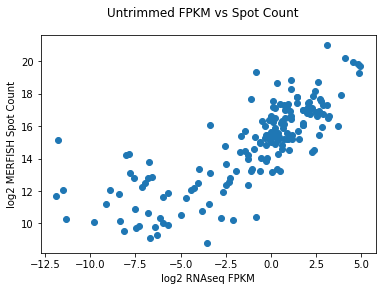

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import os
cstk_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks/'
#spotcalls = pd.read_csv(os.path.join(cstk_path,'spotcalls.csv'))
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spotcalls.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [4]:
import importlib
from collections import defaultdict, Counter
seqfish_config = importlib.import_module('seqfish_config_inflammation')
blank = 0
total = 0
FISH_Spots_Trimmed = Counter(spotcalls.gene)
for gene in FISH_Spots_Trimmed.keys():
    if 'blank' in gene:
        blank = blank + FISH_Spots_Trimmed[gene]
        print(gene,FISH_Spots_Trimmed[gene])
        total = total + FISH_Spots_Trimmed[gene]
    else:
        total = total + FISH_Spots_Trimmed[gene]
print(blank,'false positives')
print(total,'total called')
FPR = (100*blank/total)*(len(seqfish_config.gids)/len(seqfish_config.bids))
print(len(seqfish_config.gids), 'total genes')
print(len(seqfish_config.bids), 'total blanks')
print(FPR,'FPR %')

blank2 1940
blank10 4711
blank4 4944
blank6 5463
blank1 4368
blank9 5447
blank0 2238
blank8 525
blank13 879
blank14 1252
blank3 1738
blank15 420
blank7 479
blank5 558
blank12 1548
blank11 556
37066 false positives
18398775 total called
171 total genes
16 total blanks
2.1530937521655655 FPR %


In [5]:
import importlib
from collections import defaultdict, Counter
seqfish_config = importlib.import_module('seqfish_config_inflammation')
blank = 0
total = 0
for pos in spotcalls.posname.unique():
    print(pos)
    FISH_Spots_Trimmed = Counter(spotcalls[spotcalls.posname==pos].gene)
    for gene in FISH_Spots_Trimmed.keys():
        if 'blank' in gene:
            blank = blank + FISH_Spots_Trimmed[gene]
            #print(gene,FISH_Spots_Trimmed[gene])
            total = total + FISH_Spots_Trimmed[gene]
        else:
            total = total + FISH_Spots_Trimmed[gene]
    print(blank,'false positives')
    print(total,'total called')
    FPR = (100*blank/total)*(len(seqfish_config.gids)/len(seqfish_config.bids))
#     print(len(seqfish_config.gids), 'total genes')
#     print(len(seqfish_config.bids), 'total blanks')
    print(FPR,'FPR %')

3-Pos_002_002
560 false positives
272067 total called
2.199825778209044 FPR %
5-Pos_004_001
835 false positives
324164 total called
2.7529468108735085 FPR %
3-Pos_001_007
1681 false positives
912984 total called
1.9677987237454326 FPR %
4-Pos_001_007
2136 false positives
949620 total called
2.4039615846338536 FPR %
4-Pos_003_006
2734 false positives
1341126 total called
2.1787382393600603 FPR %
3-Pos_004_006
3241 false positives
1580462 total called
2.191649498690889 FPR %
3-Pos_005_004


KeyboardInterrupt: 

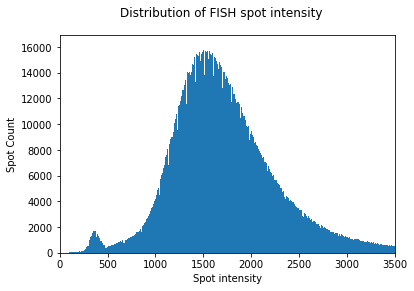

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = spotcalls
plt.hist(temp_df.ave,bins=int(len(temp_df.ave)/1000))
plt.xlim([0,3500])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

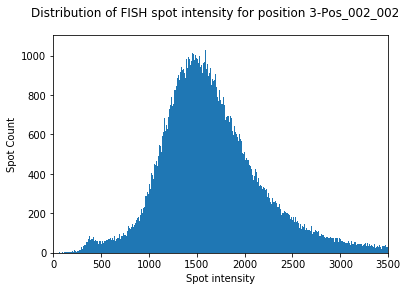

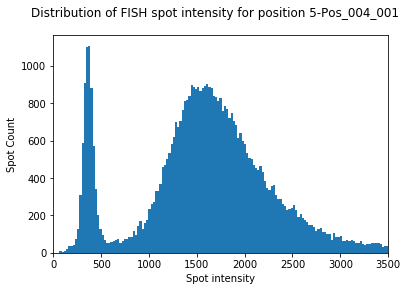

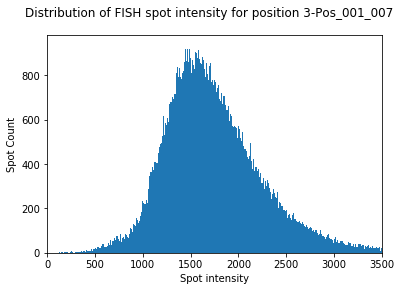

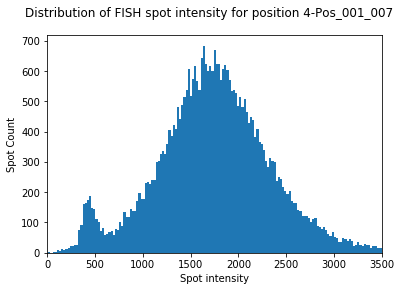

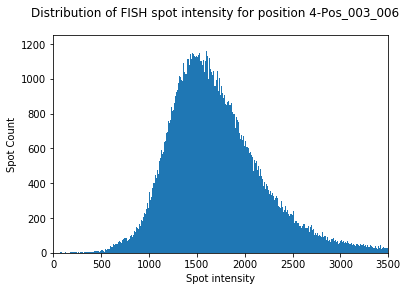

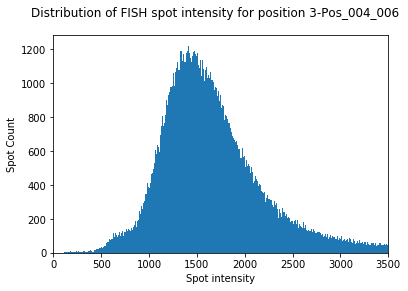

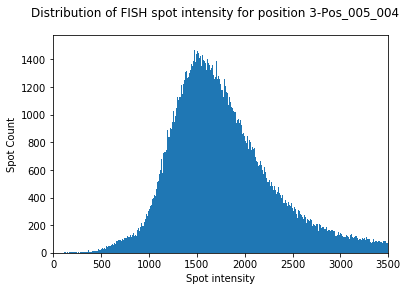

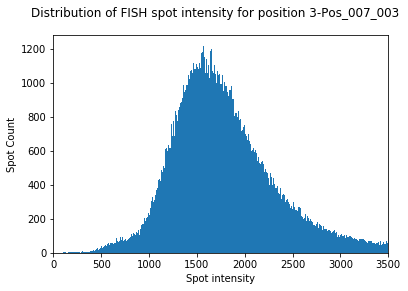

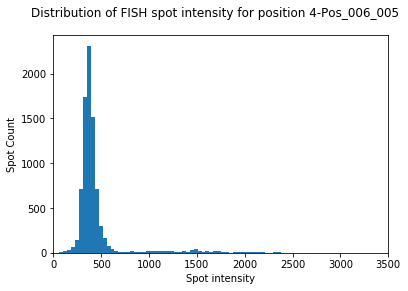

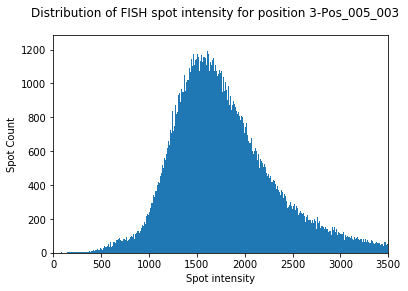

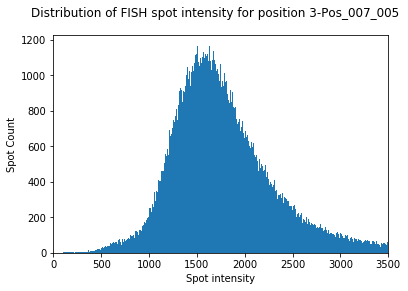

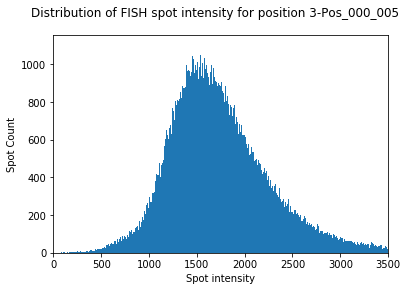

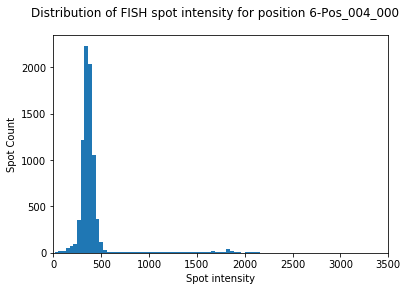

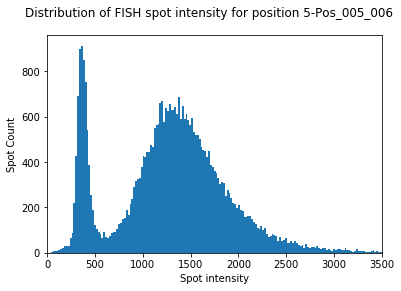

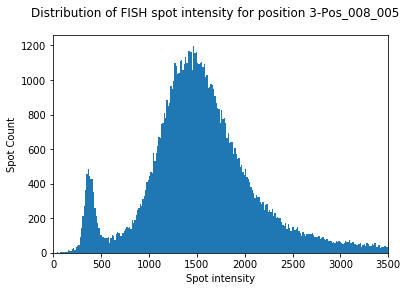

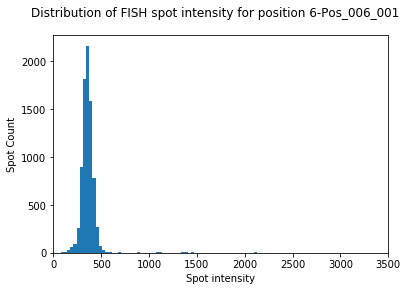

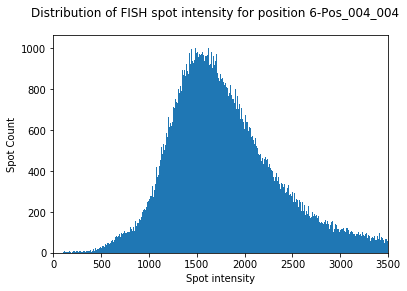

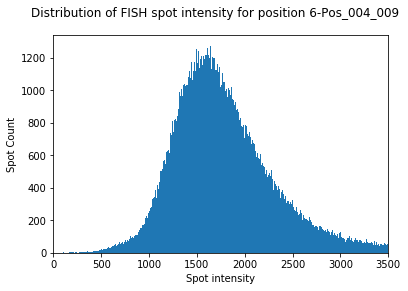

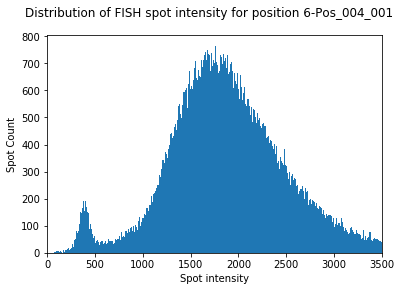

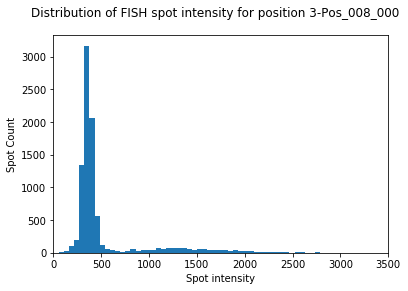

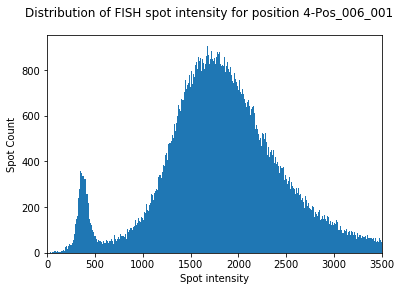

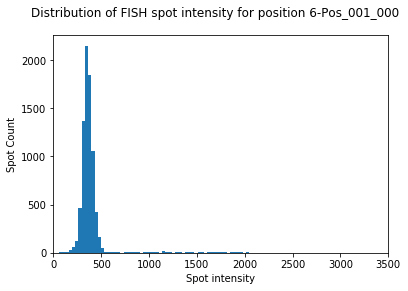

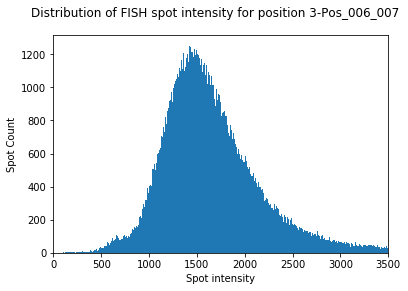

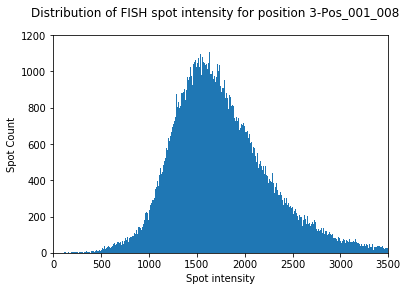

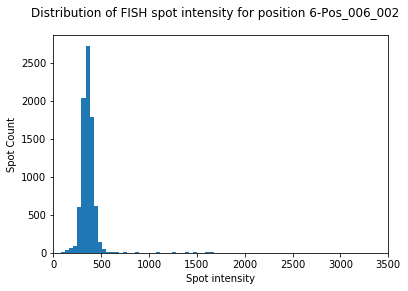

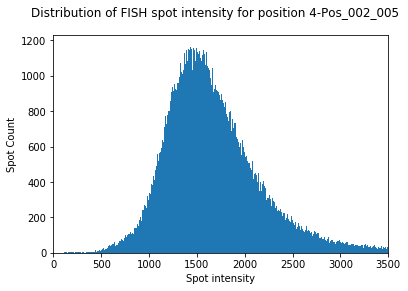

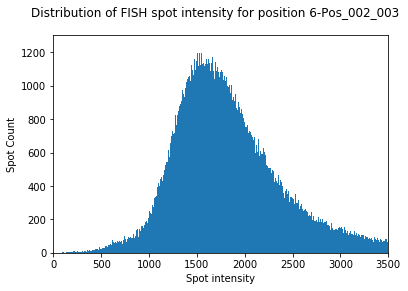

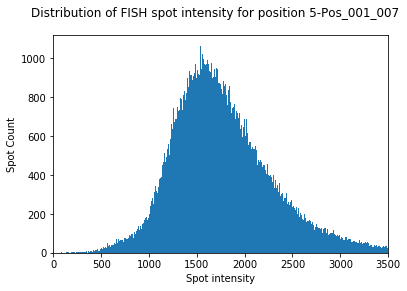

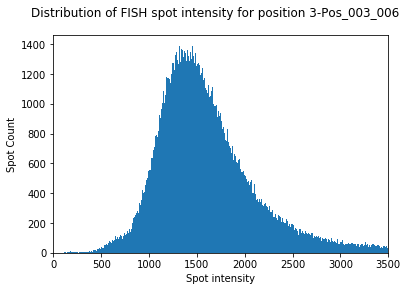

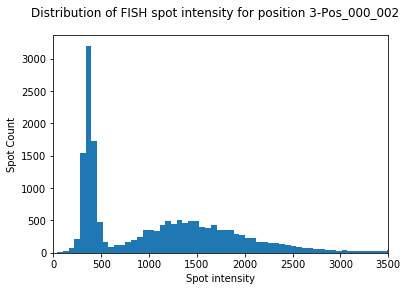

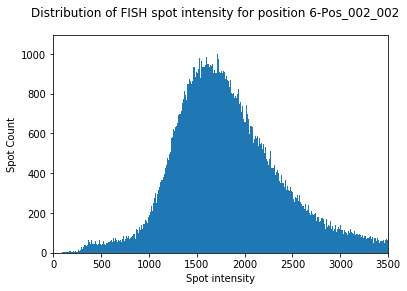

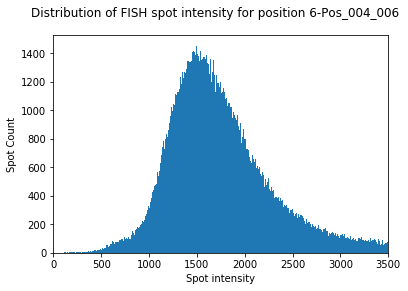

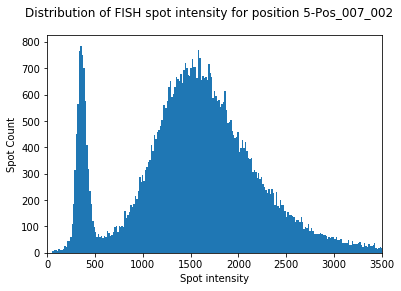

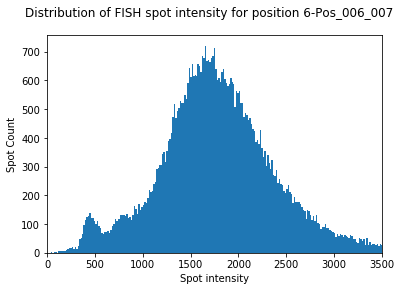

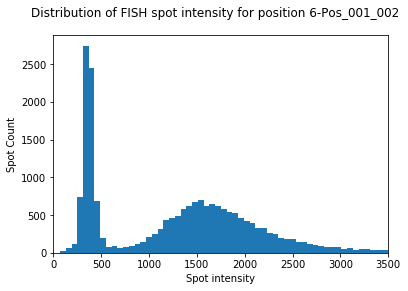

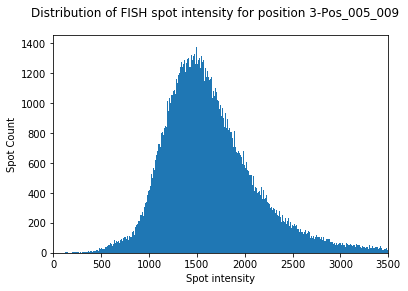

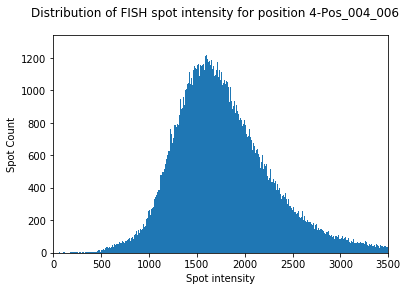

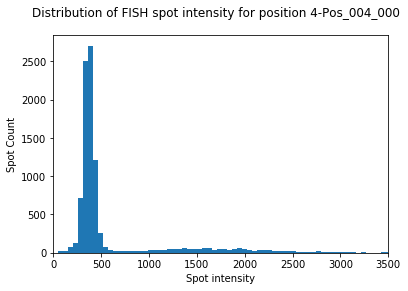

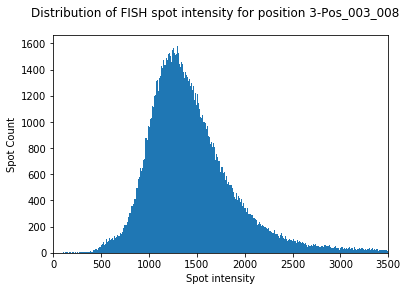

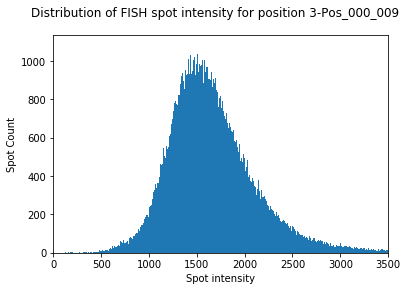

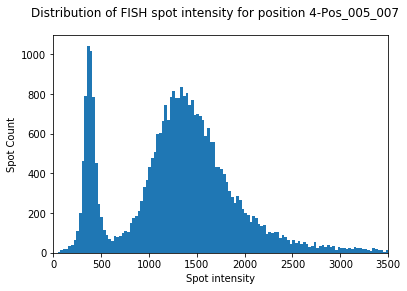

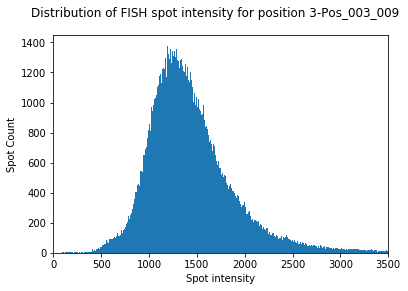

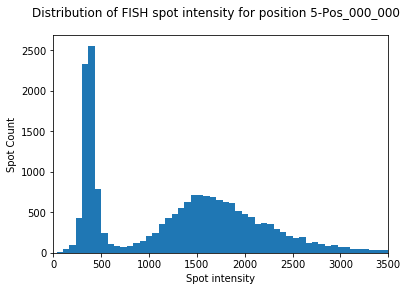

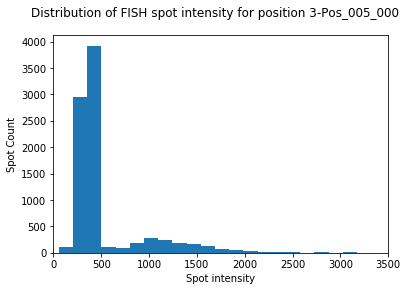

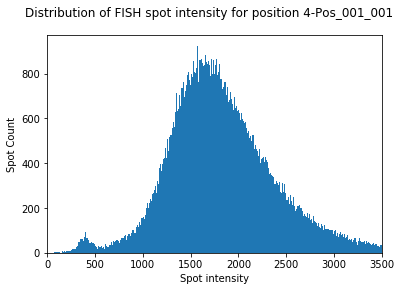

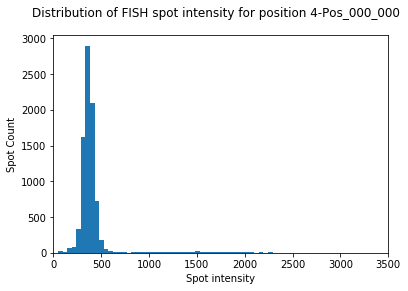

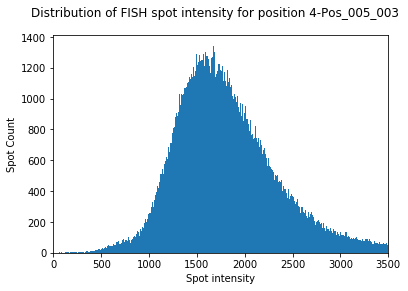

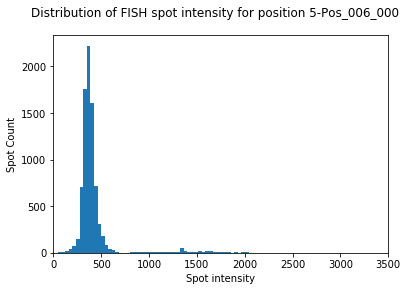

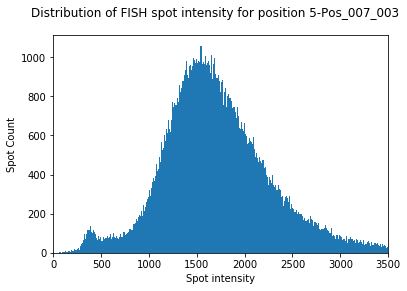

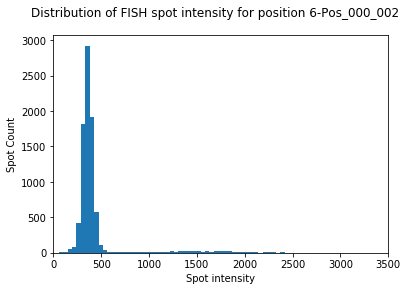

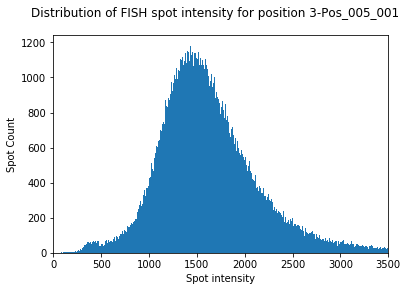

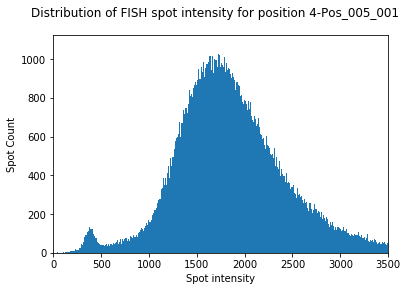

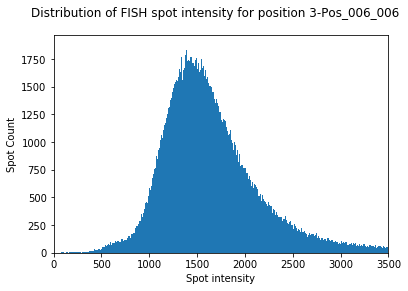

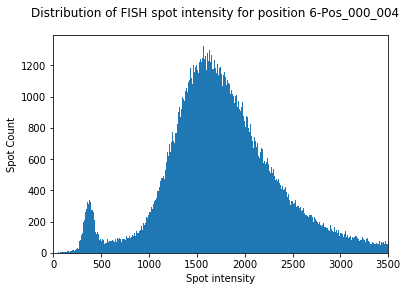

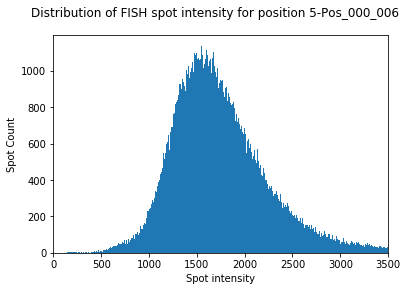

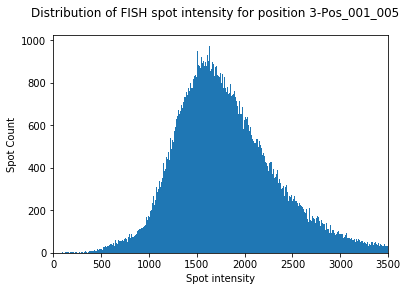

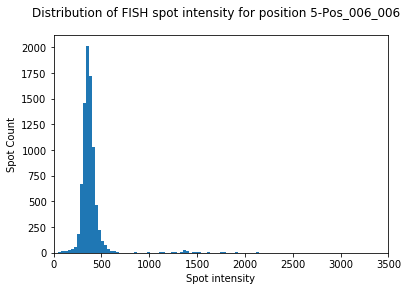

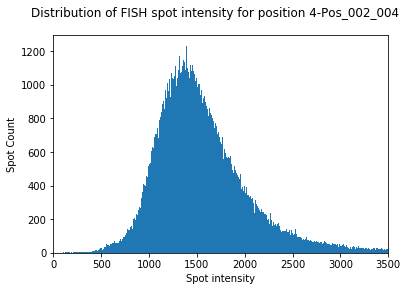

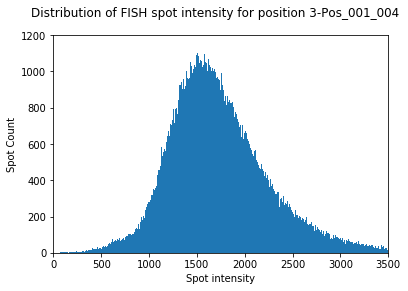

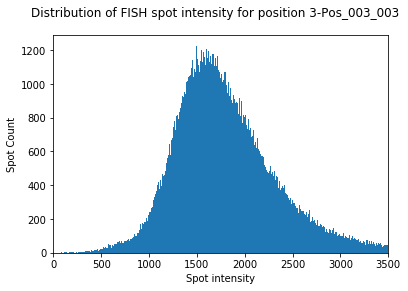

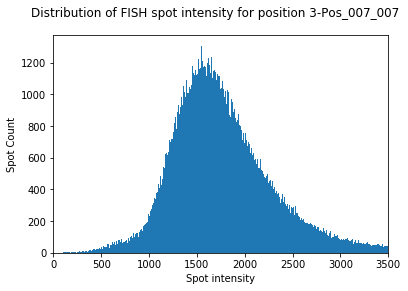

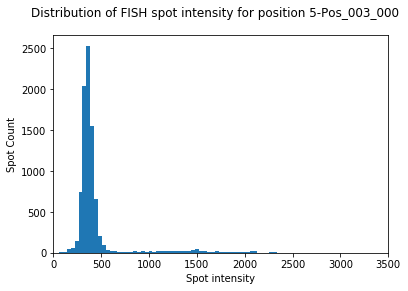

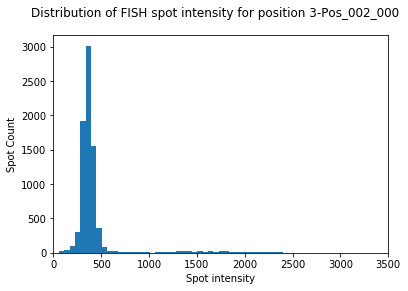

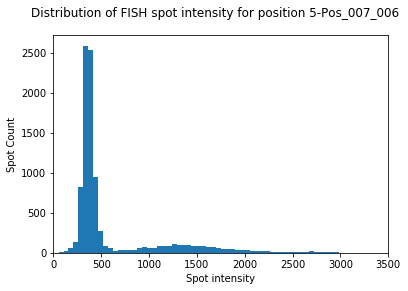

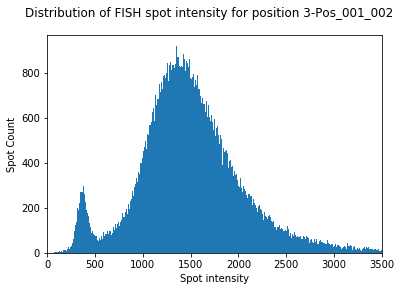

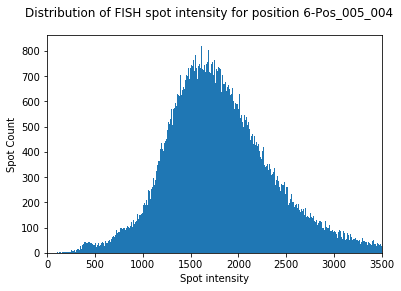

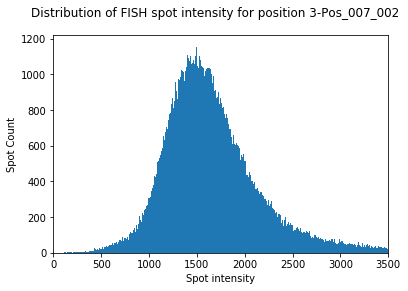

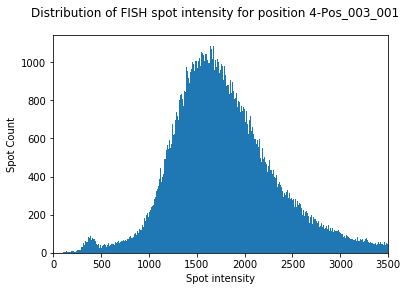

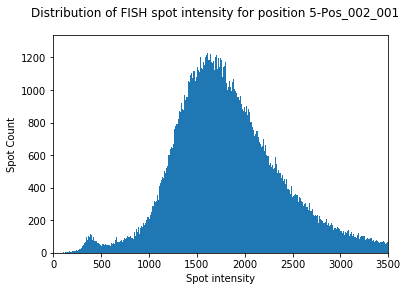

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
for pos in spotcalls.posname.unique():
    temp_df = spotcalls[spotcalls.posname==pos]
    plt.hist(temp_df.ave,bins=int(len(temp_df.ave)/100))
    plt.xlim([0,3500])
    plt.suptitle('Distribution of FISH spot intensity for position '+pos)
    plt.xlabel('Spot intensity')
    plt.ylabel('Spot Count')
    plt.show()

SpearmanrResult(correlation=0.8359109127126984, pvalue=6.820262748385314e-46)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2


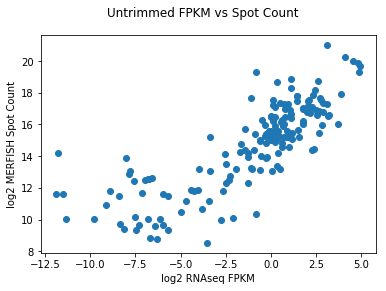

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
thresh = 600 # Set based on histogram if needed
temp = spotcalls[spotcalls.ave>thresh]
FISH_Spots = Counter(temp.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

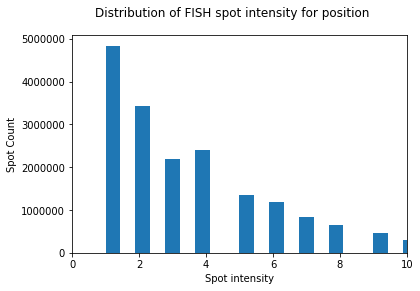

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(spotcalls.npixels,bins=250)
plt.xlim([0,10])
plt.suptitle('Distribution of FISH spot intensity for position ')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

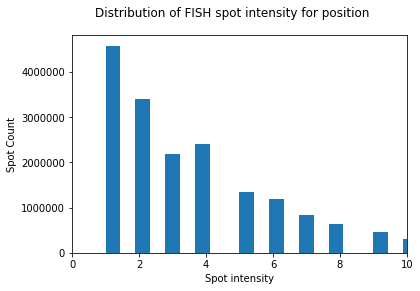

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(spotcalls[spotcalls.ave>600].npixels,bins=250)
plt.xlim([0,10])
plt.suptitle('Distribution of FISH spot intensity for position ')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

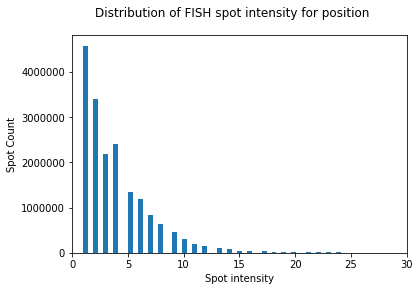

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(spotcalls[spotcalls.ave>600].npixels,bins=250)
plt.xlim([0,30])
plt.suptitle('Distribution of FISH spot intensity for position ')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

SpearmanrResult(correlation=0.838826889384885, pvalue=1.7082197958779767e-46)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2


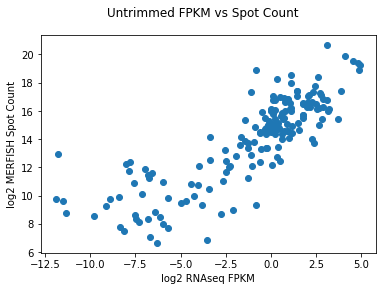

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
temp = spotcalls[spotcalls.npixels>1]
temp = temp[temp.npixels<25]
FISH_Spots = Counter(temp.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [66]:
import importlib
from collections import defaultdict, Counter
seqfish_config = importlib.import_module('seqfish_config_inflammation')
blank = 0
total = 0
FISH_Spots_Trimmed = Counter(spotcalls[(spotcalls.ave>600) & (spotcalls.npixels>1) & (spotcalls.npixels<25)].gene)
for gene in FISH_Spots_Trimmed.keys():
    if 'blank' in gene:
        blank = blank + FISH_Spots_Trimmed[gene]
        print(gene,FISH_Spots_Trimmed[gene])
        total = total + FISH_Spots_Trimmed[gene]
    else:
        total = total + FISH_Spots_Trimmed[gene]
print(blank,'false positives')
print(total,'total called')
FPR = (100*blank/total)*(len(seqfish_config.gids)/len(seqfish_config.bids))
print(len(seqfish_config.gids), 'total genes')
print(len(seqfish_config.bids), 'total blanks')
print(FPR,'FPR %')

blank10 358
blank6 552
blank1 207
blank15 82
blank0 136
blank2 340
blank4 219
blank12 244
blank8 130
blank5 48
blank7 76
blank3 32
blank11 48
blank13 75
blank14 4
blank9 9
2560 false positives
13479105 total called
171 total genes
16 total blanks
0.2029808358937778 FPR %


SpearmanrResult(correlation=0.843108455132359, pvalue=2.1264493703804774e-47)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2


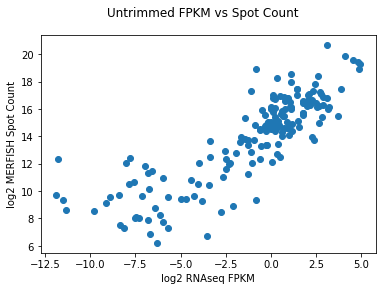

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spotcalls[(spotcalls.ave>600) & (spotcalls.npixels>1) & (spotcalls.npixels<25)].gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [72]:
genes = []
counts = []
for gn,cn in FISH_Spots.items():
    if cn>(len(spotcalls)/1000):
        genes.append(gn)
        counts.append(cn)
print(len(genes),'over 0.1% total abundance')
genes = []
counts = []
for gn,cn in FISH_Spots.items():
    if cn>(len(spotcalls)/100):
        genes.append(gn)
        counts.append(cn)
print(len(genes),'over 1% total abundance')

97 over 0.1% total abundance
12 over 1% total abundance


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2


SpearmanrResult(correlation=0.8186646506827947, pvalue=1.4583880670105108e-42)


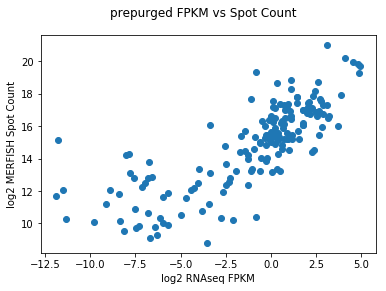

In [2]:
# Re Purged
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spotcalls_prepurge.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('prepurged FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [1]:
# Repurged
import pickle
spotcalls_prepurge = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/spotcalls_reduced_size.pkl','rb'))
spotcalls = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/spotcalls_pos_purged.pkl','rb'))
print(len(spotcalls_prepurge))
print(len(spotcalls))
print(100*(1-len(spotcalls)/len(spotcalls_prepurge)))

18398775
11773410
36.00981587089358


SpearmanrResult(correlation=0.8054023567811458, pvalue=3.1088876230294935e-40)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2


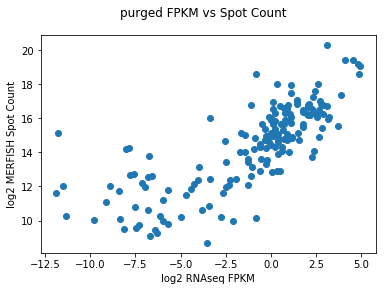

In [3]:
# Re Purged
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spotcalls.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('purged FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

SpearmanrResult(correlation=0.8440036479708162, pvalue=1.3646796165355406e-47)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2


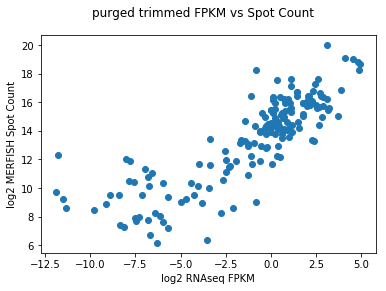

In [13]:
# Re Purged
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spotcalls[(spotcalls.ave>600) & (spotcalls.npixels>1) & (spotcalls.npixels<25)].gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('purged trimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

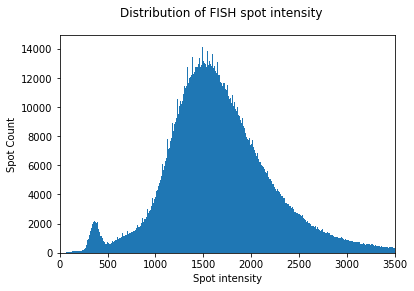

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = spotcalls
plt.hist(temp_df.ave,bins=int(len(temp_df.ave)/1000))
plt.xlim([0,3500])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

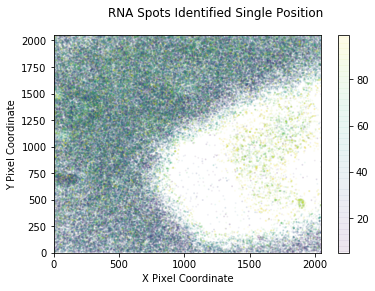

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = filteredspots[filteredspots.posname == filteredspots.posname.unique()[5]]
sc = plt.scatter(temp_df.x,temp_df.y,c=temp_df.z,s=1,alpha=0.05)
plt.colorbar(sc)
plt.suptitle('RNA Spots Identified Single Position')
plt.xlabel('X Pixel Coordinate')
plt.ylabel('Y Pixel Coordinate')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.show()

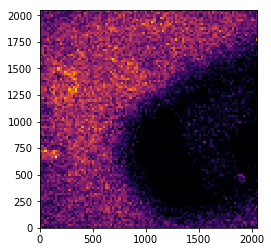

In [9]:
%matplotlib inline
heatmap, xedges, yedges = np.histogram2d(temp_df.x,temp_df.y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='inferno')
plt.show()

Ccnd1


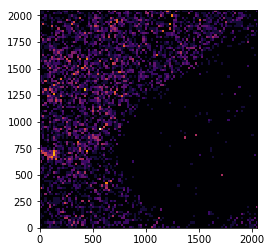

Myh9


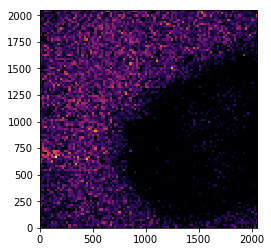

Fem1a


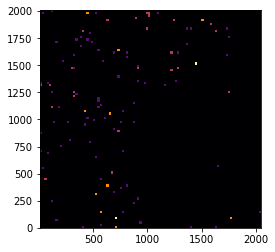

Per1


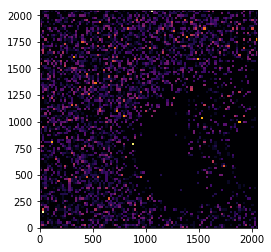

Ldlr


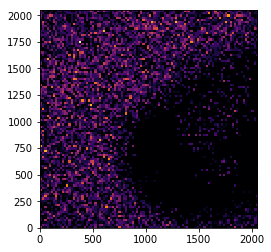

Casp9


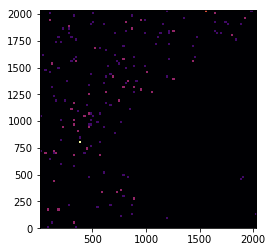

Stat3


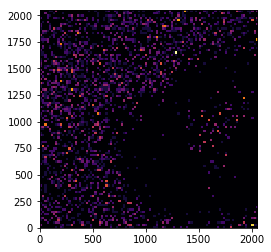

Ikbkb


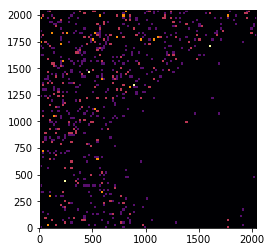

Apc


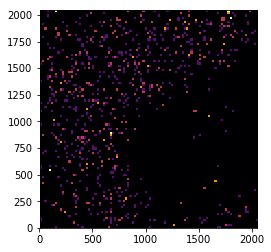

Tgm2


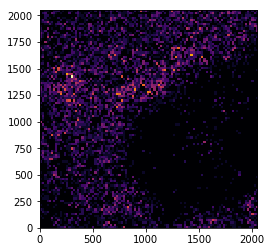

Lamb2


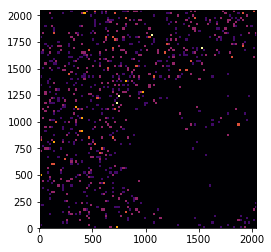

Akt3


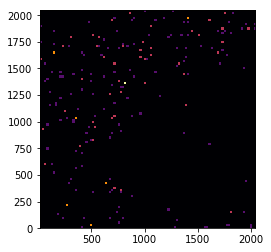

Itga6


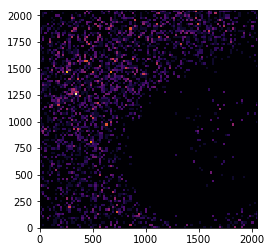

P2ry2


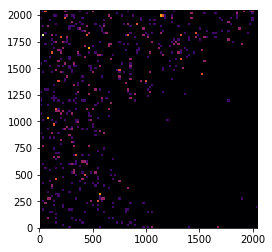

Bap1


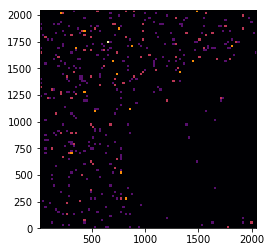

Nlk


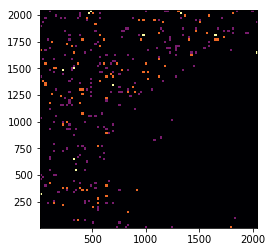

Abr


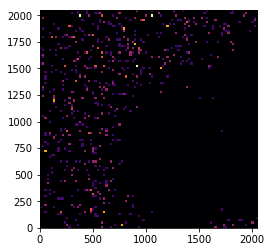

Gja1


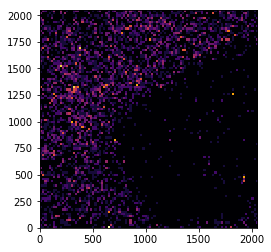

Sbno2


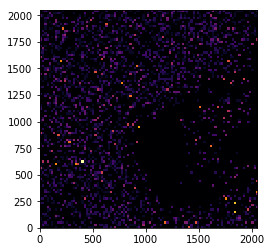

Dvl1


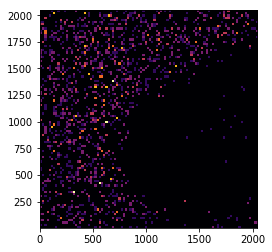

Numb


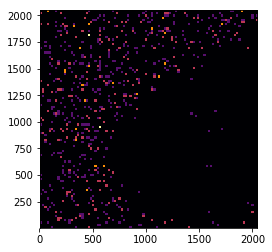

Dtx3l


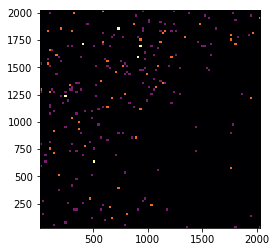

B4galt1


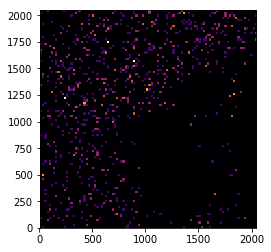

Abhd2


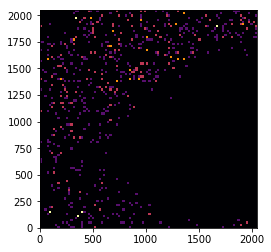

Tgfbr2


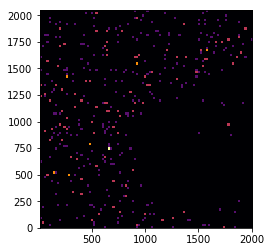

Pak1


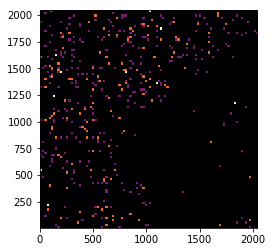

Akt2


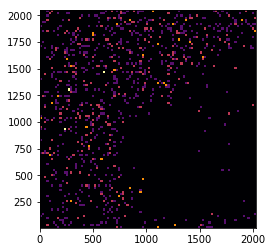

Drosha


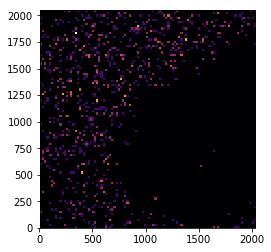

Tnfrsf21


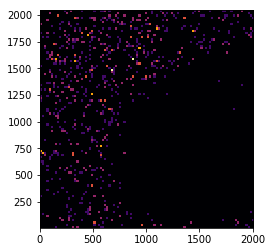

Prkci


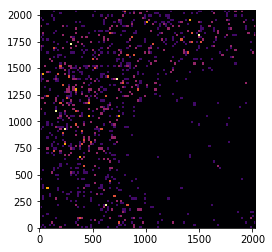

Smad5


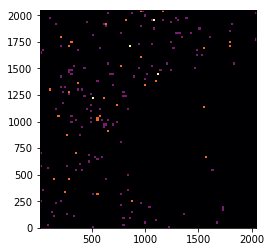

Rela


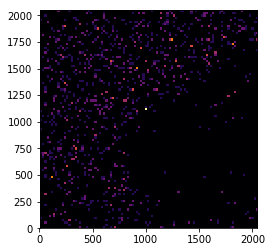

Nfkb1


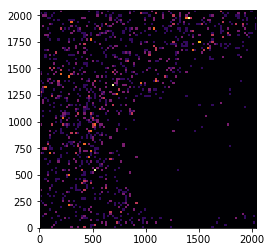

Rora


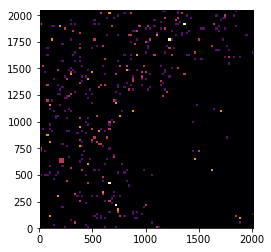

Bcl2l1


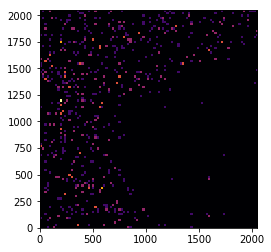

Lrp5


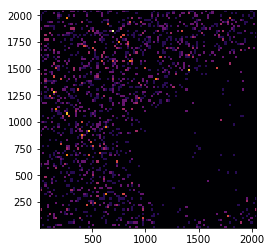

Cab39l


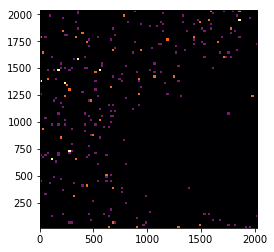

Ahnak2


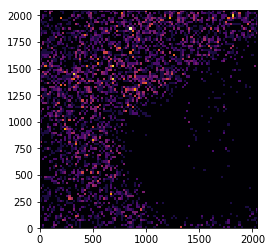

Tnip1


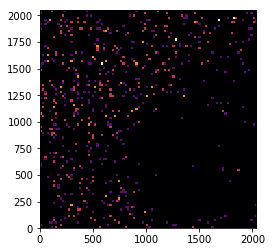

Ikbke


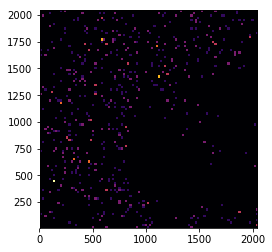

Ash1l


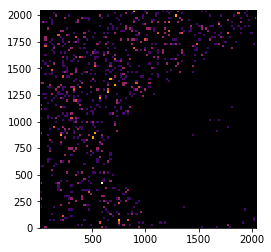

Lamc1


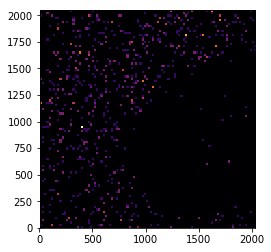

Esr1


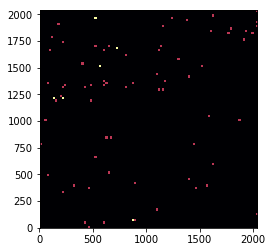

Rps6ka4


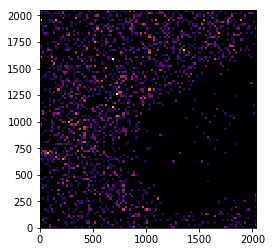

Bcl6


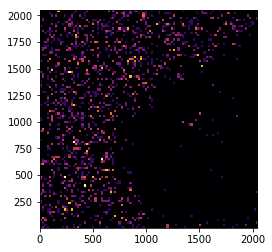

Casp2


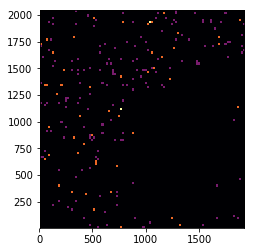

Rabgef1


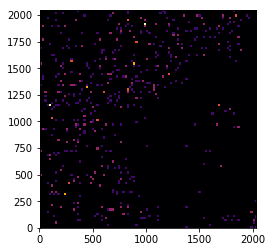

Racgap1


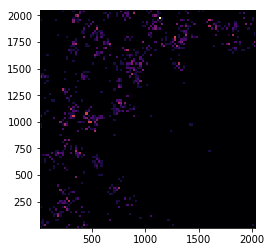

Nfkb2


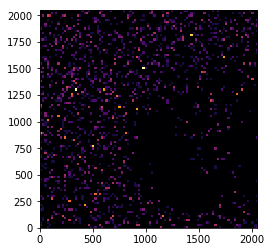

Kdm6b


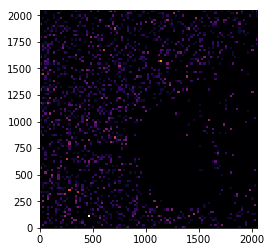

Smad3


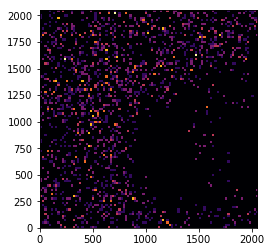

Jak3


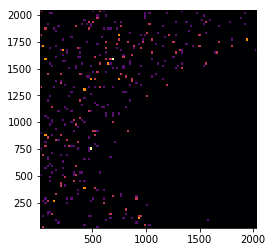

Tgfbr1


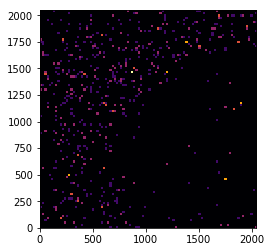

Ifnar1


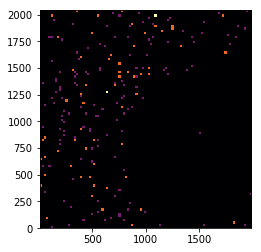

P2ry1


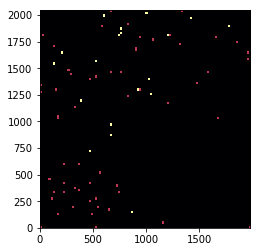

Arfgef1


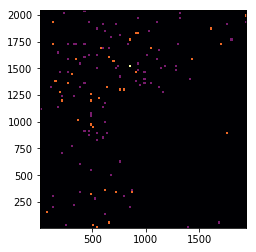

Pak2


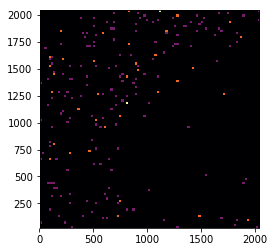

Dhx9


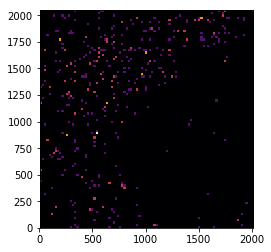

Clasp1


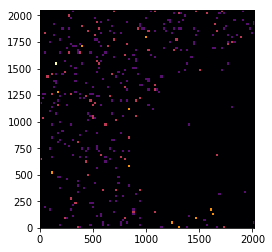

Notch2


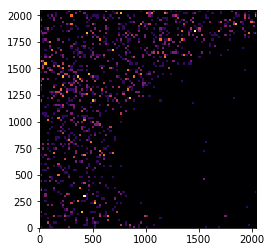

Stat1


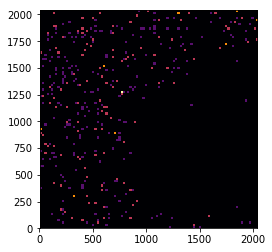

Cdc25b


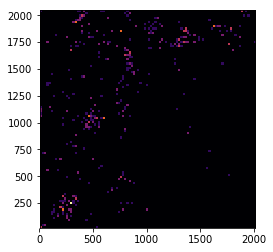

Irak2


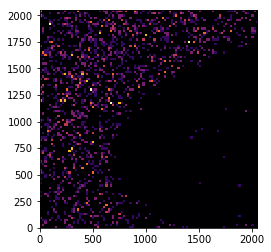

Ppard


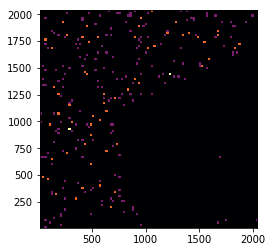

Nlrx1


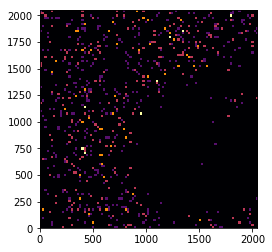

Notch1


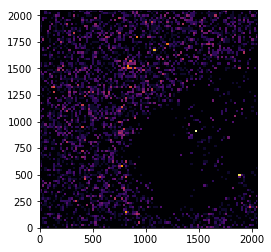

Smad1


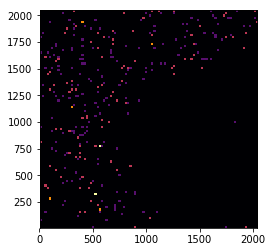

Pla2g4a


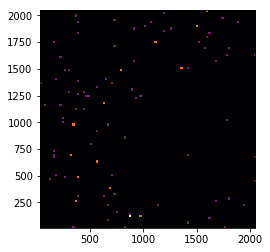

Srf


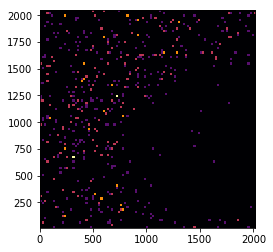

Sufu


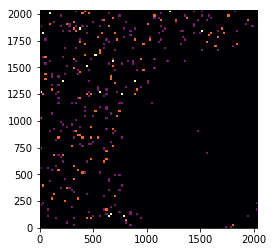

Clock


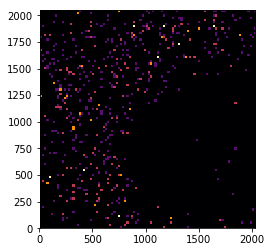

Acvr1b


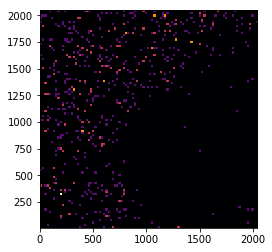

Pcdh7


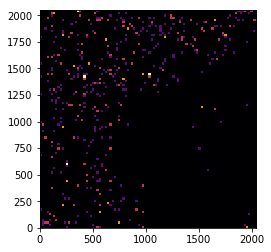

Il1rl2


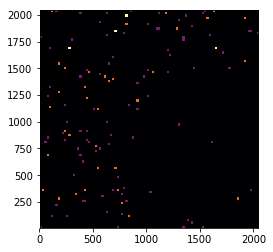

Cdk19


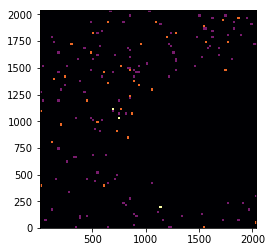

Bcl2


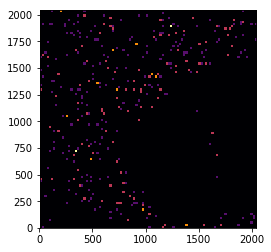

Ndst1


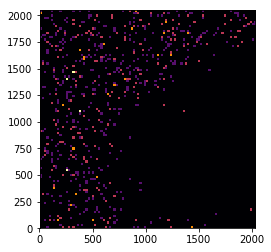

Stat5b


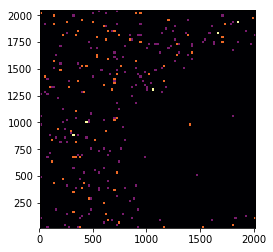

Braf


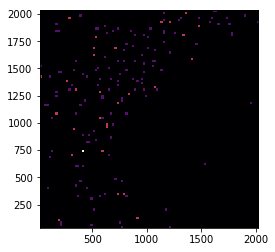

Camk1d


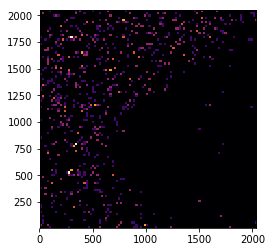

Acaca


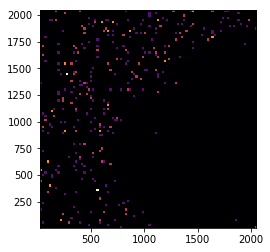

Nr1d2


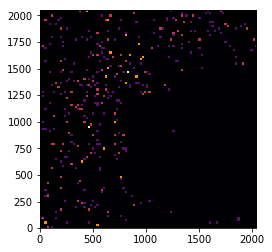

Plau


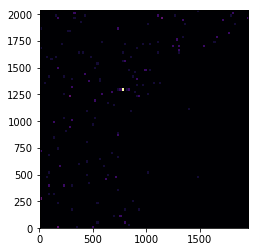

Zfp35


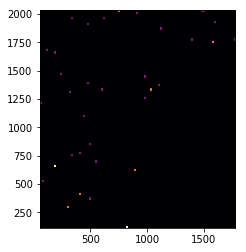

Eif2ak1


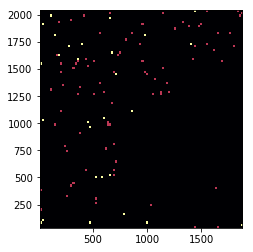

Clasp2


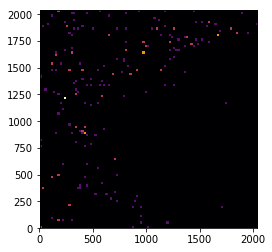

Smad4


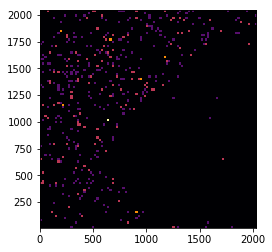

Fmnl2


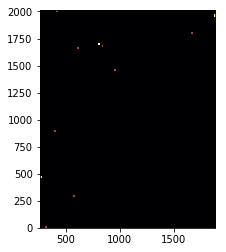

Il7r


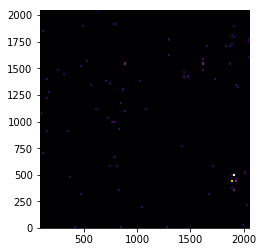

Prkce


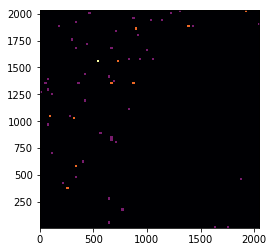

Nav2


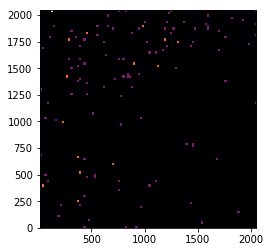

Ptgs1


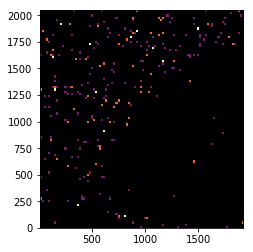

Shpk


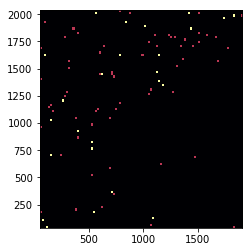

Fzd7


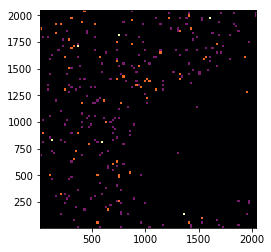

Cask


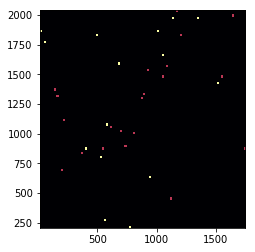

blank15


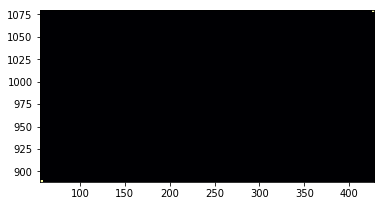

Prkch


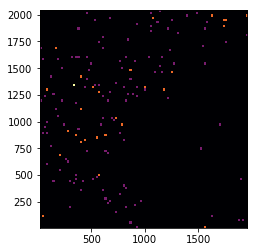

Cxcl9


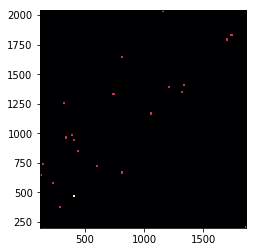

Mcph1


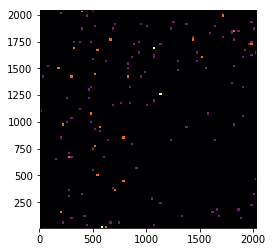

Fadd


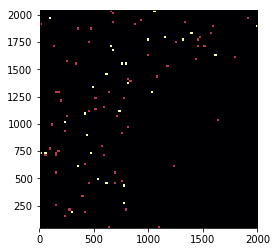

Elk3


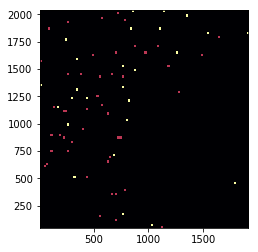

Lrp6


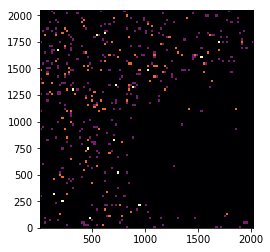

Stat5a


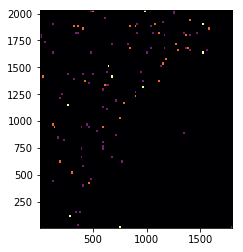

Vps35


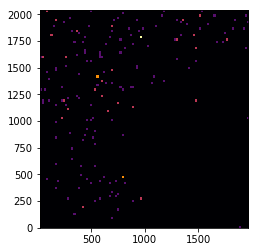

Irak4


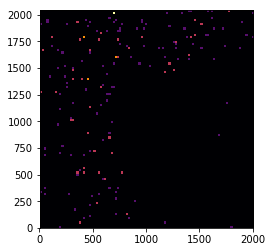

Rb1


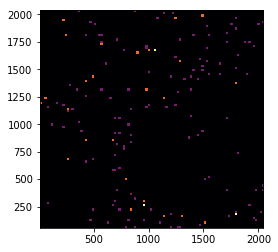

P2rx7


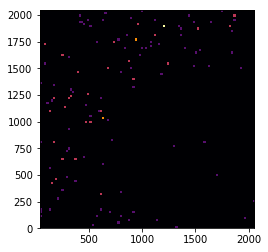

Jak2


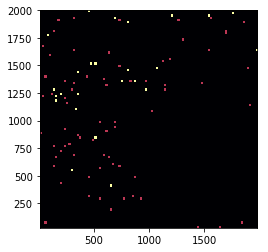

Rel


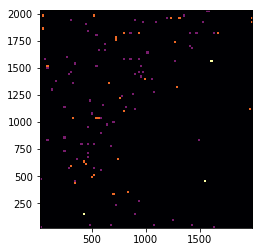

Tbc1d23


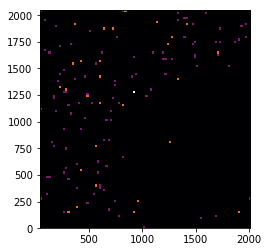

Nlrp3


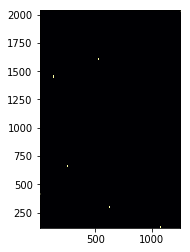

Socs5


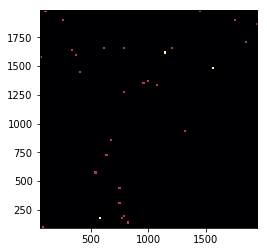

Il6ra


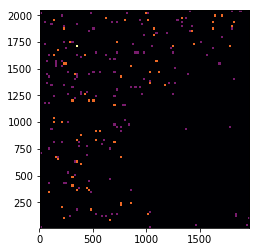

Maml1


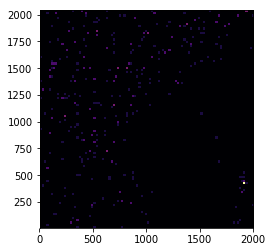

Chuk


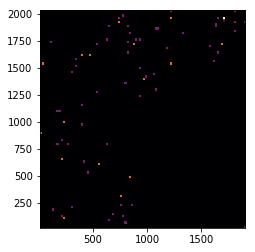

Timp2


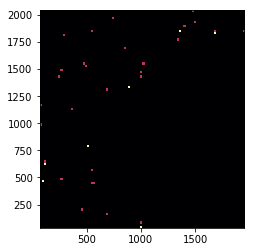

Rbpj


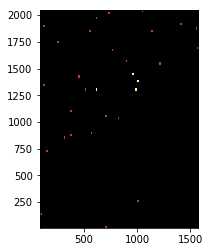

Aoah


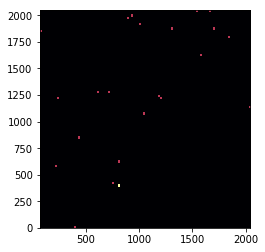

Fzd5


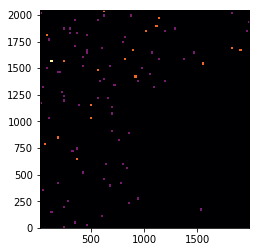

Jaml


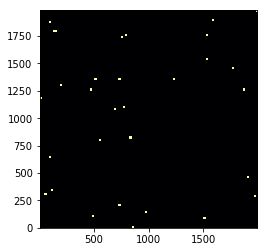

Rictor


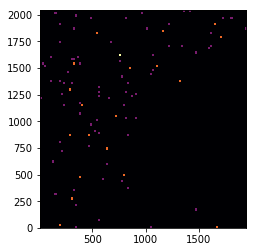

Foxp3


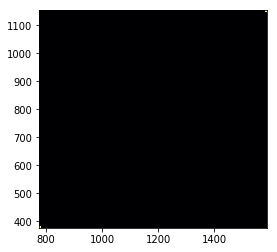

Dtx4


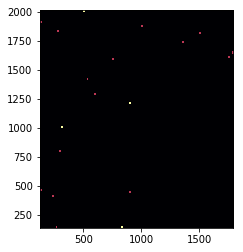

Scarf1


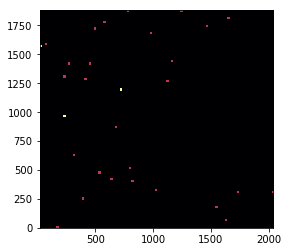

Relt


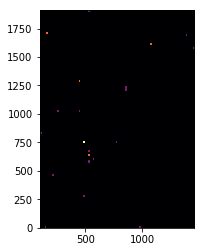

Rab31


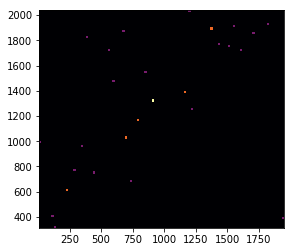

Nlrp1a


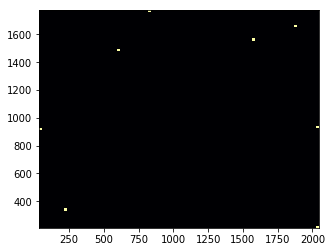

Il1rap


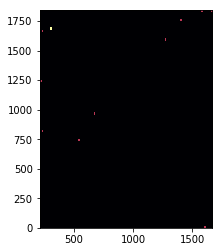

Tnfrsf26


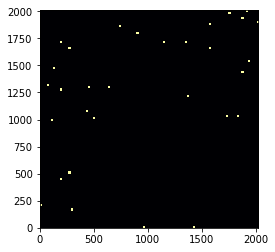

Serpine1


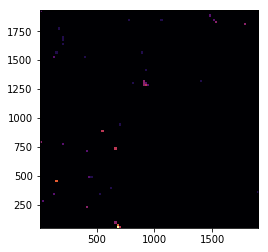

Tlr2


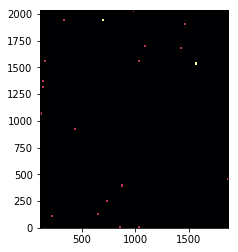

KeyError: 0

In [59]:
%matplotlib inline
for gene in temp_df.gene.unique():
    temp = temp_df[temp_df.gene==gene]
    heatmap, xedges, yedges = np.histogram2d(temp.x,temp.y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    print(gene)
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='inferno')
    plt.show()

opening img_3-Pos_004_006_000000019_000000000_DeepBlue_000_019.tif

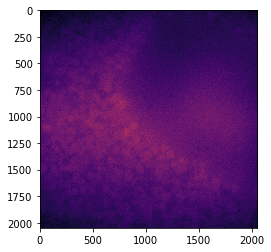

In [10]:
import matplotlib
%matplotlib inline
from metadata import Metadata
import matplotlib.pyplot as plt
pos = spotcalls.posname.unique()[5]
img_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(img_path)
im = md.stkread(Position=pos,Channel='DeepBlue',hybe='hybe1',Zindex=19)
# im = np.flipud(np.rot90(nucstk[:,:,20]))
implot = plt.imshow(im[:,:,0],cmap='inferno')

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


opening img_3-Pos_004_006_000000103_000000000_DeepBlue_000_103.tif

<IPython.core.display.Javascript object>


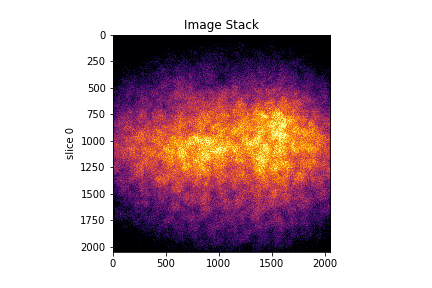

<IPython.core.display.Javascript object>


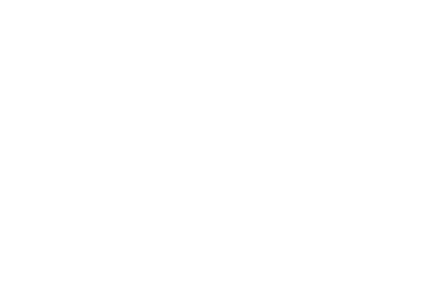

In [135]:
from pyvis import stkshow
%matplotlib notebook
from metadata import Metadata
import matplotlib.pyplot as plt
pos = spotcalls.posname.unique()[5]
img_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(img_path)
stk = md.stkread(Position=pos,Channel='DeepBlue',hybe='hybe1')
stkshow(stk)

In [11]:
genes_per_pos = []
for pos in spotcalls.posname.unique():
    genes_per_pos.append(len(spotcalls[spotcalls.posname==pos]))
    #print(pos,len(spotcalls[spotcalls.posname==pos]))
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(genes_per_pos,bins=int(len(genes_per_pos)/3))
#plt.xlim([0,2000])
plt.suptitle('Distribution of called genes per position')
plt.xlabel('Gene count')
plt.ylabel('Position Count')
plt.show()

3-Pos_002_002 272067
5-Pos_004_001 52097
5-Pos_003_007 33040
3-Pos_001_007 588820
4-Pos_001_007 36636
4-Pos_003_006 391506
3-Pos_004_006 239336
3-Pos_005_004 429741
6-Pos_005_005 111027
3-Pos_007_003 554659
3-Pos_004_001 114810
4-Pos_006_005 8378
3-Pos_005_003 591315
3-Pos_007_005 522443
3-Pos_000_005 428698
6-Pos_004_000 8045
3-Pos_008_009 7116
5-Pos_005_006 38904
3-Pos_008_005 90440
6-Pos_006_001 8183
6-Pos_004_004 311356
6-Pos_004_009 581331
6-Pos_004_001 140479
3-Pos_008_000 9083
4-Pos_006_001 133849
6-Pos_001_000 8054
3-Pos_006_007 356735
3-Pos_001_008 647077
4-Pos_002_005 326847
6-Pos_002_003 495125
5-Pos_001_007 428097
6-Pos_002_002 296492
3-Pos_005_009 505796
4-Pos_004_000 9313
3-Pos_003_008 311872
4-Pos_005_007 32347
3-Pos_003_009 311889


opening img_4-Pos_002_005_000000103_000000000_DeepBlue_000_103.tif

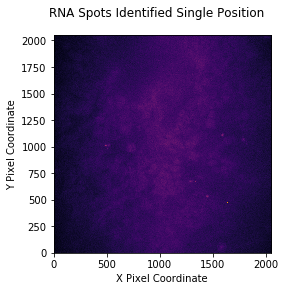

In [118]:
import matplotlib
%matplotlib inline
from metadata import Metadata
import matplotlib.pyplot as plt
img_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(img_path)
pos = md.posnames[20]
nucstk = md.stkread(Position=pos,Channel='DeepBlue',acq='hybe1_5')
z =19
im = np.flipud(np.rot90(nucstk[:,:,z]))
implot = plt.imshow(im,cmap='inferno')
temp_df = spotcalls[spotcalls.posname==pos]
X = []
Y = []
Z = []
for i in range(len(temp_df.centroid)):
    if temp.z.iloc[i]==z:
        Y.append(float(temp_df.centroid.iloc[i].split('(')[1].split(',')[0]))
        X.append(float(temp_df.centroid.iloc[i].split(',')[1].split(')')[0]))
        Z.append(temp_df.z.iloc[i])
sc = plt.scatter(X,Y,c='w', s=2)
#plt.colorbar(sc)
plt.suptitle('RNA Spots Identified Single Position')
plt.xlabel('X Pixel Coordinate')
plt.ylabel('Y Pixel Coordinate')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.show()

In [1]:
import pickle
spots = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/filteredspots.pkl','rb'))
from collections import Counter
Counter(spots.posname)

Counter({'3-Pos_002_002': 119527,
         '5-Pos_004_001': 21501,
         '3-Pos_001_007': 277350,
         '4-Pos_001_007': 14657,
         '4-Pos_003_006': 180957,
         '3-Pos_004_006': 105744,
         '3-Pos_005_004': 195092,
         '3-Pos_007_003': 252120,
         '4-Pos_006_005': 329,
         '3-Pos_005_003': 271650,
         '3-Pos_007_005': 241606,
         '3-Pos_000_005': 192897,
         '6-Pos_004_000': 160,
         '5-Pos_005_006': 14695,
         '3-Pos_008_005': 37580,
         '6-Pos_006_001': 59,
         '6-Pos_004_004': 140013,
         '6-Pos_004_009': 272040,
         '6-Pos_004_001': 62281,
         '3-Pos_008_000': 676,
         '4-Pos_006_001': 59421,
         '6-Pos_001_000': 136,
         '3-Pos_006_007': 164978,
         '3-Pos_001_008': 304478,
         '6-Pos_006_002': 78,
         '4-Pos_002_005': 149236,
         '6-Pos_002_003': 228730,
         '5-Pos_001_007': 232201,
         '3-Pos_003_006': 164205,
         '3-Pos_000_002': 4859,
        

# Segmentation

In [3]:
from metadata import Metadata
import matplotlib.pyplot as plt
import pickle
spots = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/filteredspots.pkl','rb'))
img_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(img_path)
pos = spots.posname.unique()[5]
nucstk = md.stkread(Position=pos,Channel='DeepBlue',acq='hybe1_5')

opening img_3-Pos_004_006_000000103_000000000_DeepBlue_000_103.tif3-Pos_004_006


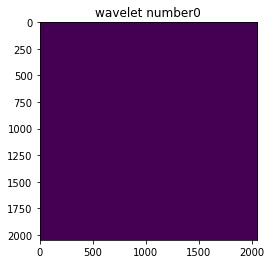

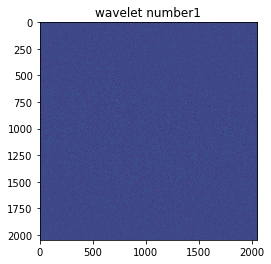

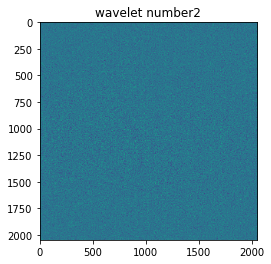

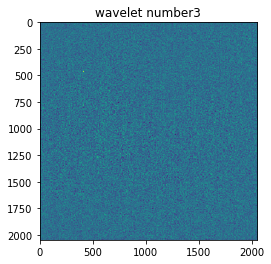

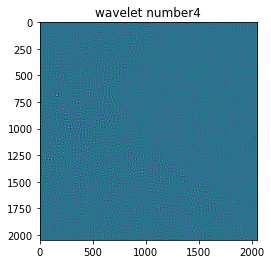

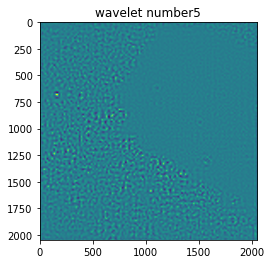

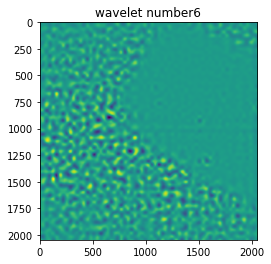

In [21]:
%matplotlib inline
import pywt
import numpy as np
import datetime
wavelet = 'db9'
# start = datetime.datetime.now()
z = 19
img = nucstk[:,:,z]
for n in range(len(coeffs)):
    coeffs = pywt.wavedec2(img,wavelet)
    for i in range(1,len(coeffs)+1):
        if i == n:
            continue
        coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
    Result = pywt.waverec2(coeffs,wavelet)
    plt.title('wavelet number'+str(n))
    plt.imshow(Result)
    plt.show()
# end = datetime.datetime.now()
# print('\n',hybe)
# print('started at',start)
# print('ended at',end)

started at 2018-12-19 12:36:59.838094
ended at 2018-12-19 12:37:00.934052


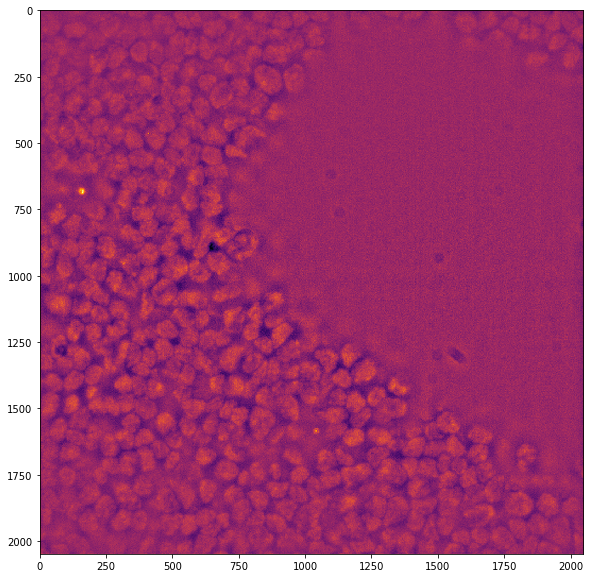

In [27]:
import pywt
import numpy as np
import datetime
start = datetime.datetime.now()
wavelet = 'db9'
z =19
img = nucstk[:,:,z]
coeffs = pywt.wavedec2(img,wavelet)
keep_list = [3,4,5,6]
for i in range(1,len(coeffs)+1):
    if i in keep_list:
        continue
    coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
Result = pywt.waverec2(coeffs,wavelet)
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(Result,cmap='inferno',interpolation='none')
end = datetime.datetime.now()
print('started at',start)
print('ended at',end)

<IPython.core.display.Javascript object>


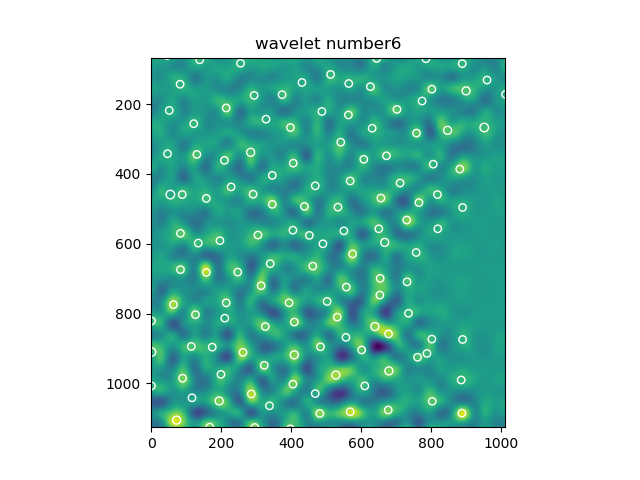

started at 2018-12-19 10:11:41.925276
ended at 2018-12-19 10:12:24.519083


In [13]:
import pywt
from math import sqrt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
start = datetime.datetime.now()
wavelet = 'db9'
z = 19
img = nucstk[:,:,z]
coeffs = pywt.wavedec2(img,wavelet)
keep_list = [4,5,6]
for i in range(1,len(coeffs)+1):
    if i in keep_list:
        continue
    coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
Result = pywt.waverec2(coeffs,wavelet)
ref = Result.astype('float64')
ref_mmin = ref-np.percentile(ref.ravel(),1)
ref = (ref_mmin)/(np.percentile(ref_mmin.ravel(),99))
image_gray = rgb2gray(ref)
blobs_log = blob_log(image_gray, max_sigma=50,min_sigma=20, threshold=.1)
blobs_log[:,2] = blobs_log[:,2] * sqrt(2)

%matplotlib notebook
plt.imshow(Result,cmap='inferno',interpolation='none')
plt.scatter(blobs_log[:,1],blobs_log[:,0],blobs_log[:,2],facecolors='none', edgecolors='w')
plt.show()

# fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
# ax3 = fig2.add_subplot(111)
# ax3.imshow(Result,cmap='inferno',interpolation='none')
# c = plt.Circle((blobs_log[:,1],blobs_log[:,0]),blobs_log[:,2],fill=False)
# ax3.add_patch(c)
end = datetime.datetime.now()
print('started at',start)
print('ended at',end)

In [14]:
import pywt
from math import sqrt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
start = datetime.datetime.now()
wavelet = 'db9'
Result = nucstk.copy()
blobs={}
for z in range(nucstk.shape[2]):
    if z % 10:
        print(z)
    img = nucstk[:,:,z]
    coeffs = pywt.wavedec2(img,wavelet)
    keep_list = [4,5,6]
    for i in range(1,len(coeffs)+1):
        if i in keep_list:
            continue
        coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
    Result[:,:,z] = pywt.waverec2(coeffs,wavelet)
    ref = Result.astype('float64')
    ref_mmin = ref-np.percentile(ref.ravel(),1)
    ref = (ref_mmin)/(np.percentile(ref_mmin.ravel(),99))
    image_gray = rgb2gray(ref)
    blobs_log = blob_log(image_gray, max_sigma=50,min_sigma=20, threshold=.1)
    blobs_log[:,2] = blobs_log[:,2] * sqrt(2)
    blobs[z] = blobs_log
end = datetime.datetime.now()
print('started at',start)
print('ended at',end)

started at 2018-12-19 10:15:14.541845
ended at 2018-12-19 11:59:25.058159


In [17]:
from skimage.external import tifffile
fname = '/home/zach/Desktop/db9_Pos14.tiff'
data = Result
data = data.astype('uint16')
tifffile.imsave(fname, np.swapaxes(np.swapaxes(data,0,2),1,2), metadata={'axes': 'ZYX'})

In [19]:
from pyvis import *
stkshowgui(Result)

In [11]:
sqrt(2)

1.4142135623730951

In [13]:
blobs_log

array([[2047.        , 1941.        ,   42.42640687],
       [2047.        , 1547.        ,   42.42640687],
       [2047.        , 1454.        ,   42.42640687],
       [2047.        , 1167.        ,   42.42640687],
       [2047.        , 1044.        ,   42.42640687],
       [2047.        ,  607.        ,   42.42640687],
       [2047.        ,  528.        ,   42.42640687],
       [2047.        ,  400.        ,   42.42640687],
       [2047.        ,  279.        ,   42.42640687],
       [2047.        ,   71.        ,   42.42640687],
       [2002.        , 1372.        ,   42.42640687],
       [1994.        , 1325.        ,   42.42640687],
       [1992.        , 2047.        ,   42.42640687],
       [1945.        , 1041.        ,   42.42640687],
       [1940.        ,  549.        ,   42.42640687],
       [1939.        , 1512.        ,   42.42640687],
       [1939.        , 1249.        ,   42.42640687],
       [1939.        ,  195.        ,   42.42640687],
       [1933.        , 1172.

<IPython.core.display.Javascript object>


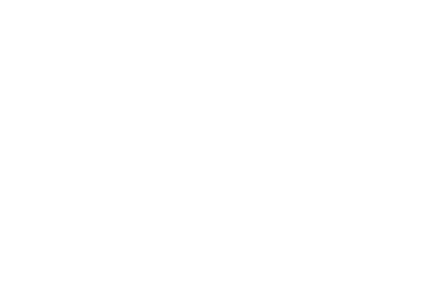

<IPython.core.display.Javascript object>


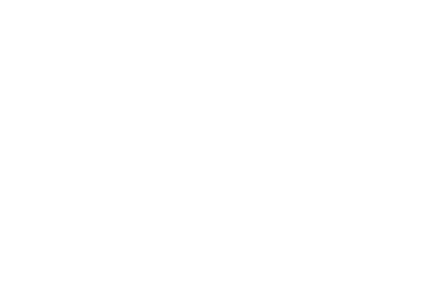

In [20]:
%matplotlib notebook
plt.imshow(Result,cmap='inferno',interpolation='none')
plt.scatter(blobs_log[:,1],blobs_log[:,0],blobs_log[:,2])
plt.show()

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/skimage/filters/thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


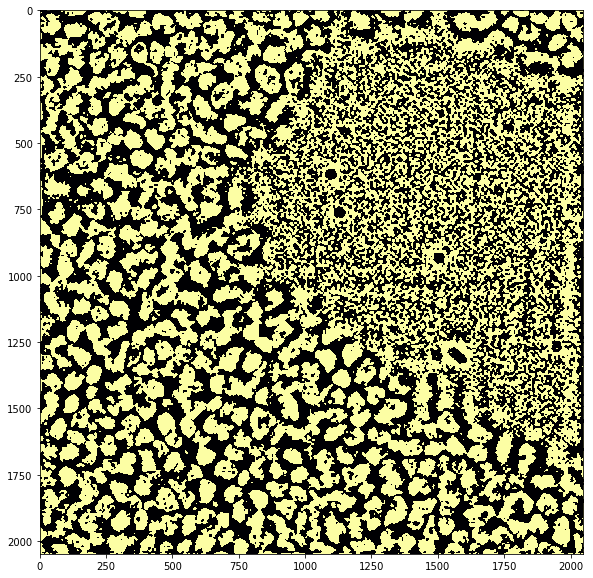

In [53]:
from skimage.filters import threshold_otsu, threshold_adaptive
binary_adaptive = threshold_adaptive(Result, 151, offset=10)
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(binary_adaptive,cmap='inferno',interpolation='none')

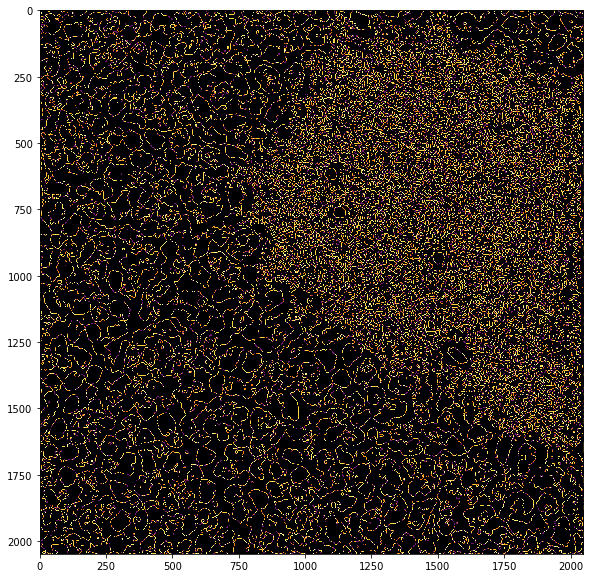

In [54]:
from skimage.filters import sobel
sobel = sobel(binary_adaptive)
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(sobel,cmap='inferno',interpolation='none')

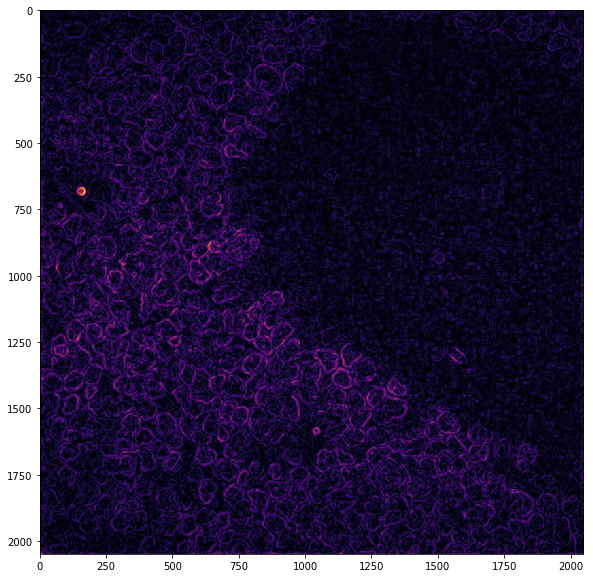

In [56]:
from skimage.filters import sobel
sobel = sobel(Result)
fig2 = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(sobel,cmap='inferno',interpolation='none')

In [ ]:
pickle.dump(spotcalls,open(os.path.join(cstk_path,'spotcalls.pkl'),'wb'))

In [118]:
#filteredspots = spotcalls[(spotcalls.ave>600) & (spotcalls.npixels>1) & (spotcalls.npixels<25)]
pickle.dump(filteredspots,open(os.path.join(cstk_path,'minimalspotcalls.pkl'),'wb'))
filteredspots.to_csv(os.path.join(cstk_path,'minimalspotcalls.csv'))

In [98]:
from fish_results import HybeData
import os
cstk_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks/'
poses = [i for i in os.listdir(cstk_path) if os.path.isdir(os.path.join(cstk_path, i))]
hybedatas = [HybeData(os.path.join(cstk_path, i)) for i in poses]
for hdata in hybedatas:
    base_path = hdata.base_path
    hdata_csv = hdata.metadata
    for f in hdata_csv.filename:
        if 'spotcalls' in f:
            if 'csv' in f:
                hdata_csv = hdata_csv[hdata_csv.filename != f]
                print(f)
    for i in hdata_csv.columns:
            if 'Unnamed' in i:
                hdata_csv = hdata_csv.drop(columns=i)
    hdata_csv.to_csv(os.path.join(base_path, 'hybedata.csv'))

spotcalls_3-Pos_002_002_z_5.csv
spotcalls_3-Pos_002_002_z_7.csv
spotcalls_3-Pos_002_002_z_9.csv
spotcalls_3-Pos_002_002_z_11.csv
spotcalls_3-Pos_002_002_z_5.csv
spotcalls_3-Pos_002_002_z_7.csv
spotcalls_3-Pos_002_002_z_9.csv
spotcalls_3-Pos_002_002_z_11.csv
spotcalls_3-Pos_002_002_z_13.csv
spotcalls_3-Pos_002_002_z_15.csv
spotcalls_3-Pos_002_002_z_17.csv
spotcalls_3-Pos_002_002_z_19.csv
spotcalls_3-Pos_002_002_z_21.csv
spotcalls_3-Pos_002_002_z_23.csv
spotcalls_3-Pos_002_002_z_25.csv
spotcalls_3-Pos_002_002_z_27.csv
spotcalls_3-Pos_002_002_z_29.csv
spotcalls_3-Pos_002_002_z_31.csv
spotcalls_3-Pos_002_002_z_33.csv
spotcalls_3-Pos_002_002_z_35.csv
spotcalls_3-Pos_002_002_z_37.csv
spotcalls_3-Pos_002_002_z_39.csv
spotcalls_3-Pos_002_002_z_41.csv
spotcalls_3-Pos_002_002_z_43.csv
spotcalls_3-Pos_002_002_z_45.csv
spotcalls_3-Pos_002_002_z_47.csv
spotcalls_3-Pos_002_002_z_49.csv
spotcalls_3-Pos_002_002_z_51.csv
spotcalls_3-Pos_002_002_z_53.csv
spotcalls_3-Pos_002_002_z_55.csv
spotcalls_3-Pos_

spotcalls_3-Pos_002_002_z_21.csv
spotcalls_3-Pos_002_002_z_23.csv
spotcalls_3-Pos_002_002_z_25.csv
spotcalls_3-Pos_002_002_z_27.csv
spotcalls_3-Pos_002_002_z_29.csv
spotcalls_3-Pos_002_002_z_31.csv
spotcalls_3-Pos_002_002_z_33.csv
spotcalls_3-Pos_002_002_z_35.csv
spotcalls_3-Pos_002_002_z_37.csv
spotcalls_3-Pos_002_002_z_39.csv
spotcalls_3-Pos_002_002_z_41.csv
spotcalls_3-Pos_002_002_z_43.csv
spotcalls_3-Pos_002_002_z_45.csv
spotcalls_3-Pos_002_002_z_47.csv
spotcalls_3-Pos_002_002_z_49.csv
spotcalls_3-Pos_002_002_z_51.csv
spotcalls_3-Pos_002_002_z_53.csv
spotcalls_3-Pos_002_002_z_55.csv
spotcalls_3-Pos_002_002_z_57.csv
spotcalls_3-Pos_002_002_z_59.csv
spotcalls_3-Pos_002_002_z_61.csv
spotcalls_3-Pos_002_002_z_63.csv
spotcalls_3-Pos_002_002_z_65.csv
spotcalls_3-Pos_002_002_z_67.csv
spotcalls_3-Pos_002_002_z_69.csv
spotcalls_3-Pos_002_002_z_71.csv
spotcalls_3-Pos_002_002_z_73.csv
spotcalls_3-Pos_002_002_z_75.csv
spotcalls_3-Pos_002_002_z_77.csv
spotcalls_3-Pos_002_002_z_79.csv
spotcalls_

spotcalls_3-Pos_002_002_z_37.csv
spotcalls_3-Pos_002_002_z_39.csv
spotcalls_3-Pos_002_002_z_41.csv
spotcalls_3-Pos_002_002_z_43.csv
spotcalls_3-Pos_002_002_z_45.csv
spotcalls_3-Pos_002_002_z_47.csv
spotcalls_3-Pos_002_002_z_49.csv
spotcalls_3-Pos_002_002_z_51.csv
spotcalls_3-Pos_002_002_z_53.csv
spotcalls_3-Pos_002_002_z_55.csv
spotcalls_3-Pos_002_002_z_57.csv
spotcalls_3-Pos_002_002_z_59.csv
spotcalls_3-Pos_002_002_z_61.csv
spotcalls_3-Pos_002_002_z_63.csv
spotcalls_3-Pos_002_002_z_65.csv
spotcalls_3-Pos_002_002_z_67.csv
spotcalls_3-Pos_002_002_z_69.csv
spotcalls_3-Pos_002_002_z_71.csv
spotcalls_3-Pos_002_002_z_73.csv
spotcalls_3-Pos_002_002_z_75.csv
spotcalls_3-Pos_002_002_z_77.csv
spotcalls_3-Pos_002_002_z_79.csv
spotcalls_3-Pos_002_002_z_81.csv
spotcalls_3-Pos_002_002_z_83.csv
spotcalls_3-Pos_002_002_z_85.csv
spotcalls_3-Pos_002_002_z_87.csv
spotcalls_3-Pos_002_002_z_89.csv
spotcalls_3-Pos_002_002_z_91.csv
spotcalls_3-Pos_002_002_z_93.csv
spotcalls_3-Pos_002_002_z_95.csv
spotcalls_

spotcalls_5-Pos_004_001_z_65.csv
spotcalls_5-Pos_004_001_z_67.csv
spotcalls_5-Pos_004_001_z_69.csv
spotcalls_5-Pos_004_001_z_71.csv
spotcalls_5-Pos_004_001_z_73.csv
spotcalls_5-Pos_004_001_z_75.csv
spotcalls_5-Pos_004_001_z_77.csv
spotcalls_5-Pos_004_001_z_79.csv
spotcalls_5-Pos_004_001_z_81.csv
spotcalls_5-Pos_004_001_z_83.csv
spotcalls_5-Pos_004_001_z_85.csv
spotcalls_5-Pos_004_001_z_87.csv
spotcalls_5-Pos_004_001_z_89.csv
spotcalls_5-Pos_004_001_z_91.csv
spotcalls_5-Pos_004_001_z_93.csv
spotcalls_5-Pos_004_001_z_95.csv
spotcalls_5-Pos_004_001_z_97.csv
spotcalls_5-Pos_004_001_z_99.csv
spotcalls_5-Pos_004_001_z_5.csv
spotcalls_5-Pos_004_001_z_7.csv
spotcalls_5-Pos_004_001_z_9.csv
spotcalls_5-Pos_004_001_z_11.csv
spotcalls_5-Pos_004_001_z_13.csv
spotcalls_5-Pos_004_001_z_15.csv
spotcalls_5-Pos_004_001_z_17.csv
spotcalls_5-Pos_004_001_z_19.csv
spotcalls_5-Pos_004_001_z_21.csv
spotcalls_5-Pos_004_001_z_23.csv
spotcalls_5-Pos_004_001_z_25.csv
spotcalls_5-Pos_004_001_z_27.csv
spotcalls_5-P

spotcalls_5-Pos_004_001_z_63.csv
spotcalls_5-Pos_004_001_z_65.csv
spotcalls_5-Pos_004_001_z_67.csv
spotcalls_5-Pos_004_001_z_69.csv
spotcalls_5-Pos_004_001_z_71.csv
spotcalls_5-Pos_004_001_z_73.csv
spotcalls_5-Pos_004_001_z_75.csv
spotcalls_5-Pos_004_001_z_77.csv
spotcalls_5-Pos_004_001_z_79.csv
spotcalls_5-Pos_004_001_z_81.csv
spotcalls_5-Pos_004_001_z_83.csv
spotcalls_5-Pos_004_001_z_85.csv
spotcalls_5-Pos_004_001_z_87.csv
spotcalls_5-Pos_004_001_z_89.csv
spotcalls_5-Pos_004_001_z_91.csv
spotcalls_5-Pos_004_001_z_93.csv
spotcalls_5-Pos_004_001_z_95.csv
spotcalls_5-Pos_004_001_z_97.csv
spotcalls_5-Pos_004_001_z_99.csv
spotcalls_5-Pos_004_001_z_5.csv
spotcalls_5-Pos_004_001_z_7.csv
spotcalls_5-Pos_004_001_z_9.csv
spotcalls_5-Pos_004_001_z_11.csv
spotcalls_5-Pos_004_001_z_13.csv
spotcalls_5-Pos_004_001_z_15.csv
spotcalls_5-Pos_004_001_z_17.csv
spotcalls_5-Pos_004_001_z_19.csv
spotcalls_5-Pos_004_001_z_21.csv
spotcalls_5-Pos_004_001_z_23.csv
spotcalls_5-Pos_004_001_z_25.csv
spotcalls_5-P

spotcalls_3-Pos_001_007_z_13.csv
spotcalls_3-Pos_001_007_z_15.csv
spotcalls_3-Pos_001_007_z_17.csv
spotcalls_3-Pos_001_007_z_19.csv
spotcalls_3-Pos_001_007_z_21.csv
spotcalls_3-Pos_001_007_z_23.csv
spotcalls_3-Pos_001_007_z_25.csv
spotcalls_3-Pos_001_007_z_27.csv
spotcalls_3-Pos_001_007_z_29.csv
spotcalls_3-Pos_001_007_z_31.csv
spotcalls_3-Pos_001_007_z_33.csv
spotcalls_3-Pos_001_007_z_35.csv
spotcalls_3-Pos_001_007_z_37.csv
spotcalls_3-Pos_001_007_z_39.csv
spotcalls_3-Pos_001_007_z_41.csv
spotcalls_3-Pos_001_007_z_43.csv
spotcalls_3-Pos_001_007_z_45.csv
spotcalls_3-Pos_001_007_z_47.csv
spotcalls_3-Pos_001_007_z_49.csv
spotcalls_3-Pos_001_007_z_51.csv
spotcalls_3-Pos_001_007_z_53.csv
spotcalls_3-Pos_001_007_z_55.csv
spotcalls_3-Pos_001_007_z_57.csv
spotcalls_3-Pos_001_007_z_59.csv
spotcalls_3-Pos_001_007_z_61.csv
spotcalls_3-Pos_001_007_z_63.csv
spotcalls_3-Pos_001_007_z_65.csv
spotcalls_3-Pos_001_007_z_67.csv
spotcalls_3-Pos_001_007_z_69.csv
spotcalls_3-Pos_001_007_z_71.csv
spotcalls_

spotcalls_3-Pos_001_007_z_69.csv
spotcalls_3-Pos_001_007_z_71.csv
spotcalls_3-Pos_001_007_z_73.csv
spotcalls_3-Pos_001_007_z_75.csv
spotcalls_3-Pos_001_007_z_77.csv
spotcalls_3-Pos_001_007_z_79.csv
spotcalls_3-Pos_001_007_z_81.csv
spotcalls_3-Pos_001_007_z_83.csv
spotcalls_3-Pos_001_007_z_85.csv
spotcalls_3-Pos_001_007_z_87.csv
spotcalls_3-Pos_001_007_z_89.csv
spotcalls_3-Pos_001_007_z_91.csv
spotcalls_3-Pos_001_007_z_93.csv
spotcalls_3-Pos_001_007_z_95.csv
spotcalls_3-Pos_001_007_z_97.csv
spotcalls_3-Pos_001_007_z_99.csv
spotcalls_3-Pos_001_007_z_5.csv
spotcalls_3-Pos_001_007_z_7.csv
spotcalls_3-Pos_001_007_z_9.csv
spotcalls_3-Pos_001_007_z_11.csv
spotcalls_3-Pos_001_007_z_13.csv
spotcalls_3-Pos_001_007_z_15.csv
spotcalls_3-Pos_001_007_z_17.csv
spotcalls_3-Pos_001_007_z_19.csv
spotcalls_3-Pos_001_007_z_21.csv
spotcalls_3-Pos_001_007_z_23.csv
spotcalls_3-Pos_001_007_z_25.csv
spotcalls_3-Pos_001_007_z_27.csv
spotcalls_3-Pos_001_007_z_29.csv
spotcalls_3-Pos_001_007_z_31.csv
spotcalls_3-P

spotcalls_4-Pos_001_007_z_31.csv
spotcalls_4-Pos_001_007_z_33.csv
spotcalls_4-Pos_001_007_z_35.csv
spotcalls_4-Pos_001_007_z_37.csv
spotcalls_4-Pos_001_007_z_39.csv
spotcalls_4-Pos_001_007_z_41.csv
spotcalls_4-Pos_001_007_z_43.csv
spotcalls_4-Pos_001_007_z_45.csv
spotcalls_4-Pos_001_007_z_47.csv
spotcalls_4-Pos_001_007_z_49.csv
spotcalls_4-Pos_001_007_z_51.csv
spotcalls_4-Pos_001_007_z_53.csv
spotcalls_4-Pos_001_007_z_55.csv
spotcalls_4-Pos_001_007_z_57.csv
spotcalls_4-Pos_001_007_z_59.csv
spotcalls_4-Pos_001_007_z_61.csv
spotcalls_4-Pos_001_007_z_63.csv
spotcalls_4-Pos_001_007_z_5.csv
spotcalls_4-Pos_001_007_z_7.csv
spotcalls_4-Pos_001_007_z_9.csv
spotcalls_4-Pos_001_007_z_11.csv
spotcalls_4-Pos_001_007_z_13.csv
spotcalls_4-Pos_001_007_z_15.csv
spotcalls_4-Pos_001_007_z_17.csv
spotcalls_4-Pos_001_007_z_19.csv
spotcalls_4-Pos_001_007_z_21.csv
spotcalls_4-Pos_001_007_z_23.csv
spotcalls_4-Pos_001_007_z_25.csv
spotcalls_4-Pos_001_007_z_27.csv
spotcalls_4-Pos_001_007_z_29.csv
spotcalls_4-P

spotcalls_4-Pos_001_007_z_39.csv
spotcalls_4-Pos_001_007_z_41.csv
spotcalls_4-Pos_001_007_z_43.csv
spotcalls_4-Pos_001_007_z_45.csv
spotcalls_4-Pos_001_007_z_47.csv
spotcalls_4-Pos_001_007_z_49.csv
spotcalls_4-Pos_001_007_z_51.csv
spotcalls_4-Pos_001_007_z_53.csv
spotcalls_4-Pos_001_007_z_55.csv
spotcalls_4-Pos_001_007_z_57.csv
spotcalls_4-Pos_001_007_z_59.csv
spotcalls_4-Pos_001_007_z_61.csv
spotcalls_4-Pos_001_007_z_63.csv
spotcalls_4-Pos_003_006_z_5.csv
spotcalls_4-Pos_003_006_z_5.csv
spotcalls_4-Pos_003_006_z_7.csv
spotcalls_4-Pos_003_006_z_9.csv
spotcalls_4-Pos_003_006_z_11.csv
spotcalls_4-Pos_003_006_z_13.csv
spotcalls_4-Pos_003_006_z_15.csv
spotcalls_4-Pos_003_006_z_17.csv
spotcalls_4-Pos_003_006_z_19.csv
spotcalls_4-Pos_003_006_z_21.csv
spotcalls_4-Pos_003_006_z_23.csv
spotcalls_4-Pos_003_006_z_25.csv
spotcalls_4-Pos_003_006_z_27.csv
spotcalls_4-Pos_003_006_z_29.csv
spotcalls_4-Pos_003_006_z_31.csv
spotcalls_4-Pos_003_006_z_33.csv
spotcalls_4-Pos_003_006_z_35.csv
spotcalls_4-Po

spotcalls_4-Pos_003_006_z_5.csv
spotcalls_4-Pos_003_006_z_7.csv
spotcalls_4-Pos_003_006_z_9.csv
spotcalls_4-Pos_003_006_z_11.csv
spotcalls_4-Pos_003_006_z_13.csv
spotcalls_4-Pos_003_006_z_15.csv
spotcalls_4-Pos_003_006_z_17.csv
spotcalls_4-Pos_003_006_z_19.csv
spotcalls_4-Pos_003_006_z_5.csv
spotcalls_4-Pos_003_006_z_7.csv
spotcalls_4-Pos_003_006_z_9.csv
spotcalls_4-Pos_003_006_z_11.csv
spotcalls_4-Pos_003_006_z_13.csv
spotcalls_4-Pos_003_006_z_15.csv
spotcalls_4-Pos_003_006_z_17.csv
spotcalls_4-Pos_003_006_z_19.csv
spotcalls_4-Pos_003_006_z_21.csv
spotcalls_4-Pos_003_006_z_23.csv
spotcalls_4-Pos_003_006_z_25.csv
spotcalls_4-Pos_003_006_z_27.csv
spotcalls_4-Pos_003_006_z_29.csv
spotcalls_4-Pos_003_006_z_31.csv
spotcalls_4-Pos_003_006_z_33.csv
spotcalls_4-Pos_003_006_z_35.csv
spotcalls_4-Pos_003_006_z_37.csv
spotcalls_4-Pos_003_006_z_39.csv
spotcalls_4-Pos_003_006_z_41.csv
spotcalls_4-Pos_003_006_z_43.csv
spotcalls_4-Pos_003_006_z_45.csv
spotcalls_4-Pos_003_006_z_47.csv
spotcalls_4-Pos_

spotcalls_3-Pos_004_006_z_19.csv
spotcalls_3-Pos_004_006_z_21.csv
spotcalls_3-Pos_004_006_z_23.csv
spotcalls_3-Pos_004_006_z_25.csv
spotcalls_3-Pos_004_006_z_27.csv
spotcalls_3-Pos_004_006_z_29.csv
spotcalls_3-Pos_004_006_z_31.csv
spotcalls_3-Pos_004_006_z_33.csv
spotcalls_3-Pos_004_006_z_35.csv
spotcalls_3-Pos_004_006_z_37.csv
spotcalls_3-Pos_004_006_z_39.csv
spotcalls_3-Pos_004_006_z_41.csv
spotcalls_3-Pos_004_006_z_43.csv
spotcalls_3-Pos_004_006_z_45.csv
spotcalls_3-Pos_004_006_z_47.csv
spotcalls_3-Pos_004_006_z_49.csv
spotcalls_3-Pos_004_006_z_51.csv
spotcalls_3-Pos_004_006_z_53.csv
spotcalls_3-Pos_004_006_z_55.csv
spotcalls_3-Pos_004_006_z_57.csv
spotcalls_3-Pos_004_006_z_59.csv
spotcalls_3-Pos_004_006_z_61.csv
spotcalls_3-Pos_004_006_z_63.csv
spotcalls_3-Pos_004_006_z_65.csv
spotcalls_3-Pos_004_006_z_67.csv
spotcalls_3-Pos_004_006_z_69.csv
spotcalls_3-Pos_004_006_z_71.csv
spotcalls_3-Pos_004_006_z_73.csv
spotcalls_3-Pos_004_006_z_75.csv
spotcalls_3-Pos_004_006_z_77.csv
spotcalls_

spotcalls_3-Pos_004_006_z_45.csv
spotcalls_3-Pos_004_006_z_47.csv
spotcalls_3-Pos_004_006_z_49.csv
spotcalls_3-Pos_004_006_z_51.csv
spotcalls_3-Pos_004_006_z_53.csv
spotcalls_3-Pos_004_006_z_55.csv
spotcalls_3-Pos_004_006_z_57.csv
spotcalls_3-Pos_004_006_z_59.csv
spotcalls_3-Pos_004_006_z_61.csv
spotcalls_3-Pos_004_006_z_63.csv
spotcalls_3-Pos_004_006_z_65.csv
spotcalls_3-Pos_004_006_z_67.csv
spotcalls_3-Pos_004_006_z_69.csv
spotcalls_3-Pos_004_006_z_71.csv
spotcalls_3-Pos_004_006_z_73.csv
spotcalls_3-Pos_004_006_z_75.csv
spotcalls_3-Pos_004_006_z_77.csv
spotcalls_3-Pos_004_006_z_79.csv
spotcalls_3-Pos_004_006_z_81.csv
spotcalls_3-Pos_004_006_z_83.csv
spotcalls_3-Pos_004_006_z_85.csv
spotcalls_3-Pos_004_006_z_87.csv
spotcalls_3-Pos_004_006_z_89.csv
spotcalls_3-Pos_004_006_z_91.csv
spotcalls_3-Pos_004_006_z_93.csv
spotcalls_3-Pos_004_006_z_95.csv
spotcalls_3-Pos_004_006_z_97.csv
spotcalls_3-Pos_004_006_z_99.csv
spotcalls_3-Pos_004_006_z_5.csv
spotcalls_3-Pos_004_006_z_7.csv
spotcalls_3-

spotcalls_3-Pos_005_004_z_35.csv
spotcalls_3-Pos_005_004_z_37.csv
spotcalls_3-Pos_005_004_z_39.csv
spotcalls_3-Pos_005_004_z_41.csv
spotcalls_3-Pos_005_004_z_43.csv
spotcalls_3-Pos_005_004_z_45.csv
spotcalls_3-Pos_005_004_z_47.csv
spotcalls_3-Pos_005_004_z_49.csv
spotcalls_3-Pos_005_004_z_51.csv
spotcalls_3-Pos_005_004_z_53.csv
spotcalls_3-Pos_005_004_z_55.csv
spotcalls_3-Pos_005_004_z_57.csv
spotcalls_3-Pos_005_004_z_59.csv
spotcalls_3-Pos_005_004_z_61.csv
spotcalls_3-Pos_005_004_z_63.csv
spotcalls_3-Pos_005_004_z_65.csv
spotcalls_3-Pos_005_004_z_67.csv
spotcalls_3-Pos_005_004_z_69.csv
spotcalls_3-Pos_005_004_z_71.csv
spotcalls_3-Pos_005_004_z_73.csv
spotcalls_3-Pos_005_004_z_75.csv
spotcalls_3-Pos_005_004_z_77.csv
spotcalls_3-Pos_005_004_z_79.csv
spotcalls_3-Pos_005_004_z_81.csv
spotcalls_3-Pos_005_004_z_83.csv
spotcalls_3-Pos_005_004_z_85.csv
spotcalls_3-Pos_005_004_z_87.csv
spotcalls_3-Pos_005_004_z_89.csv
spotcalls_3-Pos_005_004_z_91.csv
spotcalls_3-Pos_005_004_z_93.csv
spotcalls_

spotcalls_3-Pos_007_003_z_91.csv
spotcalls_3-Pos_007_003_z_93.csv
spotcalls_3-Pos_007_003_z_95.csv
spotcalls_3-Pos_007_003_z_97.csv
spotcalls_3-Pos_007_003_z_99.csv
spotcalls_3-Pos_007_003_z_5.csv
spotcalls_3-Pos_007_003_z_7.csv
spotcalls_3-Pos_007_003_z_9.csv
spotcalls_3-Pos_007_003_z_11.csv
spotcalls_3-Pos_007_003_z_13.csv
spotcalls_3-Pos_007_003_z_15.csv
spotcalls_3-Pos_007_003_z_17.csv
spotcalls_3-Pos_007_003_z_19.csv
spotcalls_3-Pos_007_003_z_21.csv
spotcalls_3-Pos_007_003_z_23.csv
spotcalls_3-Pos_007_003_z_25.csv
spotcalls_3-Pos_007_003_z_27.csv
spotcalls_3-Pos_007_003_z_29.csv
spotcalls_3-Pos_007_003_z_31.csv
spotcalls_3-Pos_007_003_z_33.csv
spotcalls_3-Pos_007_003_z_35.csv
spotcalls_3-Pos_007_003_z_37.csv
spotcalls_3-Pos_007_003_z_39.csv
spotcalls_3-Pos_007_003_z_41.csv
spotcalls_3-Pos_007_003_z_43.csv
spotcalls_3-Pos_007_003_z_45.csv
spotcalls_3-Pos_007_003_z_47.csv
spotcalls_3-Pos_007_003_z_49.csv
spotcalls_3-Pos_007_003_z_51.csv
spotcalls_3-Pos_007_003_z_53.csv
spotcalls_3-P

spotcalls_3-Pos_007_003_z_19.csv
spotcalls_3-Pos_007_003_z_21.csv
spotcalls_3-Pos_007_003_z_23.csv
spotcalls_3-Pos_007_003_z_25.csv
spotcalls_3-Pos_007_003_z_27.csv
spotcalls_3-Pos_007_003_z_29.csv
spotcalls_3-Pos_007_003_z_31.csv
spotcalls_3-Pos_007_003_z_33.csv
spotcalls_3-Pos_007_003_z_35.csv
spotcalls_3-Pos_007_003_z_37.csv
spotcalls_3-Pos_007_003_z_39.csv
spotcalls_3-Pos_007_003_z_41.csv
spotcalls_3-Pos_007_003_z_43.csv
spotcalls_3-Pos_007_003_z_45.csv
spotcalls_3-Pos_007_003_z_47.csv
spotcalls_3-Pos_007_003_z_49.csv
spotcalls_3-Pos_007_003_z_51.csv
spotcalls_3-Pos_007_003_z_53.csv
spotcalls_3-Pos_007_003_z_55.csv
spotcalls_3-Pos_007_003_z_57.csv
spotcalls_3-Pos_007_003_z_59.csv
spotcalls_3-Pos_007_003_z_61.csv
spotcalls_3-Pos_007_003_z_63.csv
spotcalls_3-Pos_007_003_z_65.csv
spotcalls_3-Pos_007_003_z_67.csv
spotcalls_3-Pos_007_003_z_69.csv
spotcalls_3-Pos_007_003_z_71.csv
spotcalls_3-Pos_007_003_z_73.csv
spotcalls_3-Pos_007_003_z_75.csv
spotcalls_3-Pos_007_003_z_77.csv
spotcalls_

spotcalls_4-Pos_006_005_z_41.csv
spotcalls_4-Pos_006_005_z_43.csv
spotcalls_4-Pos_006_005_z_45.csv
spotcalls_4-Pos_006_005_z_47.csv
spotcalls_4-Pos_006_005_z_49.csv
spotcalls_4-Pos_006_005_z_51.csv
spotcalls_4-Pos_006_005_z_53.csv
spotcalls_4-Pos_006_005_z_55.csv
spotcalls_4-Pos_006_005_z_57.csv
spotcalls_4-Pos_006_005_z_59.csv
spotcalls_4-Pos_006_005_z_61.csv
spotcalls_4-Pos_006_005_z_63.csv
spotcalls_4-Pos_006_005_z_65.csv
spotcalls_4-Pos_006_005_z_67.csv
spotcalls_4-Pos_006_005_z_69.csv
spotcalls_4-Pos_006_005_z_71.csv
spotcalls_4-Pos_006_005_z_73.csv
spotcalls_4-Pos_006_005_z_75.csv
spotcalls_4-Pos_006_005_z_77.csv
spotcalls_4-Pos_006_005_z_79.csv
spotcalls_4-Pos_006_005_z_81.csv
spotcalls_4-Pos_006_005_z_83.csv
spotcalls_4-Pos_006_005_z_85.csv
spotcalls_4-Pos_006_005_z_87.csv
spotcalls_4-Pos_006_005_z_89.csv
spotcalls_4-Pos_006_005_z_91.csv
spotcalls_4-Pos_006_005_z_93.csv
spotcalls_4-Pos_006_005_z_95.csv
spotcalls_4-Pos_006_005_z_97.csv
spotcalls_4-Pos_006_005_z_99.csv
spotcalls_

spotcalls_3-Pos_005_003_z_61.csv
spotcalls_3-Pos_005_003_z_63.csv
spotcalls_3-Pos_005_003_z_65.csv
spotcalls_3-Pos_005_003_z_67.csv
spotcalls_3-Pos_005_003_z_69.csv
spotcalls_3-Pos_005_003_z_71.csv
spotcalls_3-Pos_005_003_z_73.csv
spotcalls_3-Pos_005_003_z_75.csv
spotcalls_3-Pos_005_003_z_77.csv
spotcalls_3-Pos_005_003_z_79.csv
spotcalls_3-Pos_005_003_z_81.csv
spotcalls_3-Pos_005_003_z_83.csv
spotcalls_3-Pos_005_003_z_85.csv
spotcalls_3-Pos_005_003_z_87.csv
spotcalls_3-Pos_005_003_z_89.csv
spotcalls_3-Pos_005_003_z_91.csv
spotcalls_3-Pos_005_003_z_93.csv
spotcalls_3-Pos_005_003_z_95.csv
spotcalls_3-Pos_005_003_z_97.csv
spotcalls_3-Pos_005_003_z_99.csv
spotcalls_3-Pos_005_003_z_5.csv
spotcalls_3-Pos_005_003_z_7.csv
spotcalls_3-Pos_005_003_z_9.csv
spotcalls_3-Pos_005_003_z_11.csv
spotcalls_3-Pos_005_003_z_5.csv
spotcalls_3-Pos_005_003_z_7.csv
spotcalls_3-Pos_005_003_z_9.csv
spotcalls_3-Pos_005_003_z_11.csv
spotcalls_3-Pos_005_003_z_13.csv
spotcalls_3-Pos_005_003_z_15.csv
spotcalls_3-Pos_

spotcalls_3-Pos_005_003_z_19.csv
spotcalls_3-Pos_005_003_z_21.csv
spotcalls_3-Pos_005_003_z_5.csv
spotcalls_3-Pos_005_003_z_7.csv
spotcalls_3-Pos_005_003_z_9.csv
spotcalls_3-Pos_005_003_z_11.csv
spotcalls_3-Pos_005_003_z_13.csv
spotcalls_3-Pos_005_003_z_15.csv
spotcalls_3-Pos_005_003_z_17.csv
spotcalls_3-Pos_005_003_z_19.csv
spotcalls_3-Pos_005_003_z_21.csv
spotcalls_3-Pos_005_003_z_23.csv
spotcalls_3-Pos_005_003_z_25.csv
spotcalls_3-Pos_005_003_z_27.csv
spotcalls_3-Pos_005_003_z_29.csv
spotcalls_3-Pos_005_003_z_31.csv
spotcalls_3-Pos_005_003_z_33.csv
spotcalls_3-Pos_005_003_z_35.csv
spotcalls_3-Pos_005_003_z_37.csv
spotcalls_3-Pos_005_003_z_39.csv
spotcalls_3-Pos_005_003_z_41.csv
spotcalls_3-Pos_005_003_z_43.csv
spotcalls_3-Pos_005_003_z_45.csv
spotcalls_3-Pos_005_003_z_47.csv
spotcalls_3-Pos_005_003_z_49.csv
spotcalls_3-Pos_005_003_z_51.csv
spotcalls_3-Pos_005_003_z_53.csv
spotcalls_3-Pos_005_003_z_55.csv
spotcalls_3-Pos_005_003_z_57.csv
spotcalls_3-Pos_005_003_z_59.csv
spotcalls_3-P

spotcalls_3-Pos_007_005_z_73.csv
spotcalls_3-Pos_007_005_z_75.csv
spotcalls_3-Pos_007_005_z_77.csv
spotcalls_3-Pos_007_005_z_79.csv
spotcalls_3-Pos_007_005_z_81.csv
spotcalls_3-Pos_007_005_z_83.csv
spotcalls_3-Pos_007_005_z_85.csv
spotcalls_3-Pos_007_005_z_87.csv
spotcalls_3-Pos_007_005_z_89.csv
spotcalls_3-Pos_007_005_z_91.csv
spotcalls_3-Pos_007_005_z_93.csv
spotcalls_3-Pos_007_005_z_95.csv
spotcalls_3-Pos_007_005_z_97.csv
spotcalls_3-Pos_007_005_z_99.csv
spotcalls_3-Pos_007_005_z_5.csv
spotcalls_3-Pos_007_005_z_7.csv
spotcalls_3-Pos_007_005_z_9.csv
spotcalls_3-Pos_007_005_z_11.csv
spotcalls_3-Pos_007_005_z_13.csv
spotcalls_3-Pos_007_005_z_15.csv
spotcalls_3-Pos_007_005_z_17.csv
spotcalls_3-Pos_007_005_z_19.csv
spotcalls_3-Pos_007_005_z_21.csv
spotcalls_3-Pos_007_005_z_23.csv
spotcalls_3-Pos_007_005_z_25.csv
spotcalls_3-Pos_007_005_z_27.csv
spotcalls_3-Pos_007_005_z_29.csv
spotcalls_3-Pos_007_005_z_31.csv
spotcalls_3-Pos_007_005_z_33.csv
spotcalls_3-Pos_007_005_z_35.csv
spotcalls_3-P

spotcalls_3-Pos_007_005_z_55.csv
spotcalls_3-Pos_007_005_z_57.csv
spotcalls_3-Pos_007_005_z_59.csv
spotcalls_3-Pos_007_005_z_61.csv
spotcalls_3-Pos_007_005_z_63.csv
spotcalls_3-Pos_007_005_z_65.csv
spotcalls_3-Pos_007_005_z_67.csv
spotcalls_3-Pos_007_005_z_69.csv
spotcalls_3-Pos_007_005_z_71.csv
spotcalls_3-Pos_007_005_z_73.csv
spotcalls_3-Pos_007_005_z_75.csv
spotcalls_3-Pos_007_005_z_77.csv
spotcalls_3-Pos_007_005_z_79.csv
spotcalls_3-Pos_007_005_z_81.csv
spotcalls_3-Pos_007_005_z_83.csv
spotcalls_3-Pos_007_005_z_85.csv
spotcalls_3-Pos_007_005_z_87.csv
spotcalls_3-Pos_007_005_z_89.csv
spotcalls_3-Pos_007_005_z_91.csv
spotcalls_3-Pos_007_005_z_93.csv
spotcalls_3-Pos_007_005_z_95.csv
spotcalls_3-Pos_007_005_z_97.csv
spotcalls_3-Pos_007_005_z_99.csv
spotcalls_3-Pos_007_005_z_5.csv
spotcalls_3-Pos_007_005_z_7.csv
spotcalls_3-Pos_007_005_z_9.csv
spotcalls_3-Pos_007_005_z_11.csv
spotcalls_3-Pos_007_005_z_13.csv
spotcalls_3-Pos_007_005_z_15.csv
spotcalls_3-Pos_007_005_z_17.csv
spotcalls_3-P

spotcalls_3-Pos_000_005_z_9.csv
spotcalls_3-Pos_000_005_z_11.csv
spotcalls_3-Pos_000_005_z_5.csv
spotcalls_3-Pos_000_005_z_7.csv
spotcalls_3-Pos_000_005_z_9.csv
spotcalls_3-Pos_000_005_z_11.csv
spotcalls_3-Pos_000_005_z_13.csv
spotcalls_3-Pos_000_005_z_15.csv
spotcalls_3-Pos_000_005_z_17.csv
spotcalls_3-Pos_000_005_z_19.csv
spotcalls_3-Pos_000_005_z_21.csv
spotcalls_3-Pos_000_005_z_23.csv
spotcalls_3-Pos_000_005_z_25.csv
spotcalls_3-Pos_000_005_z_27.csv
spotcalls_3-Pos_000_005_z_29.csv
spotcalls_3-Pos_000_005_z_31.csv
spotcalls_3-Pos_000_005_z_33.csv
spotcalls_3-Pos_000_005_z_35.csv
spotcalls_3-Pos_000_005_z_37.csv
spotcalls_3-Pos_000_005_z_39.csv
spotcalls_3-Pos_000_005_z_41.csv
spotcalls_3-Pos_000_005_z_43.csv
spotcalls_3-Pos_000_005_z_45.csv
spotcalls_3-Pos_000_005_z_47.csv
spotcalls_3-Pos_000_005_z_49.csv
spotcalls_3-Pos_000_005_z_51.csv
spotcalls_3-Pos_000_005_z_53.csv
spotcalls_3-Pos_000_005_z_55.csv
spotcalls_3-Pos_000_005_z_57.csv
spotcalls_3-Pos_000_005_z_59.csv
spotcalls_3-Po

spotcalls_6-Pos_004_000_z_5.csv
spotcalls_6-Pos_004_000_z_7.csv
spotcalls_6-Pos_004_000_z_9.csv
spotcalls_6-Pos_004_000_z_11.csv
spotcalls_6-Pos_004_000_z_13.csv
spotcalls_6-Pos_004_000_z_15.csv
spotcalls_6-Pos_004_000_z_17.csv
spotcalls_6-Pos_004_000_z_19.csv
spotcalls_6-Pos_004_000_z_21.csv
spotcalls_6-Pos_004_000_z_23.csv
spotcalls_6-Pos_004_000_z_25.csv
spotcalls_6-Pos_004_000_z_27.csv
spotcalls_6-Pos_004_000_z_29.csv
spotcalls_6-Pos_004_000_z_31.csv
spotcalls_6-Pos_004_000_z_33.csv
spotcalls_6-Pos_004_000_z_35.csv
spotcalls_6-Pos_004_000_z_37.csv
spotcalls_6-Pos_004_000_z_39.csv
spotcalls_6-Pos_004_000_z_41.csv
spotcalls_6-Pos_004_000_z_43.csv
spotcalls_6-Pos_004_000_z_45.csv
spotcalls_6-Pos_004_000_z_47.csv
spotcalls_6-Pos_004_000_z_49.csv
spotcalls_6-Pos_004_000_z_51.csv
spotcalls_6-Pos_004_000_z_53.csv
spotcalls_6-Pos_004_000_z_55.csv
spotcalls_6-Pos_004_000_z_57.csv
spotcalls_6-Pos_004_000_z_59.csv
spotcalls_6-Pos_004_000_z_61.csv
spotcalls_6-Pos_004_000_z_63.csv
spotcalls_6-P

spotcalls_6-Pos_004_000_z_71.csv
spotcalls_6-Pos_004_000_z_73.csv
spotcalls_6-Pos_004_000_z_75.csv
spotcalls_6-Pos_004_000_z_77.csv
spotcalls_6-Pos_004_000_z_79.csv
spotcalls_6-Pos_004_000_z_81.csv
spotcalls_6-Pos_004_000_z_83.csv
spotcalls_6-Pos_004_000_z_85.csv
spotcalls_6-Pos_004_000_z_87.csv
spotcalls_6-Pos_004_000_z_89.csv
spotcalls_6-Pos_004_000_z_91.csv
spotcalls_6-Pos_004_000_z_93.csv
spotcalls_6-Pos_004_000_z_95.csv
spotcalls_6-Pos_004_000_z_97.csv
spotcalls_6-Pos_004_000_z_99.csv
spotcalls_6-Pos_004_000_z_5.csv
spotcalls_6-Pos_004_000_z_7.csv
spotcalls_6-Pos_004_000_z_9.csv
spotcalls_6-Pos_004_000_z_11.csv
spotcalls_6-Pos_004_000_z_13.csv
spotcalls_6-Pos_004_000_z_15.csv
spotcalls_6-Pos_004_000_z_17.csv
spotcalls_6-Pos_004_000_z_19.csv
spotcalls_6-Pos_004_000_z_21.csv
spotcalls_6-Pos_004_000_z_23.csv
spotcalls_6-Pos_004_000_z_25.csv
spotcalls_6-Pos_004_000_z_27.csv
spotcalls_6-Pos_004_000_z_29.csv
spotcalls_6-Pos_004_000_z_31.csv
spotcalls_6-Pos_004_000_z_33.csv
spotcalls_6-P

spotcalls_5-Pos_005_006_z_13.csv
spotcalls_5-Pos_005_006_z_15.csv
spotcalls_5-Pos_005_006_z_17.csv
spotcalls_5-Pos_005_006_z_19.csv
spotcalls_5-Pos_005_006_z_21.csv
spotcalls_5-Pos_005_006_z_23.csv
spotcalls_5-Pos_005_006_z_25.csv
spotcalls_5-Pos_005_006_z_27.csv
spotcalls_5-Pos_005_006_z_29.csv
spotcalls_5-Pos_005_006_z_31.csv
spotcalls_5-Pos_005_006_z_33.csv
spotcalls_5-Pos_005_006_z_35.csv
spotcalls_5-Pos_005_006_z_37.csv
spotcalls_5-Pos_005_006_z_39.csv
spotcalls_5-Pos_005_006_z_41.csv
spotcalls_5-Pos_005_006_z_43.csv
spotcalls_5-Pos_005_006_z_45.csv
spotcalls_5-Pos_005_006_z_47.csv
spotcalls_5-Pos_005_006_z_49.csv
spotcalls_5-Pos_005_006_z_51.csv
spotcalls_5-Pos_005_006_z_53.csv
spotcalls_5-Pos_005_006_z_55.csv
spotcalls_5-Pos_005_006_z_57.csv
spotcalls_5-Pos_005_006_z_59.csv
spotcalls_5-Pos_005_006_z_61.csv
spotcalls_5-Pos_005_006_z_63.csv
spotcalls_5-Pos_005_006_z_65.csv
spotcalls_5-Pos_005_006_z_67.csv
spotcalls_5-Pos_005_006_z_69.csv
spotcalls_5-Pos_005_006_z_71.csv
spotcalls_

spotcalls_5-Pos_005_006_z_91.csv
spotcalls_5-Pos_005_006_z_93.csv
spotcalls_5-Pos_005_006_z_95.csv
spotcalls_5-Pos_005_006_z_97.csv
spotcalls_5-Pos_005_006_z_99.csv
spotcalls_5-Pos_005_006_z_5.csv
spotcalls_5-Pos_005_006_z_7.csv
spotcalls_5-Pos_005_006_z_9.csv
spotcalls_5-Pos_005_006_z_11.csv
spotcalls_5-Pos_005_006_z_13.csv
spotcalls_5-Pos_005_006_z_15.csv
spotcalls_5-Pos_005_006_z_17.csv
spotcalls_5-Pos_005_006_z_19.csv
spotcalls_5-Pos_005_006_z_21.csv
spotcalls_5-Pos_005_006_z_23.csv
spotcalls_5-Pos_005_006_z_25.csv
spotcalls_5-Pos_005_006_z_27.csv
spotcalls_5-Pos_005_006_z_29.csv
spotcalls_5-Pos_005_006_z_31.csv
spotcalls_5-Pos_005_006_z_33.csv
spotcalls_5-Pos_005_006_z_35.csv
spotcalls_5-Pos_005_006_z_37.csv
spotcalls_5-Pos_005_006_z_39.csv
spotcalls_5-Pos_005_006_z_41.csv
spotcalls_5-Pos_005_006_z_43.csv
spotcalls_5-Pos_005_006_z_45.csv
spotcalls_5-Pos_005_006_z_47.csv
spotcalls_5-Pos_005_006_z_49.csv
spotcalls_5-Pos_005_006_z_51.csv
spotcalls_5-Pos_005_006_z_53.csv
spotcalls_5-P

spotcalls_3-Pos_008_005_z_23.csv
spotcalls_3-Pos_008_005_z_25.csv
spotcalls_3-Pos_008_005_z_27.csv
spotcalls_3-Pos_008_005_z_29.csv
spotcalls_3-Pos_008_005_z_31.csv
spotcalls_3-Pos_008_005_z_33.csv
spotcalls_3-Pos_008_005_z_35.csv
spotcalls_3-Pos_008_005_z_37.csv
spotcalls_3-Pos_008_005_z_39.csv
spotcalls_3-Pos_008_005_z_41.csv
spotcalls_3-Pos_008_005_z_43.csv
spotcalls_3-Pos_008_005_z_45.csv
spotcalls_3-Pos_008_005_z_47.csv
spotcalls_3-Pos_008_005_z_49.csv
spotcalls_3-Pos_008_005_z_51.csv
spotcalls_3-Pos_008_005_z_53.csv
spotcalls_3-Pos_008_005_z_55.csv
spotcalls_3-Pos_008_005_z_57.csv
spotcalls_3-Pos_008_005_z_59.csv
spotcalls_3-Pos_008_005_z_61.csv
spotcalls_3-Pos_008_005_z_63.csv
spotcalls_3-Pos_008_005_z_65.csv
spotcalls_3-Pos_008_005_z_67.csv
spotcalls_3-Pos_008_005_z_69.csv
spotcalls_3-Pos_008_005_z_71.csv
spotcalls_3-Pos_008_005_z_73.csv
spotcalls_3-Pos_008_005_z_75.csv
spotcalls_3-Pos_008_005_z_77.csv
spotcalls_3-Pos_008_005_z_79.csv
spotcalls_3-Pos_008_005_z_81.csv
spotcalls_

spotcalls_3-Pos_008_005_z_87.csv
spotcalls_3-Pos_008_005_z_89.csv
spotcalls_3-Pos_008_005_z_91.csv
spotcalls_3-Pos_008_005_z_93.csv
spotcalls_3-Pos_008_005_z_95.csv
spotcalls_3-Pos_008_005_z_97.csv
spotcalls_3-Pos_008_005_z_99.csv
spotcalls_6-Pos_006_001_z_5.csv
spotcalls_6-Pos_006_001_z_7.csv
spotcalls_6-Pos_006_001_z_9.csv
spotcalls_6-Pos_006_001_z_11.csv
spotcalls_6-Pos_006_001_z_13.csv
spotcalls_6-Pos_006_001_z_15.csv
spotcalls_6-Pos_006_001_z_17.csv
spotcalls_6-Pos_006_001_z_19.csv
spotcalls_6-Pos_006_001_z_21.csv
spotcalls_6-Pos_006_001_z_23.csv
spotcalls_6-Pos_006_001_z_25.csv
spotcalls_6-Pos_006_001_z_27.csv
spotcalls_6-Pos_006_001_z_29.csv
spotcalls_6-Pos_006_001_z_31.csv
spotcalls_6-Pos_006_001_z_33.csv
spotcalls_6-Pos_006_001_z_35.csv
spotcalls_6-Pos_006_001_z_37.csv
spotcalls_6-Pos_006_001_z_39.csv
spotcalls_6-Pos_006_001_z_41.csv
spotcalls_6-Pos_006_001_z_43.csv
spotcalls_6-Pos_006_001_z_45.csv
spotcalls_6-Pos_006_001_z_47.csv
spotcalls_6-Pos_006_001_z_49.csv
spotcalls_6-P

spotcalls_6-Pos_006_001_z_37.csv
spotcalls_6-Pos_006_001_z_39.csv
spotcalls_6-Pos_006_001_z_41.csv
spotcalls_6-Pos_006_001_z_43.csv
spotcalls_6-Pos_006_001_z_45.csv
spotcalls_6-Pos_006_001_z_47.csv
spotcalls_6-Pos_006_001_z_49.csv
spotcalls_6-Pos_006_001_z_51.csv
spotcalls_6-Pos_006_001_z_53.csv
spotcalls_6-Pos_006_001_z_55.csv
spotcalls_6-Pos_006_001_z_57.csv
spotcalls_6-Pos_006_001_z_59.csv
spotcalls_6-Pos_006_001_z_61.csv
spotcalls_6-Pos_006_001_z_63.csv
spotcalls_6-Pos_006_001_z_65.csv
spotcalls_6-Pos_006_001_z_67.csv
spotcalls_6-Pos_006_001_z_69.csv
spotcalls_6-Pos_006_001_z_71.csv
spotcalls_6-Pos_006_001_z_73.csv
spotcalls_6-Pos_006_001_z_75.csv
spotcalls_6-Pos_006_001_z_77.csv
spotcalls_6-Pos_006_001_z_79.csv
spotcalls_6-Pos_006_001_z_81.csv
spotcalls_6-Pos_006_001_z_83.csv
spotcalls_6-Pos_006_001_z_85.csv
spotcalls_6-Pos_006_001_z_87.csv
spotcalls_6-Pos_006_001_z_89.csv
spotcalls_6-Pos_006_001_z_91.csv
spotcalls_6-Pos_006_001_z_93.csv
spotcalls_6-Pos_006_001_z_95.csv
spotcalls_

spotcalls_6-Pos_004_004_z_79.csv
spotcalls_6-Pos_004_004_z_81.csv
spotcalls_6-Pos_004_004_z_83.csv
spotcalls_6-Pos_004_004_z_85.csv
spotcalls_6-Pos_004_004_z_87.csv
spotcalls_6-Pos_004_004_z_89.csv
spotcalls_6-Pos_004_004_z_91.csv
spotcalls_6-Pos_004_004_z_93.csv
spotcalls_6-Pos_004_004_z_95.csv
spotcalls_6-Pos_004_004_z_97.csv
spotcalls_6-Pos_004_004_z_99.csv
spotcalls_6-Pos_004_004_z_5.csv
spotcalls_6-Pos_004_004_z_7.csv
spotcalls_6-Pos_004_004_z_9.csv
spotcalls_6-Pos_004_004_z_11.csv
spotcalls_6-Pos_004_004_z_13.csv
spotcalls_6-Pos_004_004_z_15.csv
spotcalls_6-Pos_004_004_z_17.csv
spotcalls_6-Pos_004_004_z_19.csv
spotcalls_6-Pos_004_004_z_21.csv
spotcalls_6-Pos_004_004_z_23.csv
spotcalls_6-Pos_004_004_z_25.csv
spotcalls_6-Pos_004_004_z_27.csv
spotcalls_6-Pos_004_004_z_29.csv
spotcalls_6-Pos_004_004_z_31.csv
spotcalls_6-Pos_004_004_z_33.csv
spotcalls_6-Pos_004_004_z_35.csv
spotcalls_6-Pos_004_004_z_37.csv
spotcalls_6-Pos_004_004_z_39.csv
spotcalls_6-Pos_004_004_z_41.csv
spotcalls_6-P

spotcalls_6-Pos_004_009_z_13.csv
spotcalls_6-Pos_004_009_z_15.csv
spotcalls_6-Pos_004_009_z_17.csv
spotcalls_6-Pos_004_009_z_19.csv
spotcalls_6-Pos_004_009_z_21.csv
spotcalls_6-Pos_004_009_z_23.csv
spotcalls_6-Pos_004_009_z_25.csv
spotcalls_6-Pos_004_009_z_27.csv
spotcalls_6-Pos_004_009_z_29.csv
spotcalls_6-Pos_004_009_z_31.csv
spotcalls_6-Pos_004_009_z_33.csv
spotcalls_6-Pos_004_009_z_35.csv
spotcalls_6-Pos_004_009_z_37.csv
spotcalls_6-Pos_004_009_z_39.csv
spotcalls_6-Pos_004_009_z_41.csv
spotcalls_6-Pos_004_009_z_43.csv
spotcalls_6-Pos_004_009_z_45.csv
spotcalls_6-Pos_004_009_z_47.csv
spotcalls_6-Pos_004_009_z_49.csv
spotcalls_6-Pos_004_009_z_51.csv
spotcalls_6-Pos_004_009_z_53.csv
spotcalls_6-Pos_004_009_z_55.csv
spotcalls_6-Pos_004_009_z_57.csv
spotcalls_6-Pos_004_009_z_59.csv
spotcalls_6-Pos_004_009_z_61.csv
spotcalls_6-Pos_004_009_z_63.csv
spotcalls_6-Pos_004_009_z_65.csv
spotcalls_6-Pos_004_009_z_67.csv
spotcalls_6-Pos_004_009_z_69.csv
spotcalls_6-Pos_004_009_z_71.csv
spotcalls_

spotcalls_6-Pos_004_001_z_5.csv
spotcalls_6-Pos_004_001_z_7.csv
spotcalls_6-Pos_004_001_z_9.csv
spotcalls_6-Pos_004_001_z_11.csv
spotcalls_6-Pos_004_001_z_13.csv
spotcalls_6-Pos_004_001_z_15.csv
spotcalls_6-Pos_004_001_z_17.csv
spotcalls_6-Pos_004_001_z_19.csv
spotcalls_6-Pos_004_001_z_21.csv
spotcalls_6-Pos_004_001_z_23.csv
spotcalls_6-Pos_004_001_z_25.csv
spotcalls_6-Pos_004_001_z_27.csv
spotcalls_6-Pos_004_001_z_29.csv
spotcalls_6-Pos_004_001_z_31.csv
spotcalls_6-Pos_004_001_z_33.csv
spotcalls_6-Pos_004_001_z_35.csv
spotcalls_6-Pos_004_001_z_37.csv
spotcalls_6-Pos_004_001_z_39.csv
spotcalls_6-Pos_004_001_z_41.csv
spotcalls_6-Pos_004_001_z_43.csv
spotcalls_6-Pos_004_001_z_45.csv
spotcalls_6-Pos_004_001_z_47.csv
spotcalls_6-Pos_004_001_z_49.csv
spotcalls_6-Pos_004_001_z_51.csv
spotcalls_6-Pos_004_001_z_53.csv
spotcalls_6-Pos_004_001_z_55.csv
spotcalls_6-Pos_004_001_z_57.csv
spotcalls_6-Pos_004_001_z_59.csv
spotcalls_6-Pos_004_001_z_61.csv
spotcalls_6-Pos_004_001_z_63.csv
spotcalls_6-P

spotcalls_6-Pos_004_001_z_31.csv
spotcalls_6-Pos_004_001_z_33.csv
spotcalls_6-Pos_004_001_z_35.csv
spotcalls_6-Pos_004_001_z_37.csv
spotcalls_6-Pos_004_001_z_39.csv
spotcalls_6-Pos_004_001_z_41.csv
spotcalls_6-Pos_004_001_z_43.csv
spotcalls_6-Pos_004_001_z_45.csv
spotcalls_6-Pos_004_001_z_47.csv
spotcalls_6-Pos_004_001_z_49.csv
spotcalls_6-Pos_004_001_z_51.csv
spotcalls_6-Pos_004_001_z_53.csv
spotcalls_6-Pos_004_001_z_55.csv
spotcalls_6-Pos_004_001_z_57.csv
spotcalls_6-Pos_004_001_z_59.csv
spotcalls_6-Pos_004_001_z_61.csv
spotcalls_6-Pos_004_001_z_63.csv
spotcalls_6-Pos_004_001_z_65.csv
spotcalls_6-Pos_004_001_z_67.csv
spotcalls_6-Pos_004_001_z_69.csv
spotcalls_6-Pos_004_001_z_71.csv
spotcalls_6-Pos_004_001_z_73.csv
spotcalls_6-Pos_004_001_z_75.csv
spotcalls_6-Pos_004_001_z_77.csv
spotcalls_6-Pos_004_001_z_79.csv
spotcalls_6-Pos_004_001_z_81.csv
spotcalls_6-Pos_004_001_z_83.csv
spotcalls_6-Pos_004_001_z_85.csv
spotcalls_6-Pos_004_001_z_87.csv
spotcalls_6-Pos_004_001_z_89.csv
spotcalls_

spotcalls_3-Pos_008_000_z_87.csv
spotcalls_3-Pos_008_000_z_89.csv
spotcalls_3-Pos_008_000_z_91.csv
spotcalls_3-Pos_008_000_z_93.csv
spotcalls_3-Pos_008_000_z_95.csv
spotcalls_3-Pos_008_000_z_97.csv
spotcalls_3-Pos_008_000_z_99.csv
spotcalls_3-Pos_008_000_z_5.csv
spotcalls_3-Pos_008_000_z_7.csv
spotcalls_3-Pos_008_000_z_9.csv
spotcalls_3-Pos_008_000_z_11.csv
spotcalls_3-Pos_008_000_z_13.csv
spotcalls_3-Pos_008_000_z_15.csv
spotcalls_3-Pos_008_000_z_17.csv
spotcalls_3-Pos_008_000_z_19.csv
spotcalls_3-Pos_008_000_z_21.csv
spotcalls_3-Pos_008_000_z_23.csv
spotcalls_3-Pos_008_000_z_25.csv
spotcalls_3-Pos_008_000_z_27.csv
spotcalls_3-Pos_008_000_z_29.csv
spotcalls_3-Pos_008_000_z_31.csv
spotcalls_3-Pos_008_000_z_33.csv
spotcalls_3-Pos_008_000_z_35.csv
spotcalls_3-Pos_008_000_z_37.csv
spotcalls_3-Pos_008_000_z_39.csv
spotcalls_3-Pos_008_000_z_41.csv
spotcalls_3-Pos_008_000_z_43.csv
spotcalls_3-Pos_008_000_z_45.csv
spotcalls_3-Pos_008_000_z_47.csv
spotcalls_3-Pos_008_000_z_49.csv
spotcalls_3-P

spotcalls_3-Pos_008_000_z_11.csv
spotcalls_3-Pos_008_000_z_13.csv
spotcalls_3-Pos_008_000_z_15.csv
spotcalls_3-Pos_008_000_z_17.csv
spotcalls_3-Pos_008_000_z_19.csv
spotcalls_3-Pos_008_000_z_21.csv
spotcalls_3-Pos_008_000_z_23.csv
spotcalls_3-Pos_008_000_z_25.csv
spotcalls_3-Pos_008_000_z_27.csv
spotcalls_3-Pos_008_000_z_29.csv
spotcalls_3-Pos_008_000_z_31.csv
spotcalls_3-Pos_008_000_z_33.csv
spotcalls_3-Pos_008_000_z_35.csv
spotcalls_3-Pos_008_000_z_37.csv
spotcalls_3-Pos_008_000_z_39.csv
spotcalls_3-Pos_008_000_z_41.csv
spotcalls_3-Pos_008_000_z_43.csv
spotcalls_3-Pos_008_000_z_45.csv
spotcalls_3-Pos_008_000_z_47.csv
spotcalls_3-Pos_008_000_z_49.csv
spotcalls_3-Pos_008_000_z_51.csv
spotcalls_3-Pos_008_000_z_53.csv
spotcalls_3-Pos_008_000_z_55.csv
spotcalls_3-Pos_008_000_z_57.csv
spotcalls_3-Pos_008_000_z_59.csv
spotcalls_3-Pos_008_000_z_61.csv
spotcalls_3-Pos_008_000_z_63.csv
spotcalls_3-Pos_008_000_z_65.csv
spotcalls_3-Pos_008_000_z_67.csv
spotcalls_3-Pos_008_000_z_69.csv
spotcalls_

spotcalls_4-Pos_006_001_z_45.csv
spotcalls_4-Pos_006_001_z_47.csv
spotcalls_4-Pos_006_001_z_49.csv
spotcalls_4-Pos_006_001_z_51.csv
spotcalls_4-Pos_006_001_z_53.csv
spotcalls_4-Pos_006_001_z_55.csv
spotcalls_4-Pos_006_001_z_57.csv
spotcalls_4-Pos_006_001_z_59.csv
spotcalls_4-Pos_006_001_z_61.csv
spotcalls_4-Pos_006_001_z_63.csv
spotcalls_4-Pos_006_001_z_65.csv
spotcalls_4-Pos_006_001_z_67.csv
spotcalls_4-Pos_006_001_z_69.csv
spotcalls_4-Pos_006_001_z_71.csv
spotcalls_4-Pos_006_001_z_73.csv
spotcalls_4-Pos_006_001_z_75.csv
spotcalls_4-Pos_006_001_z_77.csv
spotcalls_4-Pos_006_001_z_79.csv
spotcalls_4-Pos_006_001_z_81.csv
spotcalls_4-Pos_006_001_z_83.csv
spotcalls_4-Pos_006_001_z_85.csv
spotcalls_4-Pos_006_001_z_87.csv
spotcalls_4-Pos_006_001_z_89.csv
spotcalls_4-Pos_006_001_z_91.csv
spotcalls_4-Pos_006_001_z_93.csv
spotcalls_4-Pos_006_001_z_95.csv
spotcalls_4-Pos_006_001_z_97.csv
spotcalls_4-Pos_006_001_z_99.csv
spotcalls_4-Pos_006_001_z_5.csv
spotcalls_4-Pos_006_001_z_7.csv
spotcalls_4-

spotcalls_6-Pos_001_000_z_25.csv
spotcalls_6-Pos_001_000_z_27.csv
spotcalls_6-Pos_001_000_z_29.csv
spotcalls_6-Pos_001_000_z_31.csv
spotcalls_6-Pos_001_000_z_33.csv
spotcalls_6-Pos_001_000_z_35.csv
spotcalls_6-Pos_001_000_z_37.csv
spotcalls_6-Pos_001_000_z_39.csv
spotcalls_6-Pos_001_000_z_41.csv
spotcalls_6-Pos_001_000_z_43.csv
spotcalls_6-Pos_001_000_z_45.csv
spotcalls_6-Pos_001_000_z_47.csv
spotcalls_6-Pos_001_000_z_49.csv
spotcalls_6-Pos_001_000_z_51.csv
spotcalls_6-Pos_001_000_z_53.csv
spotcalls_6-Pos_001_000_z_55.csv
spotcalls_6-Pos_001_000_z_57.csv
spotcalls_6-Pos_001_000_z_59.csv
spotcalls_6-Pos_001_000_z_61.csv
spotcalls_6-Pos_001_000_z_63.csv
spotcalls_6-Pos_001_000_z_65.csv
spotcalls_6-Pos_001_000_z_67.csv
spotcalls_6-Pos_001_000_z_69.csv
spotcalls_6-Pos_001_000_z_71.csv
spotcalls_6-Pos_001_000_z_73.csv
spotcalls_6-Pos_001_000_z_75.csv
spotcalls_6-Pos_001_000_z_77.csv
spotcalls_6-Pos_001_000_z_79.csv
spotcalls_6-Pos_001_000_z_81.csv
spotcalls_6-Pos_001_000_z_83.csv
spotcalls_

spotcalls_6-Pos_001_000_z_41.csv
spotcalls_6-Pos_001_000_z_43.csv
spotcalls_6-Pos_001_000_z_45.csv
spotcalls_6-Pos_001_000_z_47.csv
spotcalls_6-Pos_001_000_z_49.csv
spotcalls_6-Pos_001_000_z_51.csv
spotcalls_6-Pos_001_000_z_53.csv
spotcalls_6-Pos_001_000_z_55.csv
spotcalls_6-Pos_001_000_z_57.csv
spotcalls_6-Pos_001_000_z_59.csv
spotcalls_6-Pos_001_000_z_61.csv
spotcalls_6-Pos_001_000_z_63.csv
spotcalls_6-Pos_001_000_z_65.csv
spotcalls_6-Pos_001_000_z_67.csv
spotcalls_6-Pos_001_000_z_69.csv
spotcalls_6-Pos_001_000_z_71.csv
spotcalls_6-Pos_001_000_z_73.csv
spotcalls_6-Pos_001_000_z_75.csv
spotcalls_6-Pos_001_000_z_77.csv
spotcalls_6-Pos_001_000_z_79.csv
spotcalls_6-Pos_001_000_z_81.csv
spotcalls_6-Pos_001_000_z_83.csv
spotcalls_6-Pos_001_000_z_85.csv
spotcalls_6-Pos_001_000_z_87.csv
spotcalls_6-Pos_001_000_z_89.csv
spotcalls_6-Pos_001_000_z_91.csv
spotcalls_6-Pos_001_000_z_93.csv
spotcalls_6-Pos_001_000_z_95.csv
spotcalls_6-Pos_001_000_z_97.csv
spotcalls_6-Pos_001_000_z_99.csv
spotcalls_

spotcalls_3-Pos_006_007_z_13.csv
spotcalls_3-Pos_006_007_z_15.csv
spotcalls_3-Pos_006_007_z_17.csv
spotcalls_3-Pos_006_007_z_19.csv
spotcalls_3-Pos_006_007_z_21.csv
spotcalls_3-Pos_006_007_z_23.csv
spotcalls_3-Pos_006_007_z_25.csv
spotcalls_3-Pos_006_007_z_27.csv
spotcalls_3-Pos_006_007_z_29.csv
spotcalls_3-Pos_006_007_z_31.csv
spotcalls_3-Pos_006_007_z_33.csv
spotcalls_3-Pos_006_007_z_35.csv
spotcalls_3-Pos_006_007_z_37.csv
spotcalls_3-Pos_006_007_z_39.csv
spotcalls_3-Pos_006_007_z_41.csv
spotcalls_3-Pos_006_007_z_43.csv
spotcalls_3-Pos_006_007_z_45.csv
spotcalls_3-Pos_006_007_z_47.csv
spotcalls_3-Pos_006_007_z_49.csv
spotcalls_3-Pos_006_007_z_51.csv
spotcalls_3-Pos_006_007_z_53.csv
spotcalls_3-Pos_006_007_z_55.csv
spotcalls_3-Pos_006_007_z_57.csv
spotcalls_3-Pos_006_007_z_59.csv
spotcalls_3-Pos_006_007_z_61.csv
spotcalls_3-Pos_006_007_z_63.csv
spotcalls_3-Pos_006_007_z_65.csv
spotcalls_3-Pos_006_007_z_67.csv
spotcalls_3-Pos_006_007_z_69.csv
spotcalls_3-Pos_006_007_z_71.csv
spotcalls_

spotcalls_3-Pos_001_008_z_73.csv
spotcalls_3-Pos_001_008_z_75.csv
spotcalls_3-Pos_001_008_z_77.csv
spotcalls_3-Pos_001_008_z_79.csv
spotcalls_3-Pos_001_008_z_81.csv
spotcalls_3-Pos_001_008_z_83.csv
spotcalls_3-Pos_001_008_z_85.csv
spotcalls_3-Pos_001_008_z_87.csv
spotcalls_3-Pos_001_008_z_89.csv
spotcalls_3-Pos_001_008_z_91.csv
spotcalls_3-Pos_001_008_z_93.csv
spotcalls_3-Pos_001_008_z_95.csv
spotcalls_3-Pos_001_008_z_97.csv
spotcalls_3-Pos_001_008_z_99.csv
spotcalls_3-Pos_001_008_z_5.csv
spotcalls_3-Pos_001_008_z_7.csv
spotcalls_3-Pos_001_008_z_9.csv
spotcalls_3-Pos_001_008_z_11.csv
spotcalls_3-Pos_001_008_z_13.csv
spotcalls_3-Pos_001_008_z_15.csv
spotcalls_3-Pos_001_008_z_17.csv
spotcalls_3-Pos_001_008_z_19.csv
spotcalls_3-Pos_001_008_z_21.csv
spotcalls_3-Pos_001_008_z_23.csv
spotcalls_3-Pos_001_008_z_25.csv
spotcalls_3-Pos_001_008_z_27.csv
spotcalls_3-Pos_001_008_z_29.csv
spotcalls_3-Pos_001_008_z_31.csv
spotcalls_3-Pos_001_008_z_33.csv
spotcalls_3-Pos_001_008_z_35.csv
spotcalls_3-P

spotcalls_3-Pos_001_008_z_61.csv
spotcalls_3-Pos_001_008_z_63.csv
spotcalls_3-Pos_001_008_z_65.csv
spotcalls_3-Pos_001_008_z_67.csv
spotcalls_3-Pos_001_008_z_69.csv
spotcalls_3-Pos_001_008_z_71.csv
spotcalls_3-Pos_001_008_z_73.csv
spotcalls_3-Pos_001_008_z_75.csv
spotcalls_3-Pos_001_008_z_77.csv
spotcalls_3-Pos_001_008_z_79.csv
spotcalls_3-Pos_001_008_z_81.csv
spotcalls_3-Pos_001_008_z_83.csv
spotcalls_3-Pos_001_008_z_85.csv
spotcalls_3-Pos_001_008_z_87.csv
spotcalls_3-Pos_001_008_z_89.csv
spotcalls_3-Pos_001_008_z_91.csv
spotcalls_3-Pos_001_008_z_93.csv
spotcalls_3-Pos_001_008_z_95.csv
spotcalls_3-Pos_001_008_z_97.csv
spotcalls_3-Pos_001_008_z_99.csv
spotcalls_3-Pos_001_008_z_5.csv
spotcalls_3-Pos_001_008_z_7.csv
spotcalls_3-Pos_001_008_z_9.csv
spotcalls_3-Pos_001_008_z_11.csv
spotcalls_3-Pos_001_008_z_13.csv
spotcalls_3-Pos_001_008_z_15.csv
spotcalls_3-Pos_001_008_z_17.csv
spotcalls_3-Pos_001_008_z_19.csv
spotcalls_3-Pos_001_008_z_21.csv
spotcalls_3-Pos_001_008_z_23.csv
spotcalls_3-P

spotcalls_6-Pos_006_002_z_93.csv
spotcalls_6-Pos_006_002_z_95.csv
spotcalls_6-Pos_006_002_z_97.csv
spotcalls_6-Pos_006_002_z_99.csv
spotcalls_6-Pos_006_002_z_5.csv
spotcalls_6-Pos_006_002_z_7.csv
spotcalls_6-Pos_006_002_z_9.csv
spotcalls_6-Pos_006_002_z_11.csv
spotcalls_6-Pos_006_002_z_13.csv
spotcalls_6-Pos_006_002_z_15.csv
spotcalls_6-Pos_006_002_z_17.csv
spotcalls_6-Pos_006_002_z_19.csv
spotcalls_6-Pos_006_002_z_21.csv
spotcalls_6-Pos_006_002_z_23.csv
spotcalls_6-Pos_006_002_z_25.csv
spotcalls_6-Pos_006_002_z_27.csv
spotcalls_6-Pos_006_002_z_29.csv
spotcalls_6-Pos_006_002_z_31.csv
spotcalls_6-Pos_006_002_z_33.csv
spotcalls_6-Pos_006_002_z_35.csv
spotcalls_6-Pos_006_002_z_37.csv
spotcalls_6-Pos_006_002_z_39.csv
spotcalls_6-Pos_006_002_z_41.csv
spotcalls_6-Pos_006_002_z_43.csv
spotcalls_6-Pos_006_002_z_45.csv
spotcalls_6-Pos_006_002_z_47.csv
spotcalls_6-Pos_006_002_z_49.csv
spotcalls_6-Pos_006_002_z_51.csv
spotcalls_6-Pos_006_002_z_53.csv
spotcalls_6-Pos_006_002_z_55.csv
spotcalls_6-P

spotcalls_4-Pos_002_005_z_53.csv
spotcalls_4-Pos_002_005_z_55.csv
spotcalls_4-Pos_002_005_z_57.csv
spotcalls_4-Pos_002_005_z_59.csv
spotcalls_4-Pos_002_005_z_61.csv
spotcalls_4-Pos_002_005_z_63.csv
spotcalls_4-Pos_002_005_z_65.csv
spotcalls_4-Pos_002_005_z_67.csv
spotcalls_4-Pos_002_005_z_69.csv
spotcalls_4-Pos_002_005_z_71.csv
spotcalls_4-Pos_002_005_z_73.csv
spotcalls_4-Pos_002_005_z_75.csv
spotcalls_4-Pos_002_005_z_77.csv
spotcalls_4-Pos_002_005_z_79.csv
spotcalls_4-Pos_002_005_z_81.csv
spotcalls_4-Pos_002_005_z_83.csv
spotcalls_4-Pos_002_005_z_85.csv
spotcalls_4-Pos_002_005_z_87.csv
spotcalls_4-Pos_002_005_z_89.csv
spotcalls_4-Pos_002_005_z_91.csv
spotcalls_4-Pos_002_005_z_93.csv
spotcalls_4-Pos_002_005_z_95.csv
spotcalls_4-Pos_002_005_z_97.csv
spotcalls_4-Pos_002_005_z_99.csv
spotcalls_4-Pos_002_005_z_5.csv
spotcalls_4-Pos_002_005_z_7.csv
spotcalls_4-Pos_002_005_z_9.csv
spotcalls_4-Pos_002_005_z_11.csv
spotcalls_4-Pos_002_005_z_13.csv
spotcalls_4-Pos_002_005_z_15.csv
spotcalls_4-P

spotcalls_4-Pos_002_005_z_37.csv
spotcalls_4-Pos_002_005_z_39.csv
spotcalls_4-Pos_002_005_z_41.csv
spotcalls_4-Pos_002_005_z_43.csv
spotcalls_4-Pos_002_005_z_45.csv
spotcalls_4-Pos_002_005_z_47.csv
spotcalls_4-Pos_002_005_z_49.csv
spotcalls_4-Pos_002_005_z_51.csv
spotcalls_4-Pos_002_005_z_53.csv
spotcalls_4-Pos_002_005_z_55.csv
spotcalls_4-Pos_002_005_z_57.csv
spotcalls_4-Pos_002_005_z_59.csv
spotcalls_4-Pos_002_005_z_61.csv
spotcalls_4-Pos_002_005_z_63.csv
spotcalls_4-Pos_002_005_z_65.csv
spotcalls_4-Pos_002_005_z_67.csv
spotcalls_4-Pos_002_005_z_69.csv
spotcalls_4-Pos_002_005_z_71.csv
spotcalls_4-Pos_002_005_z_73.csv
spotcalls_4-Pos_002_005_z_75.csv
spotcalls_4-Pos_002_005_z_77.csv
spotcalls_4-Pos_002_005_z_79.csv
spotcalls_4-Pos_002_005_z_81.csv
spotcalls_4-Pos_002_005_z_83.csv
spotcalls_4-Pos_002_005_z_85.csv
spotcalls_4-Pos_002_005_z_87.csv
spotcalls_4-Pos_002_005_z_89.csv
spotcalls_4-Pos_002_005_z_91.csv
spotcalls_4-Pos_002_005_z_93.csv
spotcalls_4-Pos_002_005_z_95.csv
spotcalls_

spotcalls_6-Pos_002_003_z_85.csv
spotcalls_6-Pos_002_003_z_87.csv
spotcalls_6-Pos_002_003_z_89.csv
spotcalls_6-Pos_002_003_z_91.csv
spotcalls_6-Pos_002_003_z_93.csv
spotcalls_6-Pos_002_003_z_95.csv
spotcalls_6-Pos_002_003_z_97.csv
spotcalls_6-Pos_002_003_z_99.csv
spotcalls_6-Pos_002_003_z_5.csv
spotcalls_6-Pos_002_003_z_7.csv
spotcalls_6-Pos_002_003_z_9.csv
spotcalls_6-Pos_002_003_z_11.csv
spotcalls_6-Pos_002_003_z_13.csv
spotcalls_6-Pos_002_003_z_15.csv
spotcalls_6-Pos_002_003_z_17.csv
spotcalls_6-Pos_002_003_z_19.csv
spotcalls_6-Pos_002_003_z_21.csv
spotcalls_6-Pos_002_003_z_23.csv
spotcalls_6-Pos_002_003_z_25.csv
spotcalls_6-Pos_002_003_z_27.csv
spotcalls_6-Pos_002_003_z_29.csv
spotcalls_6-Pos_002_003_z_31.csv
spotcalls_6-Pos_002_003_z_33.csv
spotcalls_6-Pos_002_003_z_35.csv
spotcalls_6-Pos_002_003_z_37.csv
spotcalls_6-Pos_002_003_z_39.csv
spotcalls_6-Pos_002_003_z_41.csv
spotcalls_6-Pos_002_003_z_43.csv
spotcalls_6-Pos_002_003_z_45.csv
spotcalls_6-Pos_002_003_z_47.csv
spotcalls_6-P

spotcalls_5-Pos_001_007_z_41.csv
spotcalls_5-Pos_001_007_z_43.csv
spotcalls_5-Pos_001_007_z_45.csv
spotcalls_5-Pos_001_007_z_47.csv
spotcalls_5-Pos_001_007_z_49.csv
spotcalls_5-Pos_001_007_z_51.csv
spotcalls_5-Pos_001_007_z_53.csv
spotcalls_5-Pos_001_007_z_55.csv
spotcalls_5-Pos_001_007_z_57.csv
spotcalls_5-Pos_001_007_z_59.csv
spotcalls_5-Pos_001_007_z_61.csv
spotcalls_5-Pos_001_007_z_63.csv
spotcalls_5-Pos_001_007_z_65.csv
spotcalls_5-Pos_001_007_z_67.csv
spotcalls_5-Pos_001_007_z_69.csv
spotcalls_5-Pos_001_007_z_71.csv
spotcalls_5-Pos_001_007_z_73.csv
spotcalls_5-Pos_001_007_z_75.csv
spotcalls_5-Pos_001_007_z_77.csv
spotcalls_5-Pos_001_007_z_79.csv
spotcalls_5-Pos_001_007_z_81.csv
spotcalls_5-Pos_001_007_z_83.csv
spotcalls_5-Pos_001_007_z_85.csv
spotcalls_5-Pos_001_007_z_87.csv
spotcalls_5-Pos_001_007_z_89.csv
spotcalls_5-Pos_001_007_z_91.csv
spotcalls_5-Pos_001_007_z_93.csv
spotcalls_5-Pos_001_007_z_95.csv
spotcalls_5-Pos_001_007_z_97.csv
spotcalls_5-Pos_001_007_z_99.csv
spotcalls_

spotcalls_3-Pos_003_006_z_17.csv
spotcalls_3-Pos_003_006_z_19.csv
spotcalls_3-Pos_003_006_z_21.csv
spotcalls_3-Pos_003_006_z_23.csv
spotcalls_3-Pos_003_006_z_25.csv
spotcalls_3-Pos_003_006_z_27.csv
spotcalls_3-Pos_003_006_z_29.csv
spotcalls_3-Pos_003_006_z_31.csv
spotcalls_3-Pos_003_006_z_33.csv
spotcalls_3-Pos_003_006_z_35.csv
spotcalls_3-Pos_003_006_z_37.csv
spotcalls_3-Pos_003_006_z_39.csv
spotcalls_3-Pos_003_006_z_41.csv
spotcalls_3-Pos_003_006_z_43.csv
spotcalls_3-Pos_003_006_z_45.csv
spotcalls_3-Pos_003_006_z_47.csv
spotcalls_3-Pos_003_006_z_49.csv
spotcalls_3-Pos_003_006_z_51.csv
spotcalls_3-Pos_003_006_z_53.csv
spotcalls_3-Pos_003_006_z_55.csv
spotcalls_3-Pos_003_006_z_57.csv
spotcalls_3-Pos_003_006_z_59.csv
spotcalls_3-Pos_003_006_z_61.csv
spotcalls_3-Pos_003_006_z_63.csv
spotcalls_3-Pos_003_006_z_65.csv
spotcalls_3-Pos_003_006_z_67.csv
spotcalls_3-Pos_003_006_z_69.csv
spotcalls_3-Pos_003_006_z_71.csv
spotcalls_3-Pos_003_006_z_73.csv
spotcalls_3-Pos_003_006_z_75.csv
spotcalls_

spotcalls_3-Pos_003_006_z_79.csv
spotcalls_3-Pos_003_006_z_81.csv
spotcalls_3-Pos_003_006_z_83.csv
spotcalls_3-Pos_003_006_z_85.csv
spotcalls_3-Pos_003_006_z_87.csv
spotcalls_3-Pos_003_006_z_89.csv
spotcalls_3-Pos_003_006_z_91.csv
spotcalls_3-Pos_003_006_z_93.csv
spotcalls_3-Pos_003_006_z_95.csv
spotcalls_3-Pos_003_006_z_97.csv
spotcalls_3-Pos_003_006_z_99.csv
spotcalls_3-Pos_003_006_z_5.csv
spotcalls_3-Pos_003_006_z_7.csv
spotcalls_3-Pos_003_006_z_9.csv
spotcalls_3-Pos_003_006_z_11.csv
spotcalls_3-Pos_003_006_z_13.csv
spotcalls_3-Pos_003_006_z_15.csv
spotcalls_3-Pos_003_006_z_17.csv
spotcalls_3-Pos_003_006_z_19.csv
spotcalls_3-Pos_003_006_z_21.csv
spotcalls_3-Pos_003_006_z_23.csv
spotcalls_3-Pos_003_006_z_25.csv
spotcalls_3-Pos_003_006_z_27.csv
spotcalls_3-Pos_003_006_z_29.csv
spotcalls_3-Pos_003_006_z_31.csv
spotcalls_3-Pos_003_006_z_33.csv
spotcalls_3-Pos_003_006_z_35.csv
spotcalls_3-Pos_003_006_z_37.csv
spotcalls_3-Pos_003_006_z_39.csv
spotcalls_3-Pos_003_006_z_41.csv
spotcalls_3-P

spotcalls_3-Pos_000_002_z_25.csv
spotcalls_3-Pos_000_002_z_27.csv
spotcalls_3-Pos_000_002_z_29.csv
spotcalls_3-Pos_000_002_z_31.csv
spotcalls_3-Pos_000_002_z_33.csv
spotcalls_3-Pos_000_002_z_35.csv
spotcalls_3-Pos_000_002_z_37.csv
spotcalls_3-Pos_000_002_z_39.csv
spotcalls_3-Pos_000_002_z_41.csv
spotcalls_3-Pos_000_002_z_43.csv
spotcalls_3-Pos_000_002_z_45.csv
spotcalls_3-Pos_000_002_z_47.csv
spotcalls_3-Pos_000_002_z_49.csv
spotcalls_3-Pos_000_002_z_51.csv
spotcalls_3-Pos_000_002_z_53.csv
spotcalls_3-Pos_000_002_z_55.csv
spotcalls_3-Pos_000_002_z_57.csv
spotcalls_3-Pos_000_002_z_59.csv
spotcalls_3-Pos_000_002_z_61.csv
spotcalls_3-Pos_000_002_z_63.csv
spotcalls_3-Pos_000_002_z_65.csv
spotcalls_3-Pos_000_002_z_67.csv
spotcalls_3-Pos_000_002_z_69.csv
spotcalls_3-Pos_000_002_z_71.csv
spotcalls_3-Pos_000_002_z_73.csv
spotcalls_3-Pos_000_002_z_75.csv
spotcalls_3-Pos_000_002_z_77.csv
spotcalls_3-Pos_000_002_z_79.csv
spotcalls_3-Pos_000_002_z_81.csv
spotcalls_3-Pos_000_002_z_83.csv
spotcalls_

spotcalls_6-Pos_002_002_z_85.csv
spotcalls_6-Pos_002_002_z_87.csv
spotcalls_6-Pos_002_002_z_89.csv
spotcalls_6-Pos_002_002_z_91.csv
spotcalls_6-Pos_002_002_z_93.csv
spotcalls_6-Pos_002_002_z_95.csv
spotcalls_6-Pos_002_002_z_97.csv
spotcalls_6-Pos_002_002_z_99.csv
spotcalls_6-Pos_002_002_z_5.csv
spotcalls_6-Pos_002_002_z_7.csv
spotcalls_6-Pos_002_002_z_9.csv
spotcalls_6-Pos_002_002_z_11.csv
spotcalls_6-Pos_002_002_z_13.csv
spotcalls_6-Pos_002_002_z_15.csv
spotcalls_6-Pos_002_002_z_17.csv
spotcalls_6-Pos_002_002_z_19.csv
spotcalls_6-Pos_002_002_z_21.csv
spotcalls_6-Pos_002_002_z_23.csv
spotcalls_6-Pos_002_002_z_25.csv
spotcalls_6-Pos_002_002_z_27.csv
spotcalls_6-Pos_002_002_z_29.csv
spotcalls_6-Pos_002_002_z_31.csv
spotcalls_6-Pos_002_002_z_33.csv
spotcalls_6-Pos_002_002_z_35.csv
spotcalls_6-Pos_002_002_z_37.csv
spotcalls_6-Pos_002_002_z_39.csv
spotcalls_6-Pos_002_002_z_41.csv
spotcalls_6-Pos_002_002_z_43.csv
spotcalls_6-Pos_002_002_z_45.csv
spotcalls_6-Pos_002_002_z_47.csv
spotcalls_6-P

spotcalls_6-Pos_004_006_z_41.csv
spotcalls_6-Pos_004_006_z_43.csv
spotcalls_6-Pos_004_006_z_45.csv
spotcalls_6-Pos_004_006_z_47.csv
spotcalls_6-Pos_004_006_z_49.csv
spotcalls_6-Pos_004_006_z_51.csv
spotcalls_6-Pos_004_006_z_53.csv
spotcalls_6-Pos_004_006_z_55.csv
spotcalls_6-Pos_004_006_z_57.csv
spotcalls_6-Pos_004_006_z_59.csv
spotcalls_6-Pos_004_006_z_61.csv
spotcalls_6-Pos_004_006_z_63.csv
spotcalls_6-Pos_004_006_z_65.csv
spotcalls_6-Pos_004_006_z_67.csv
spotcalls_6-Pos_004_006_z_69.csv
spotcalls_6-Pos_004_006_z_71.csv
spotcalls_6-Pos_004_006_z_73.csv
spotcalls_6-Pos_004_006_z_75.csv
spotcalls_6-Pos_004_006_z_77.csv
spotcalls_6-Pos_004_006_z_79.csv
spotcalls_6-Pos_004_006_z_81.csv
spotcalls_6-Pos_004_006_z_83.csv
spotcalls_6-Pos_004_006_z_85.csv
spotcalls_6-Pos_004_006_z_87.csv
spotcalls_6-Pos_004_006_z_89.csv
spotcalls_6-Pos_004_006_z_91.csv
spotcalls_6-Pos_004_006_z_93.csv
spotcalls_6-Pos_004_006_z_95.csv
spotcalls_6-Pos_004_006_z_97.csv
spotcalls_6-Pos_004_006_z_99.csv
spotcalls_

spotcalls_5-Pos_007_002_z_13.csv
spotcalls_5-Pos_007_002_z_15.csv
spotcalls_5-Pos_007_002_z_17.csv
spotcalls_5-Pos_007_002_z_19.csv
spotcalls_5-Pos_007_002_z_21.csv
spotcalls_5-Pos_007_002_z_23.csv
spotcalls_5-Pos_007_002_z_25.csv
spotcalls_5-Pos_007_002_z_27.csv
spotcalls_5-Pos_007_002_z_29.csv
spotcalls_5-Pos_007_002_z_31.csv
spotcalls_5-Pos_007_002_z_33.csv
spotcalls_5-Pos_007_002_z_35.csv
spotcalls_5-Pos_007_002_z_37.csv
spotcalls_5-Pos_007_002_z_39.csv
spotcalls_5-Pos_007_002_z_41.csv
spotcalls_5-Pos_007_002_z_43.csv
spotcalls_5-Pos_007_002_z_45.csv
spotcalls_5-Pos_007_002_z_47.csv
spotcalls_5-Pos_007_002_z_49.csv
spotcalls_5-Pos_007_002_z_51.csv
spotcalls_5-Pos_007_002_z_53.csv
spotcalls_5-Pos_007_002_z_55.csv
spotcalls_5-Pos_007_002_z_57.csv
spotcalls_5-Pos_007_002_z_59.csv
spotcalls_5-Pos_007_002_z_61.csv
spotcalls_5-Pos_007_002_z_63.csv
spotcalls_5-Pos_007_002_z_65.csv
spotcalls_5-Pos_007_002_z_67.csv
spotcalls_5-Pos_007_002_z_69.csv
spotcalls_5-Pos_007_002_z_71.csv
spotcalls_

spotcalls_5-Pos_007_002_z_63.csv
spotcalls_5-Pos_007_002_z_65.csv
spotcalls_5-Pos_007_002_z_67.csv
spotcalls_5-Pos_007_002_z_69.csv
spotcalls_5-Pos_007_002_z_71.csv
spotcalls_5-Pos_007_002_z_73.csv
spotcalls_5-Pos_007_002_z_75.csv
spotcalls_5-Pos_007_002_z_77.csv
spotcalls_5-Pos_007_002_z_79.csv
spotcalls_5-Pos_007_002_z_81.csv
spotcalls_5-Pos_007_002_z_83.csv
spotcalls_5-Pos_007_002_z_85.csv
spotcalls_5-Pos_007_002_z_87.csv
spotcalls_5-Pos_007_002_z_89.csv
spotcalls_5-Pos_007_002_z_91.csv
spotcalls_5-Pos_007_002_z_93.csv
spotcalls_5-Pos_007_002_z_95.csv
spotcalls_5-Pos_007_002_z_97.csv
spotcalls_5-Pos_007_002_z_99.csv
spotcalls_5-Pos_007_002_z_5.csv
spotcalls_5-Pos_007_002_z_7.csv
spotcalls_5-Pos_007_002_z_9.csv
spotcalls_5-Pos_007_002_z_11.csv
spotcalls_5-Pos_007_002_z_13.csv
spotcalls_5-Pos_007_002_z_15.csv
spotcalls_5-Pos_007_002_z_17.csv
spotcalls_5-Pos_007_002_z_19.csv
spotcalls_5-Pos_007_002_z_21.csv
spotcalls_5-Pos_007_002_z_23.csv
spotcalls_5-Pos_007_002_z_25.csv
spotcalls_5-P

spotcalls_6-Pos_006_007_z_43.csv
spotcalls_6-Pos_006_007_z_45.csv
spotcalls_6-Pos_006_007_z_47.csv
spotcalls_6-Pos_006_007_z_49.csv
spotcalls_6-Pos_006_007_z_51.csv
spotcalls_6-Pos_006_007_z_53.csv
spotcalls_6-Pos_006_007_z_55.csv
spotcalls_6-Pos_006_007_z_57.csv
spotcalls_6-Pos_006_007_z_59.csv
spotcalls_6-Pos_006_007_z_61.csv
spotcalls_6-Pos_006_007_z_63.csv
spotcalls_6-Pos_006_007_z_65.csv
spotcalls_6-Pos_006_007_z_67.csv
spotcalls_6-Pos_006_007_z_69.csv
spotcalls_6-Pos_006_007_z_71.csv
spotcalls_6-Pos_006_007_z_73.csv
spotcalls_6-Pos_006_007_z_75.csv
spotcalls_6-Pos_006_007_z_77.csv
spotcalls_6-Pos_006_007_z_79.csv
spotcalls_6-Pos_006_007_z_81.csv
spotcalls_6-Pos_006_007_z_83.csv
spotcalls_6-Pos_006_007_z_85.csv
spotcalls_6-Pos_006_007_z_87.csv
spotcalls_6-Pos_006_007_z_89.csv
spotcalls_6-Pos_006_007_z_91.csv
spotcalls_6-Pos_006_007_z_93.csv
spotcalls_6-Pos_006_007_z_95.csv
spotcalls_6-Pos_006_007_z_97.csv
spotcalls_6-Pos_006_007_z_99.csv
spotcalls_6-Pos_001_002_z_5.csv
spotcalls_6

spotcalls_3-Pos_005_009_z_17.csv
spotcalls_3-Pos_005_009_z_19.csv
spotcalls_3-Pos_005_009_z_21.csv
spotcalls_3-Pos_005_009_z_23.csv
spotcalls_3-Pos_005_009_z_25.csv
spotcalls_3-Pos_005_009_z_27.csv
spotcalls_3-Pos_005_009_z_29.csv
spotcalls_3-Pos_005_009_z_31.csv
spotcalls_3-Pos_005_009_z_33.csv
spotcalls_3-Pos_005_009_z_35.csv
spotcalls_3-Pos_005_009_z_37.csv
spotcalls_3-Pos_005_009_z_39.csv
spotcalls_3-Pos_005_009_z_41.csv
spotcalls_3-Pos_005_009_z_43.csv
spotcalls_3-Pos_005_009_z_45.csv
spotcalls_3-Pos_005_009_z_47.csv
spotcalls_3-Pos_005_009_z_49.csv
spotcalls_3-Pos_005_009_z_51.csv
spotcalls_3-Pos_005_009_z_53.csv
spotcalls_3-Pos_005_009_z_55.csv
spotcalls_3-Pos_005_009_z_57.csv
spotcalls_3-Pos_005_009_z_59.csv
spotcalls_3-Pos_005_009_z_61.csv
spotcalls_3-Pos_005_009_z_63.csv
spotcalls_3-Pos_005_009_z_65.csv
spotcalls_3-Pos_005_009_z_67.csv
spotcalls_3-Pos_005_009_z_69.csv
spotcalls_3-Pos_005_009_z_71.csv
spotcalls_3-Pos_005_009_z_73.csv
spotcalls_3-Pos_005_009_z_75.csv
spotcalls_

spotcalls_3-Pos_005_009_z_13.csv
spotcalls_3-Pos_005_009_z_15.csv
spotcalls_3-Pos_005_009_z_17.csv
spotcalls_3-Pos_005_009_z_19.csv
spotcalls_3-Pos_005_009_z_21.csv
spotcalls_3-Pos_005_009_z_23.csv
spotcalls_3-Pos_005_009_z_25.csv
spotcalls_3-Pos_005_009_z_27.csv
spotcalls_3-Pos_005_009_z_29.csv
spotcalls_3-Pos_005_009_z_31.csv
spotcalls_3-Pos_005_009_z_33.csv
spotcalls_3-Pos_005_009_z_35.csv
spotcalls_3-Pos_005_009_z_37.csv
spotcalls_3-Pos_005_009_z_39.csv
spotcalls_3-Pos_005_009_z_41.csv
spotcalls_3-Pos_005_009_z_43.csv
spotcalls_3-Pos_005_009_z_45.csv
spotcalls_3-Pos_005_009_z_47.csv
spotcalls_3-Pos_005_009_z_49.csv
spotcalls_3-Pos_005_009_z_51.csv
spotcalls_3-Pos_005_009_z_53.csv
spotcalls_3-Pos_005_009_z_55.csv
spotcalls_3-Pos_005_009_z_57.csv
spotcalls_3-Pos_005_009_z_59.csv
spotcalls_3-Pos_005_009_z_61.csv
spotcalls_3-Pos_005_009_z_63.csv
spotcalls_3-Pos_005_009_z_65.csv
spotcalls_3-Pos_005_009_z_67.csv
spotcalls_3-Pos_005_009_z_69.csv
spotcalls_3-Pos_005_009_z_71.csv
spotcalls_

spotcalls_4-Pos_004_006_z_69.csv
spotcalls_4-Pos_004_006_z_71.csv
spotcalls_4-Pos_004_006_z_73.csv
spotcalls_4-Pos_004_006_z_75.csv
spotcalls_4-Pos_004_006_z_77.csv
spotcalls_4-Pos_004_006_z_79.csv
spotcalls_4-Pos_004_006_z_81.csv
spotcalls_4-Pos_004_006_z_83.csv
spotcalls_4-Pos_004_006_z_85.csv
spotcalls_4-Pos_004_006_z_87.csv
spotcalls_4-Pos_004_006_z_89.csv
spotcalls_4-Pos_004_006_z_91.csv
spotcalls_4-Pos_004_006_z_93.csv
spotcalls_4-Pos_004_006_z_95.csv
spotcalls_4-Pos_004_006_z_97.csv
spotcalls_4-Pos_004_006_z_99.csv
spotcalls_4-Pos_004_006_z_5.csv
spotcalls_4-Pos_004_006_z_7.csv
spotcalls_4-Pos_004_006_z_9.csv
spotcalls_4-Pos_004_006_z_11.csv
spotcalls_4-Pos_004_006_z_13.csv
spotcalls_4-Pos_004_006_z_15.csv
spotcalls_4-Pos_004_006_z_17.csv
spotcalls_4-Pos_004_006_z_19.csv
spotcalls_4-Pos_004_006_z_21.csv
spotcalls_4-Pos_004_006_z_23.csv
spotcalls_4-Pos_004_006_z_25.csv
spotcalls_4-Pos_004_006_z_27.csv
spotcalls_4-Pos_004_006_z_29.csv
spotcalls_4-Pos_004_006_z_31.csv
spotcalls_4-P

spotcalls_4-Pos_004_000_z_97.csv
spotcalls_4-Pos_004_000_z_99.csv
spotcalls_4-Pos_004_000_z_5.csv
spotcalls_4-Pos_004_000_z_7.csv
spotcalls_4-Pos_004_000_z_9.csv
spotcalls_4-Pos_004_000_z_11.csv
spotcalls_4-Pos_004_000_z_13.csv
spotcalls_4-Pos_004_000_z_15.csv
spotcalls_4-Pos_004_000_z_17.csv
spotcalls_4-Pos_004_000_z_19.csv
spotcalls_4-Pos_004_000_z_21.csv
spotcalls_4-Pos_004_000_z_23.csv
spotcalls_4-Pos_004_000_z_25.csv
spotcalls_4-Pos_004_000_z_27.csv
spotcalls_4-Pos_004_000_z_29.csv
spotcalls_4-Pos_004_000_z_31.csv
spotcalls_4-Pos_004_000_z_33.csv
spotcalls_4-Pos_004_000_z_35.csv
spotcalls_4-Pos_004_000_z_37.csv
spotcalls_4-Pos_004_000_z_39.csv
spotcalls_4-Pos_004_000_z_41.csv
spotcalls_4-Pos_004_000_z_43.csv
spotcalls_4-Pos_004_000_z_45.csv
spotcalls_4-Pos_004_000_z_47.csv
spotcalls_4-Pos_004_000_z_49.csv
spotcalls_4-Pos_004_000_z_51.csv
spotcalls_4-Pos_004_000_z_53.csv
spotcalls_4-Pos_004_000_z_55.csv
spotcalls_4-Pos_004_000_z_57.csv
spotcalls_4-Pos_004_000_z_59.csv
spotcalls_4-P

spotcalls_4-Pos_004_000_z_79.csv
spotcalls_4-Pos_004_000_z_81.csv
spotcalls_4-Pos_004_000_z_83.csv
spotcalls_4-Pos_004_000_z_85.csv
spotcalls_4-Pos_004_000_z_87.csv
spotcalls_4-Pos_004_000_z_89.csv
spotcalls_4-Pos_004_000_z_91.csv
spotcalls_4-Pos_004_000_z_93.csv
spotcalls_4-Pos_004_000_z_95.csv
spotcalls_4-Pos_004_000_z_97.csv
spotcalls_4-Pos_004_000_z_99.csv
spotcalls_3-Pos_003_008_z_5.csv
spotcalls_3-Pos_003_008_z_7.csv
spotcalls_3-Pos_003_008_z_9.csv
spotcalls_3-Pos_003_008_z_11.csv
spotcalls_3-Pos_003_008_z_13.csv
spotcalls_3-Pos_003_008_z_15.csv
spotcalls_3-Pos_003_008_z_17.csv
spotcalls_3-Pos_003_008_z_19.csv
spotcalls_3-Pos_003_008_z_21.csv
spotcalls_3-Pos_003_008_z_23.csv
spotcalls_3-Pos_003_008_z_25.csv
spotcalls_3-Pos_003_008_z_27.csv
spotcalls_3-Pos_003_008_z_29.csv
spotcalls_3-Pos_003_008_z_31.csv
spotcalls_3-Pos_003_008_z_33.csv
spotcalls_3-Pos_003_008_z_35.csv
spotcalls_3-Pos_003_008_z_37.csv
spotcalls_3-Pos_003_008_z_39.csv
spotcalls_3-Pos_003_008_z_41.csv
spotcalls_3-P

spotcalls_3-Pos_003_008_z_33.csv
spotcalls_3-Pos_003_008_z_35.csv
spotcalls_3-Pos_003_008_z_37.csv
spotcalls_3-Pos_003_008_z_39.csv
spotcalls_3-Pos_003_008_z_41.csv
spotcalls_3-Pos_003_008_z_43.csv
spotcalls_3-Pos_003_008_z_45.csv
spotcalls_3-Pos_003_008_z_47.csv
spotcalls_3-Pos_003_008_z_49.csv
spotcalls_3-Pos_003_008_z_51.csv
spotcalls_3-Pos_003_008_z_53.csv
spotcalls_3-Pos_003_008_z_55.csv
spotcalls_3-Pos_003_008_z_57.csv
spotcalls_3-Pos_003_008_z_59.csv
spotcalls_3-Pos_003_008_z_61.csv
spotcalls_3-Pos_003_008_z_63.csv
spotcalls_3-Pos_003_008_z_65.csv
spotcalls_3-Pos_003_008_z_67.csv
spotcalls_3-Pos_003_008_z_69.csv
spotcalls_3-Pos_003_008_z_71.csv
spotcalls_3-Pos_003_008_z_73.csv
spotcalls_3-Pos_003_008_z_75.csv
spotcalls_3-Pos_003_008_z_77.csv
spotcalls_3-Pos_003_008_z_79.csv
spotcalls_3-Pos_003_008_z_81.csv
spotcalls_3-Pos_003_008_z_83.csv
spotcalls_3-Pos_003_008_z_85.csv
spotcalls_3-Pos_003_008_z_87.csv
spotcalls_3-Pos_003_008_z_89.csv
spotcalls_3-Pos_003_008_z_91.csv
spotcalls_

spotcalls_3-Pos_000_009_z_99.csv
spotcalls_3-Pos_000_009_z_5.csv
spotcalls_3-Pos_000_009_z_7.csv
spotcalls_3-Pos_000_009_z_9.csv
spotcalls_3-Pos_000_009_z_11.csv
spotcalls_3-Pos_000_009_z_13.csv
spotcalls_3-Pos_000_009_z_15.csv
spotcalls_3-Pos_000_009_z_17.csv
spotcalls_3-Pos_000_009_z_19.csv
spotcalls_3-Pos_000_009_z_21.csv
spotcalls_3-Pos_000_009_z_23.csv
spotcalls_3-Pos_000_009_z_25.csv
spotcalls_3-Pos_000_009_z_27.csv
spotcalls_3-Pos_000_009_z_29.csv
spotcalls_3-Pos_000_009_z_31.csv
spotcalls_3-Pos_000_009_z_33.csv
spotcalls_3-Pos_000_009_z_35.csv
spotcalls_3-Pos_000_009_z_37.csv
spotcalls_3-Pos_000_009_z_39.csv
spotcalls_3-Pos_000_009_z_41.csv
spotcalls_3-Pos_000_009_z_43.csv
spotcalls_3-Pos_000_009_z_45.csv
spotcalls_3-Pos_000_009_z_47.csv
spotcalls_3-Pos_000_009_z_49.csv
spotcalls_3-Pos_000_009_z_51.csv
spotcalls_3-Pos_000_009_z_53.csv
spotcalls_3-Pos_000_009_z_55.csv
spotcalls_3-Pos_000_009_z_57.csv
spotcalls_3-Pos_000_009_z_59.csv
spotcalls_3-Pos_000_009_z_61.csv
spotcalls_3-P

spotcalls_4-Pos_005_007_z_81.csv
spotcalls_4-Pos_005_007_z_83.csv
spotcalls_4-Pos_005_007_z_85.csv
spotcalls_4-Pos_005_007_z_87.csv
spotcalls_4-Pos_005_007_z_89.csv
spotcalls_4-Pos_005_007_z_91.csv
spotcalls_4-Pos_005_007_z_93.csv
spotcalls_4-Pos_005_007_z_95.csv
spotcalls_4-Pos_005_007_z_97.csv
spotcalls_4-Pos_005_007_z_99.csv
spotcalls_4-Pos_005_007_z_5.csv
spotcalls_4-Pos_005_007_z_7.csv
spotcalls_4-Pos_005_007_z_9.csv
spotcalls_4-Pos_005_007_z_11.csv
spotcalls_4-Pos_005_007_z_13.csv
spotcalls_4-Pos_005_007_z_15.csv
spotcalls_4-Pos_005_007_z_17.csv
spotcalls_4-Pos_005_007_z_19.csv
spotcalls_4-Pos_005_007_z_21.csv
spotcalls_4-Pos_005_007_z_23.csv
spotcalls_4-Pos_005_007_z_25.csv
spotcalls_4-Pos_005_007_z_27.csv
spotcalls_4-Pos_005_007_z_29.csv
spotcalls_4-Pos_005_007_z_31.csv
spotcalls_4-Pos_005_007_z_33.csv
spotcalls_4-Pos_005_007_z_35.csv
spotcalls_4-Pos_005_007_z_37.csv
spotcalls_4-Pos_005_007_z_39.csv
spotcalls_4-Pos_005_007_z_41.csv
spotcalls_4-Pos_005_007_z_43.csv
spotcalls_4-P

spotcalls_4-Pos_005_007_z_97.csv
spotcalls_4-Pos_005_007_z_99.csv
spotcalls_3-Pos_003_009_z_5.csv
spotcalls_3-Pos_003_009_z_7.csv
spotcalls_3-Pos_003_009_z_9.csv
spotcalls_3-Pos_003_009_z_11.csv
spotcalls_3-Pos_003_009_z_13.csv
spotcalls_3-Pos_003_009_z_15.csv
spotcalls_3-Pos_003_009_z_17.csv
spotcalls_3-Pos_003_009_z_19.csv
spotcalls_3-Pos_003_009_z_21.csv
spotcalls_3-Pos_003_009_z_23.csv
spotcalls_3-Pos_003_009_z_25.csv
spotcalls_3-Pos_003_009_z_27.csv
spotcalls_3-Pos_003_009_z_29.csv
spotcalls_3-Pos_003_009_z_31.csv
spotcalls_3-Pos_003_009_z_33.csv
spotcalls_3-Pos_003_009_z_35.csv
spotcalls_3-Pos_003_009_z_37.csv
spotcalls_3-Pos_003_009_z_39.csv
spotcalls_3-Pos_003_009_z_41.csv
spotcalls_3-Pos_003_009_z_43.csv
spotcalls_3-Pos_003_009_z_45.csv
spotcalls_3-Pos_003_009_z_47.csv
spotcalls_3-Pos_003_009_z_49.csv
spotcalls_3-Pos_003_009_z_51.csv
spotcalls_3-Pos_003_009_z_53.csv
spotcalls_3-Pos_003_009_z_55.csv
spotcalls_3-Pos_003_009_z_57.csv
spotcalls_3-Pos_003_009_z_59.csv
spotcalls_3-P

spotcalls_3-Pos_003_009_z_11.csv
spotcalls_3-Pos_003_009_z_13.csv
spotcalls_3-Pos_003_009_z_15.csv
spotcalls_3-Pos_003_009_z_17.csv
spotcalls_3-Pos_003_009_z_19.csv
spotcalls_3-Pos_003_009_z_21.csv
spotcalls_3-Pos_003_009_z_23.csv
spotcalls_3-Pos_003_009_z_25.csv
spotcalls_3-Pos_003_009_z_27.csv
spotcalls_3-Pos_003_009_z_29.csv
spotcalls_3-Pos_003_009_z_31.csv
spotcalls_3-Pos_003_009_z_33.csv
spotcalls_3-Pos_003_009_z_35.csv
spotcalls_3-Pos_003_009_z_37.csv
spotcalls_3-Pos_003_009_z_39.csv
spotcalls_3-Pos_003_009_z_41.csv
spotcalls_3-Pos_003_009_z_43.csv
spotcalls_3-Pos_003_009_z_45.csv
spotcalls_3-Pos_003_009_z_47.csv
spotcalls_3-Pos_003_009_z_49.csv
spotcalls_3-Pos_003_009_z_51.csv
spotcalls_3-Pos_003_009_z_53.csv
spotcalls_3-Pos_003_009_z_55.csv
spotcalls_3-Pos_003_009_z_57.csv
spotcalls_3-Pos_003_009_z_59.csv
spotcalls_3-Pos_003_009_z_61.csv
spotcalls_3-Pos_003_009_z_63.csv
spotcalls_3-Pos_003_009_z_65.csv
spotcalls_3-Pos_003_009_z_67.csv
spotcalls_3-Pos_003_009_z_69.csv
spotcalls_

spotcalls_5-Pos_000_000_z_7.csv
spotcalls_5-Pos_000_000_z_9.csv
spotcalls_5-Pos_000_000_z_11.csv
spotcalls_5-Pos_000_000_z_13.csv
spotcalls_5-Pos_000_000_z_15.csv
spotcalls_5-Pos_000_000_z_17.csv
spotcalls_5-Pos_000_000_z_19.csv
spotcalls_5-Pos_000_000_z_21.csv
spotcalls_5-Pos_000_000_z_23.csv
spotcalls_5-Pos_000_000_z_25.csv
spotcalls_5-Pos_000_000_z_27.csv
spotcalls_5-Pos_000_000_z_29.csv
spotcalls_5-Pos_000_000_z_31.csv
spotcalls_5-Pos_000_000_z_33.csv
spotcalls_5-Pos_000_000_z_35.csv
spotcalls_5-Pos_000_000_z_37.csv
spotcalls_5-Pos_000_000_z_39.csv
spotcalls_5-Pos_000_000_z_41.csv
spotcalls_5-Pos_000_000_z_43.csv
spotcalls_5-Pos_000_000_z_45.csv
spotcalls_5-Pos_000_000_z_47.csv
spotcalls_5-Pos_000_000_z_49.csv
spotcalls_5-Pos_000_000_z_51.csv
spotcalls_5-Pos_000_000_z_53.csv
spotcalls_5-Pos_000_000_z_55.csv
spotcalls_5-Pos_000_000_z_57.csv
spotcalls_5-Pos_000_000_z_59.csv
spotcalls_5-Pos_000_000_z_61.csv
spotcalls_5-Pos_000_000_z_63.csv
spotcalls_5-Pos_000_000_z_65.csv
spotcalls_5-

spotcalls_3-Pos_005_000_z_97.csv
spotcalls_3-Pos_005_000_z_99.csv
spotcalls_3-Pos_005_000_z_5.csv
spotcalls_3-Pos_005_000_z_7.csv
spotcalls_3-Pos_005_000_z_9.csv
spotcalls_3-Pos_005_000_z_11.csv
spotcalls_3-Pos_005_000_z_13.csv
spotcalls_3-Pos_005_000_z_15.csv
spotcalls_3-Pos_005_000_z_17.csv
spotcalls_3-Pos_005_000_z_19.csv
spotcalls_3-Pos_005_000_z_21.csv
spotcalls_3-Pos_005_000_z_23.csv
spotcalls_3-Pos_005_000_z_25.csv
spotcalls_3-Pos_005_000_z_27.csv
spotcalls_3-Pos_005_000_z_29.csv
spotcalls_3-Pos_005_000_z_31.csv
spotcalls_3-Pos_005_000_z_33.csv
spotcalls_3-Pos_005_000_z_35.csv
spotcalls_3-Pos_005_000_z_37.csv
spotcalls_3-Pos_005_000_z_39.csv
spotcalls_3-Pos_005_000_z_41.csv
spotcalls_3-Pos_005_000_z_43.csv
spotcalls_3-Pos_005_000_z_45.csv
spotcalls_3-Pos_005_000_z_47.csv
spotcalls_3-Pos_005_000_z_49.csv
spotcalls_3-Pos_005_000_z_51.csv
spotcalls_3-Pos_005_000_z_53.csv
spotcalls_3-Pos_005_000_z_55.csv
spotcalls_3-Pos_005_000_z_57.csv
spotcalls_3-Pos_005_000_z_59.csv
spotcalls_3-P

spotcalls_4-Pos_001_001_z_63.csv
spotcalls_4-Pos_001_001_z_65.csv
spotcalls_4-Pos_001_001_z_67.csv
spotcalls_4-Pos_001_001_z_69.csv
spotcalls_4-Pos_001_001_z_71.csv
spotcalls_4-Pos_001_001_z_73.csv
spotcalls_4-Pos_001_001_z_75.csv
spotcalls_4-Pos_001_001_z_77.csv
spotcalls_4-Pos_001_001_z_79.csv
spotcalls_4-Pos_001_001_z_81.csv
spotcalls_4-Pos_001_001_z_83.csv
spotcalls_4-Pos_001_001_z_85.csv
spotcalls_4-Pos_001_001_z_87.csv
spotcalls_4-Pos_001_001_z_89.csv
spotcalls_4-Pos_001_001_z_91.csv
spotcalls_4-Pos_001_001_z_93.csv
spotcalls_4-Pos_001_001_z_95.csv
spotcalls_4-Pos_001_001_z_97.csv
spotcalls_4-Pos_001_001_z_99.csv
spotcalls_4-Pos_001_001_z_5.csv
spotcalls_4-Pos_001_001_z_7.csv
spotcalls_4-Pos_001_001_z_9.csv
spotcalls_4-Pos_001_001_z_11.csv
spotcalls_4-Pos_001_001_z_13.csv
spotcalls_4-Pos_001_001_z_15.csv
spotcalls_4-Pos_001_001_z_17.csv
spotcalls_4-Pos_001_001_z_19.csv
spotcalls_4-Pos_001_001_z_21.csv
spotcalls_4-Pos_001_001_z_23.csv
spotcalls_4-Pos_001_001_z_25.csv
spotcalls_4-P

spotcalls_4-Pos_000_000_z_41.csv
spotcalls_4-Pos_000_000_z_43.csv
spotcalls_4-Pos_000_000_z_45.csv
spotcalls_4-Pos_000_000_z_47.csv
spotcalls_4-Pos_000_000_z_49.csv
spotcalls_4-Pos_000_000_z_51.csv
spotcalls_4-Pos_000_000_z_53.csv
spotcalls_4-Pos_000_000_z_55.csv
spotcalls_4-Pos_000_000_z_57.csv
spotcalls_4-Pos_000_000_z_59.csv
spotcalls_4-Pos_000_000_z_61.csv
spotcalls_4-Pos_000_000_z_63.csv
spotcalls_4-Pos_000_000_z_65.csv
spotcalls_4-Pos_000_000_z_67.csv
spotcalls_4-Pos_000_000_z_69.csv
spotcalls_4-Pos_000_000_z_71.csv
spotcalls_4-Pos_000_000_z_73.csv
spotcalls_4-Pos_000_000_z_75.csv
spotcalls_4-Pos_000_000_z_77.csv
spotcalls_4-Pos_000_000_z_79.csv
spotcalls_4-Pos_000_000_z_81.csv
spotcalls_4-Pos_000_000_z_83.csv
spotcalls_4-Pos_000_000_z_85.csv
spotcalls_4-Pos_000_000_z_87.csv
spotcalls_4-Pos_000_000_z_89.csv
spotcalls_4-Pos_000_000_z_91.csv
spotcalls_4-Pos_000_000_z_93.csv
spotcalls_4-Pos_000_000_z_95.csv
spotcalls_4-Pos_000_000_z_97.csv
spotcalls_4-Pos_000_000_z_99.csv
spotcalls_

spotcalls_4-Pos_005_003_z_11.csv
spotcalls_4-Pos_005_003_z_13.csv
spotcalls_4-Pos_005_003_z_15.csv
spotcalls_4-Pos_005_003_z_17.csv
spotcalls_4-Pos_005_003_z_19.csv
spotcalls_4-Pos_005_003_z_21.csv
spotcalls_4-Pos_005_003_z_23.csv
spotcalls_4-Pos_005_003_z_25.csv
spotcalls_4-Pos_005_003_z_27.csv
spotcalls_4-Pos_005_003_z_29.csv
spotcalls_4-Pos_005_003_z_31.csv
spotcalls_4-Pos_005_003_z_33.csv
spotcalls_4-Pos_005_003_z_35.csv
spotcalls_4-Pos_005_003_z_37.csv
spotcalls_4-Pos_005_003_z_39.csv
spotcalls_4-Pos_005_003_z_41.csv
spotcalls_4-Pos_005_003_z_43.csv
spotcalls_4-Pos_005_003_z_45.csv
spotcalls_4-Pos_005_003_z_47.csv
spotcalls_4-Pos_005_003_z_49.csv
spotcalls_4-Pos_005_003_z_51.csv
spotcalls_4-Pos_005_003_z_53.csv
spotcalls_4-Pos_005_003_z_55.csv
spotcalls_4-Pos_005_003_z_57.csv
spotcalls_4-Pos_005_003_z_59.csv
spotcalls_4-Pos_005_003_z_61.csv
spotcalls_4-Pos_005_003_z_63.csv
spotcalls_4-Pos_005_003_z_65.csv
spotcalls_4-Pos_005_003_z_67.csv
spotcalls_4-Pos_005_003_z_69.csv
spotcalls_

spotcalls_5-Pos_006_000_z_39.csv
spotcalls_5-Pos_006_000_z_41.csv
spotcalls_5-Pos_006_000_z_43.csv
spotcalls_5-Pos_006_000_z_45.csv
spotcalls_5-Pos_006_000_z_47.csv
spotcalls_5-Pos_006_000_z_49.csv
spotcalls_5-Pos_006_000_z_51.csv
spotcalls_5-Pos_006_000_z_53.csv
spotcalls_5-Pos_006_000_z_55.csv
spotcalls_5-Pos_006_000_z_57.csv
spotcalls_5-Pos_006_000_z_59.csv
spotcalls_5-Pos_006_000_z_61.csv
spotcalls_5-Pos_006_000_z_63.csv
spotcalls_5-Pos_006_000_z_65.csv
spotcalls_5-Pos_006_000_z_67.csv
spotcalls_5-Pos_006_000_z_69.csv
spotcalls_5-Pos_006_000_z_71.csv
spotcalls_5-Pos_006_000_z_73.csv
spotcalls_5-Pos_006_000_z_75.csv
spotcalls_5-Pos_006_000_z_77.csv
spotcalls_5-Pos_006_000_z_79.csv
spotcalls_5-Pos_006_000_z_81.csv
spotcalls_5-Pos_006_000_z_83.csv
spotcalls_5-Pos_006_000_z_85.csv
spotcalls_5-Pos_006_000_z_87.csv
spotcalls_5-Pos_006_000_z_89.csv
spotcalls_5-Pos_006_000_z_91.csv
spotcalls_5-Pos_006_000_z_93.csv
spotcalls_5-Pos_006_000_z_95.csv
spotcalls_5-Pos_006_000_z_97.csv
spotcalls_

spotcalls_5-Pos_007_003_z_11.csv
spotcalls_5-Pos_007_003_z_13.csv
spotcalls_5-Pos_007_003_z_15.csv
spotcalls_5-Pos_007_003_z_17.csv
spotcalls_5-Pos_007_003_z_19.csv
spotcalls_5-Pos_007_003_z_21.csv
spotcalls_5-Pos_007_003_z_23.csv
spotcalls_5-Pos_007_003_z_25.csv
spotcalls_5-Pos_007_003_z_27.csv
spotcalls_5-Pos_007_003_z_29.csv
spotcalls_5-Pos_007_003_z_31.csv
spotcalls_5-Pos_007_003_z_33.csv
spotcalls_5-Pos_007_003_z_35.csv
spotcalls_5-Pos_007_003_z_37.csv
spotcalls_5-Pos_007_003_z_39.csv
spotcalls_5-Pos_007_003_z_41.csv
spotcalls_5-Pos_007_003_z_43.csv
spotcalls_5-Pos_007_003_z_45.csv
spotcalls_5-Pos_007_003_z_47.csv
spotcalls_5-Pos_007_003_z_49.csv
spotcalls_5-Pos_007_003_z_51.csv
spotcalls_5-Pos_007_003_z_53.csv
spotcalls_5-Pos_007_003_z_55.csv
spotcalls_5-Pos_007_003_z_57.csv
spotcalls_5-Pos_007_003_z_59.csv
spotcalls_5-Pos_007_003_z_61.csv
spotcalls_5-Pos_007_003_z_63.csv
spotcalls_5-Pos_007_003_z_65.csv
spotcalls_5-Pos_007_003_z_67.csv
spotcalls_5-Pos_007_003_z_69.csv
spotcalls_

spotcalls_6-Pos_000_002_z_75.csv
spotcalls_6-Pos_000_002_z_77.csv
spotcalls_6-Pos_000_002_z_79.csv
spotcalls_6-Pos_000_002_z_81.csv
spotcalls_6-Pos_000_002_z_83.csv
spotcalls_6-Pos_000_002_z_85.csv
spotcalls_6-Pos_000_002_z_87.csv
spotcalls_6-Pos_000_002_z_89.csv
spotcalls_6-Pos_000_002_z_91.csv
spotcalls_6-Pos_000_002_z_93.csv
spotcalls_6-Pos_000_002_z_95.csv
spotcalls_6-Pos_000_002_z_97.csv
spotcalls_6-Pos_000_002_z_99.csv
spotcalls_6-Pos_000_002_z_5.csv
spotcalls_6-Pos_000_002_z_7.csv
spotcalls_6-Pos_000_002_z_9.csv
spotcalls_6-Pos_000_002_z_11.csv
spotcalls_6-Pos_000_002_z_13.csv
spotcalls_6-Pos_000_002_z_15.csv
spotcalls_6-Pos_000_002_z_17.csv
spotcalls_6-Pos_000_002_z_19.csv
spotcalls_6-Pos_000_002_z_21.csv
spotcalls_6-Pos_000_002_z_23.csv
spotcalls_6-Pos_000_002_z_25.csv
spotcalls_6-Pos_000_002_z_27.csv
spotcalls_6-Pos_000_002_z_29.csv
spotcalls_6-Pos_000_002_z_31.csv
spotcalls_6-Pos_000_002_z_33.csv
spotcalls_6-Pos_000_002_z_35.csv
spotcalls_6-Pos_000_002_z_37.csv
spotcalls_6-P

spotcalls_4-Pos_005_001_z_15.csv
spotcalls_4-Pos_005_001_z_17.csv
spotcalls_4-Pos_005_001_z_19.csv
spotcalls_4-Pos_005_001_z_21.csv
spotcalls_4-Pos_005_001_z_23.csv
spotcalls_4-Pos_005_001_z_25.csv
spotcalls_4-Pos_005_001_z_27.csv
spotcalls_4-Pos_005_001_z_29.csv
spotcalls_4-Pos_005_001_z_31.csv
spotcalls_4-Pos_005_001_z_33.csv
spotcalls_4-Pos_005_001_z_35.csv
spotcalls_4-Pos_005_001_z_37.csv
spotcalls_4-Pos_005_001_z_39.csv
spotcalls_4-Pos_005_001_z_41.csv
spotcalls_4-Pos_005_001_z_43.csv
spotcalls_4-Pos_005_001_z_45.csv
spotcalls_4-Pos_005_001_z_47.csv
spotcalls_4-Pos_005_001_z_49.csv
spotcalls_4-Pos_005_001_z_51.csv
spotcalls_4-Pos_005_001_z_53.csv
spotcalls_4-Pos_005_001_z_55.csv
spotcalls_4-Pos_005_001_z_57.csv
spotcalls_4-Pos_005_001_z_59.csv
spotcalls_4-Pos_005_001_z_61.csv
spotcalls_4-Pos_005_001_z_63.csv
spotcalls_4-Pos_005_001_z_65.csv
spotcalls_4-Pos_005_001_z_67.csv
spotcalls_4-Pos_005_001_z_69.csv
spotcalls_4-Pos_005_001_z_71.csv
spotcalls_4-Pos_005_001_z_73.csv
spotcalls_

spotcalls_3-Pos_006_006_z_7.csv
spotcalls_3-Pos_006_006_z_9.csv
spotcalls_3-Pos_006_006_z_11.csv
spotcalls_3-Pos_006_006_z_13.csv
spotcalls_3-Pos_006_006_z_15.csv
spotcalls_3-Pos_006_006_z_17.csv
spotcalls_3-Pos_006_006_z_19.csv
spotcalls_3-Pos_006_006_z_21.csv
spotcalls_3-Pos_006_006_z_23.csv
spotcalls_3-Pos_006_006_z_25.csv
spotcalls_3-Pos_006_006_z_27.csv
spotcalls_3-Pos_006_006_z_29.csv
spotcalls_3-Pos_006_006_z_31.csv
spotcalls_3-Pos_006_006_z_33.csv
spotcalls_3-Pos_006_006_z_35.csv
spotcalls_3-Pos_006_006_z_37.csv
spotcalls_3-Pos_006_006_z_39.csv
spotcalls_3-Pos_006_006_z_41.csv
spotcalls_3-Pos_006_006_z_43.csv
spotcalls_3-Pos_006_006_z_45.csv
spotcalls_3-Pos_006_006_z_47.csv
spotcalls_3-Pos_006_006_z_49.csv
spotcalls_3-Pos_006_006_z_51.csv
spotcalls_3-Pos_006_006_z_53.csv
spotcalls_3-Pos_006_006_z_55.csv
spotcalls_3-Pos_006_006_z_57.csv
spotcalls_3-Pos_006_006_z_59.csv
spotcalls_3-Pos_006_006_z_61.csv
spotcalls_3-Pos_006_006_z_63.csv
spotcalls_3-Pos_006_006_z_65.csv
spotcalls_3-

spotcalls_6-Pos_000_004_z_99.csv
spotcalls_6-Pos_000_004_z_5.csv
spotcalls_6-Pos_000_004_z_7.csv
spotcalls_6-Pos_000_004_z_9.csv
spotcalls_6-Pos_000_004_z_11.csv
spotcalls_6-Pos_000_004_z_13.csv
spotcalls_6-Pos_000_004_z_15.csv
spotcalls_6-Pos_000_004_z_17.csv
spotcalls_6-Pos_000_004_z_19.csv
spotcalls_6-Pos_000_004_z_21.csv
spotcalls_6-Pos_000_004_z_23.csv
spotcalls_6-Pos_000_004_z_25.csv
spotcalls_6-Pos_000_004_z_27.csv
spotcalls_6-Pos_000_004_z_29.csv
spotcalls_6-Pos_000_004_z_31.csv
spotcalls_6-Pos_000_004_z_33.csv
spotcalls_6-Pos_000_004_z_35.csv
spotcalls_6-Pos_000_004_z_37.csv
spotcalls_6-Pos_000_004_z_39.csv
spotcalls_6-Pos_000_004_z_41.csv
spotcalls_6-Pos_000_004_z_43.csv
spotcalls_6-Pos_000_004_z_45.csv
spotcalls_6-Pos_000_004_z_47.csv
spotcalls_6-Pos_000_004_z_49.csv
spotcalls_6-Pos_000_004_z_51.csv
spotcalls_6-Pos_000_004_z_53.csv
spotcalls_6-Pos_000_004_z_55.csv
spotcalls_6-Pos_000_004_z_57.csv
spotcalls_6-Pos_000_004_z_59.csv
spotcalls_6-Pos_000_004_z_61.csv
spotcalls_6-P

spotcalls_5-Pos_000_006_z_85.csv
spotcalls_5-Pos_000_006_z_87.csv
spotcalls_5-Pos_000_006_z_89.csv
spotcalls_5-Pos_000_006_z_91.csv
spotcalls_5-Pos_000_006_z_93.csv
spotcalls_5-Pos_000_006_z_95.csv
spotcalls_5-Pos_000_006_z_97.csv
spotcalls_5-Pos_000_006_z_99.csv
spotcalls_3-Pos_001_005_z_5.csv
spotcalls_3-Pos_001_005_z_7.csv
spotcalls_3-Pos_001_005_z_9.csv
spotcalls_3-Pos_001_005_z_11.csv
spotcalls_3-Pos_001_005_z_13.csv
spotcalls_3-Pos_001_005_z_15.csv
spotcalls_3-Pos_001_005_z_17.csv
spotcalls_3-Pos_001_005_z_19.csv
spotcalls_3-Pos_001_005_z_21.csv
spotcalls_3-Pos_001_005_z_23.csv
spotcalls_3-Pos_001_005_z_25.csv
spotcalls_3-Pos_001_005_z_27.csv
spotcalls_3-Pos_001_005_z_29.csv
spotcalls_3-Pos_001_005_z_31.csv
spotcalls_3-Pos_001_005_z_33.csv
spotcalls_3-Pos_001_005_z_35.csv
spotcalls_3-Pos_001_005_z_37.csv
spotcalls_3-Pos_001_005_z_39.csv
spotcalls_3-Pos_001_005_z_41.csv
spotcalls_3-Pos_001_005_z_43.csv
spotcalls_3-Pos_001_005_z_45.csv
spotcalls_3-Pos_001_005_z_47.csv
spotcalls_3-P

spotcalls_3-Pos_001_005_z_73.csv
spotcalls_3-Pos_001_005_z_75.csv
spotcalls_3-Pos_001_005_z_77.csv
spotcalls_3-Pos_001_005_z_79.csv
spotcalls_3-Pos_001_005_z_81.csv
spotcalls_3-Pos_001_005_z_83.csv
spotcalls_3-Pos_001_005_z_85.csv
spotcalls_3-Pos_001_005_z_87.csv
spotcalls_3-Pos_001_005_z_89.csv
spotcalls_3-Pos_001_005_z_91.csv
spotcalls_3-Pos_001_005_z_93.csv
spotcalls_3-Pos_001_005_z_95.csv
spotcalls_3-Pos_001_005_z_97.csv
spotcalls_3-Pos_001_005_z_99.csv
spotcalls_5-Pos_006_006_z_5.csv
spotcalls_5-Pos_006_006_z_7.csv
spotcalls_5-Pos_006_006_z_9.csv
spotcalls_5-Pos_006_006_z_11.csv
spotcalls_5-Pos_006_006_z_13.csv
spotcalls_5-Pos_006_006_z_15.csv
spotcalls_5-Pos_006_006_z_17.csv
spotcalls_5-Pos_006_006_z_19.csv
spotcalls_5-Pos_006_006_z_21.csv
spotcalls_5-Pos_006_006_z_23.csv
spotcalls_5-Pos_006_006_z_25.csv
spotcalls_5-Pos_006_006_z_27.csv
spotcalls_5-Pos_006_006_z_29.csv
spotcalls_5-Pos_006_006_z_31.csv
spotcalls_5-Pos_006_006_z_33.csv
spotcalls_5-Pos_006_006_z_35.csv
spotcalls_5-P

spotcalls_4-Pos_002_004_z_17.csv
spotcalls_4-Pos_002_004_z_19.csv
spotcalls_4-Pos_002_004_z_21.csv
spotcalls_4-Pos_002_004_z_23.csv
spotcalls_4-Pos_002_004_z_25.csv
spotcalls_4-Pos_002_004_z_27.csv
spotcalls_4-Pos_002_004_z_29.csv
spotcalls_4-Pos_002_004_z_31.csv
spotcalls_4-Pos_002_004_z_33.csv
spotcalls_4-Pos_002_004_z_35.csv
spotcalls_4-Pos_002_004_z_37.csv
spotcalls_4-Pos_002_004_z_39.csv
spotcalls_4-Pos_002_004_z_41.csv
spotcalls_4-Pos_002_004_z_43.csv
spotcalls_4-Pos_002_004_z_45.csv
spotcalls_4-Pos_002_004_z_47.csv
spotcalls_4-Pos_002_004_z_49.csv
spotcalls_4-Pos_002_004_z_51.csv
spotcalls_4-Pos_002_004_z_53.csv
spotcalls_4-Pos_002_004_z_55.csv
spotcalls_4-Pos_002_004_z_57.csv
spotcalls_4-Pos_002_004_z_59.csv
spotcalls_4-Pos_002_004_z_61.csv
spotcalls_4-Pos_002_004_z_63.csv
spotcalls_4-Pos_002_004_z_65.csv
spotcalls_4-Pos_002_004_z_67.csv
spotcalls_4-Pos_002_004_z_69.csv
spotcalls_4-Pos_002_004_z_71.csv
spotcalls_4-Pos_002_004_z_73.csv
spotcalls_4-Pos_002_004_z_75.csv
spotcalls_

spotcalls_3-Pos_001_004_z_87.csv
spotcalls_3-Pos_001_004_z_89.csv
spotcalls_3-Pos_001_004_z_91.csv
spotcalls_3-Pos_001_004_z_93.csv
spotcalls_3-Pos_001_004_z_95.csv
spotcalls_3-Pos_001_004_z_97.csv
spotcalls_3-Pos_001_004_z_99.csv
spotcalls_3-Pos_001_004_z_5.csv
spotcalls_3-Pos_001_004_z_7.csv
spotcalls_3-Pos_001_004_z_9.csv
spotcalls_3-Pos_001_004_z_11.csv
spotcalls_3-Pos_001_004_z_13.csv
spotcalls_3-Pos_001_004_z_15.csv
spotcalls_3-Pos_001_004_z_17.csv
spotcalls_3-Pos_001_004_z_19.csv
spotcalls_3-Pos_001_004_z_21.csv
spotcalls_3-Pos_001_004_z_23.csv
spotcalls_3-Pos_001_004_z_25.csv
spotcalls_3-Pos_001_004_z_27.csv
spotcalls_3-Pos_001_004_z_29.csv
spotcalls_3-Pos_001_004_z_31.csv
spotcalls_3-Pos_001_004_z_33.csv
spotcalls_3-Pos_001_004_z_35.csv
spotcalls_3-Pos_001_004_z_37.csv
spotcalls_3-Pos_001_004_z_39.csv
spotcalls_3-Pos_001_004_z_41.csv
spotcalls_3-Pos_001_004_z_43.csv
spotcalls_3-Pos_001_004_z_45.csv
spotcalls_3-Pos_001_004_z_47.csv
spotcalls_3-Pos_001_004_z_49.csv
spotcalls_3-P

spotcalls_3-Pos_007_007_z_77.csv
spotcalls_3-Pos_007_007_z_79.csv
spotcalls_3-Pos_007_007_z_81.csv
spotcalls_3-Pos_007_007_z_83.csv
spotcalls_3-Pos_007_007_z_85.csv
spotcalls_3-Pos_007_007_z_87.csv
spotcalls_3-Pos_007_007_z_89.csv
spotcalls_3-Pos_007_007_z_91.csv
spotcalls_3-Pos_007_007_z_93.csv
spotcalls_3-Pos_007_007_z_95.csv
spotcalls_3-Pos_007_007_z_97.csv
spotcalls_3-Pos_007_007_z_99.csv
spotcalls_3-Pos_007_007_z_5.csv
spotcalls_3-Pos_007_007_z_7.csv
spotcalls_3-Pos_007_007_z_9.csv
spotcalls_3-Pos_007_007_z_11.csv
spotcalls_3-Pos_007_007_z_13.csv
spotcalls_3-Pos_007_007_z_15.csv
spotcalls_3-Pos_007_007_z_17.csv
spotcalls_3-Pos_007_007_z_19.csv
spotcalls_3-Pos_007_007_z_21.csv
spotcalls_3-Pos_007_007_z_23.csv
spotcalls_3-Pos_007_007_z_25.csv
spotcalls_3-Pos_007_007_z_27.csv
spotcalls_3-Pos_007_007_z_29.csv
spotcalls_3-Pos_007_007_z_31.csv
spotcalls_3-Pos_007_007_z_33.csv
spotcalls_3-Pos_007_007_z_35.csv
spotcalls_3-Pos_007_007_z_37.csv
spotcalls_3-Pos_007_007_z_39.csv
spotcalls_3-P

spotcalls_5-Pos_003_000_z_37.csv
spotcalls_5-Pos_003_000_z_39.csv
spotcalls_5-Pos_003_000_z_41.csv
spotcalls_5-Pos_003_000_z_43.csv
spotcalls_5-Pos_003_000_z_45.csv
spotcalls_5-Pos_003_000_z_47.csv
spotcalls_5-Pos_003_000_z_49.csv
spotcalls_5-Pos_003_000_z_51.csv
spotcalls_5-Pos_003_000_z_53.csv
spotcalls_5-Pos_003_000_z_55.csv
spotcalls_5-Pos_003_000_z_57.csv
spotcalls_5-Pos_003_000_z_59.csv
spotcalls_5-Pos_003_000_z_61.csv
spotcalls_5-Pos_003_000_z_63.csv
spotcalls_5-Pos_003_000_z_65.csv
spotcalls_5-Pos_003_000_z_67.csv
spotcalls_5-Pos_003_000_z_69.csv
spotcalls_5-Pos_003_000_z_71.csv
spotcalls_5-Pos_003_000_z_73.csv
spotcalls_5-Pos_003_000_z_75.csv
spotcalls_5-Pos_003_000_z_77.csv
spotcalls_5-Pos_003_000_z_79.csv
spotcalls_5-Pos_003_000_z_81.csv
spotcalls_5-Pos_003_000_z_83.csv
spotcalls_5-Pos_003_000_z_85.csv
spotcalls_5-Pos_003_000_z_87.csv
spotcalls_5-Pos_003_000_z_89.csv
spotcalls_5-Pos_003_000_z_91.csv
spotcalls_5-Pos_003_000_z_93.csv
spotcalls_5-Pos_003_000_z_95.csv
spotcalls_

spotcalls_3-Pos_002_000_z_67.csv
spotcalls_3-Pos_002_000_z_69.csv
spotcalls_3-Pos_002_000_z_71.csv
spotcalls_3-Pos_002_000_z_73.csv
spotcalls_3-Pos_002_000_z_75.csv
spotcalls_3-Pos_002_000_z_77.csv
spotcalls_3-Pos_002_000_z_79.csv
spotcalls_3-Pos_002_000_z_81.csv
spotcalls_3-Pos_002_000_z_83.csv
spotcalls_3-Pos_002_000_z_85.csv
spotcalls_3-Pos_002_000_z_87.csv
spotcalls_3-Pos_002_000_z_89.csv
spotcalls_3-Pos_002_000_z_91.csv
spotcalls_3-Pos_002_000_z_93.csv
spotcalls_3-Pos_002_000_z_95.csv
spotcalls_3-Pos_002_000_z_97.csv
spotcalls_3-Pos_002_000_z_99.csv
spotcalls_3-Pos_002_000_z_5.csv
spotcalls_3-Pos_002_000_z_7.csv
spotcalls_3-Pos_002_000_z_9.csv
spotcalls_3-Pos_002_000_z_11.csv
spotcalls_3-Pos_002_000_z_13.csv
spotcalls_3-Pos_002_000_z_15.csv
spotcalls_3-Pos_002_000_z_17.csv
spotcalls_3-Pos_002_000_z_19.csv
spotcalls_3-Pos_002_000_z_21.csv
spotcalls_3-Pos_002_000_z_23.csv
spotcalls_3-Pos_002_000_z_25.csv
spotcalls_3-Pos_002_000_z_27.csv
spotcalls_3-Pos_002_000_z_29.csv
spotcalls_3-P

spotcalls_3-Pos_001_002_z_39.csv
spotcalls_3-Pos_001_002_z_41.csv
spotcalls_3-Pos_001_002_z_43.csv
spotcalls_3-Pos_001_002_z_45.csv
spotcalls_3-Pos_001_002_z_47.csv
spotcalls_3-Pos_001_002_z_49.csv
spotcalls_3-Pos_001_002_z_51.csv
spotcalls_3-Pos_001_002_z_53.csv
spotcalls_3-Pos_001_002_z_55.csv
spotcalls_3-Pos_001_002_z_57.csv
spotcalls_3-Pos_001_002_z_59.csv
spotcalls_3-Pos_001_002_z_61.csv
spotcalls_3-Pos_001_002_z_63.csv
spotcalls_3-Pos_001_002_z_65.csv
spotcalls_3-Pos_001_002_z_67.csv
spotcalls_3-Pos_001_002_z_69.csv
spotcalls_3-Pos_001_002_z_71.csv
spotcalls_3-Pos_001_002_z_73.csv
spotcalls_3-Pos_001_002_z_75.csv
spotcalls_3-Pos_001_002_z_77.csv
spotcalls_3-Pos_001_002_z_79.csv
spotcalls_3-Pos_001_002_z_81.csv
spotcalls_3-Pos_001_002_z_83.csv
spotcalls_3-Pos_001_002_z_85.csv
spotcalls_3-Pos_001_002_z_87.csv
spotcalls_3-Pos_001_002_z_89.csv
spotcalls_3-Pos_001_002_z_91.csv
spotcalls_3-Pos_001_002_z_93.csv
spotcalls_3-Pos_001_002_z_95.csv
spotcalls_3-Pos_001_002_z_97.csv
spotcalls_

spotcalls_6-Pos_005_004_z_35.csv
spotcalls_6-Pos_005_004_z_37.csv
spotcalls_6-Pos_005_004_z_39.csv
spotcalls_6-Pos_005_004_z_41.csv
spotcalls_6-Pos_005_004_z_43.csv
spotcalls_6-Pos_005_004_z_45.csv
spotcalls_6-Pos_005_004_z_47.csv
spotcalls_6-Pos_005_004_z_49.csv
spotcalls_6-Pos_005_004_z_51.csv
spotcalls_6-Pos_005_004_z_53.csv
spotcalls_6-Pos_005_004_z_55.csv
spotcalls_6-Pos_005_004_z_57.csv
spotcalls_6-Pos_005_004_z_59.csv
spotcalls_6-Pos_005_004_z_61.csv
spotcalls_6-Pos_005_004_z_63.csv
spotcalls_6-Pos_005_004_z_65.csv
spotcalls_6-Pos_005_004_z_67.csv
spotcalls_6-Pos_005_004_z_69.csv
spotcalls_6-Pos_005_004_z_71.csv
spotcalls_6-Pos_005_004_z_73.csv
spotcalls_6-Pos_005_004_z_75.csv
spotcalls_6-Pos_005_004_z_77.csv
spotcalls_6-Pos_005_004_z_79.csv
spotcalls_6-Pos_005_004_z_81.csv
spotcalls_6-Pos_005_004_z_83.csv
spotcalls_6-Pos_005_004_z_85.csv
spotcalls_6-Pos_005_004_z_87.csv
spotcalls_6-Pos_005_004_z_89.csv
spotcalls_6-Pos_005_004_z_91.csv
spotcalls_6-Pos_005_004_z_93.csv
spotcalls_

spotcalls_3-Pos_007_002_z_97.csv
spotcalls_3-Pos_007_002_z_99.csv
spotcalls_3-Pos_007_002_z_5.csv
spotcalls_3-Pos_007_002_z_7.csv
spotcalls_3-Pos_007_002_z_9.csv
spotcalls_3-Pos_007_002_z_11.csv
spotcalls_3-Pos_007_002_z_13.csv
spotcalls_3-Pos_007_002_z_15.csv
spotcalls_3-Pos_007_002_z_17.csv
spotcalls_3-Pos_007_002_z_19.csv
spotcalls_3-Pos_007_002_z_21.csv
spotcalls_3-Pos_007_002_z_23.csv
spotcalls_3-Pos_007_002_z_25.csv
spotcalls_3-Pos_007_002_z_27.csv
spotcalls_3-Pos_007_002_z_29.csv
spotcalls_3-Pos_007_002_z_31.csv
spotcalls_3-Pos_007_002_z_33.csv
spotcalls_3-Pos_007_002_z_35.csv
spotcalls_3-Pos_007_002_z_37.csv
spotcalls_3-Pos_007_002_z_39.csv
spotcalls_3-Pos_007_002_z_41.csv
spotcalls_3-Pos_007_002_z_43.csv
spotcalls_3-Pos_007_002_z_45.csv
spotcalls_3-Pos_007_002_z_47.csv
spotcalls_3-Pos_007_002_z_49.csv
spotcalls_3-Pos_007_002_z_51.csv
spotcalls_3-Pos_007_002_z_53.csv
spotcalls_3-Pos_007_002_z_55.csv
spotcalls_3-Pos_007_002_z_57.csv
spotcalls_3-Pos_007_002_z_59.csv
spotcalls_3-P

spotcalls_5-Pos_002_001_z_59.csv
spotcalls_5-Pos_002_001_z_61.csv
spotcalls_5-Pos_002_001_z_63.csv
spotcalls_5-Pos_002_001_z_65.csv
spotcalls_5-Pos_002_001_z_67.csv
spotcalls_5-Pos_002_001_z_69.csv
spotcalls_5-Pos_002_001_z_71.csv
spotcalls_5-Pos_002_001_z_73.csv
spotcalls_5-Pos_002_001_z_75.csv
spotcalls_5-Pos_002_001_z_77.csv
spotcalls_5-Pos_002_001_z_79.csv
spotcalls_5-Pos_002_001_z_81.csv
spotcalls_5-Pos_002_001_z_83.csv
spotcalls_5-Pos_002_001_z_85.csv
spotcalls_5-Pos_002_001_z_87.csv
spotcalls_5-Pos_002_001_z_89.csv
spotcalls_5-Pos_002_001_z_91.csv
spotcalls_5-Pos_002_001_z_93.csv
spotcalls_5-Pos_002_001_z_95.csv
spotcalls_5-Pos_002_001_z_97.csv
spotcalls_5-Pos_002_001_z_99.csv


In [122]:
import pickle
spot_df = pickle.load(open(os.path.join(cstk_path,'minimalspotcalls.pkl'),'rb'))

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import KDTree
def purge_zoverlap(df):
    zidxes = df.z.unique()
    for z_i in range(len(zidxes)-1):
        subdf = df[(df.z==zidxes[z_i]) | (df.z==zidxes[z_i+1])]
        yx = subdf.centroid.values
        yx = np.stack(yx, axis=0)
        tree = KDTree(yx)
        dclust = DBSCAN(eps=2, min_samples=2)
        dclust.fit(yx)
        skip_list = set(np.where(dclust.labels_==-1)[0])
        nomatches = []
        drop_list = []
        for idx, i in enumerate(yx):
            if idx % 10000 == 0:
                print(idx)
            if idx in skip_list:
                continue
            m = tree.query_ball_point(i, 2)
            m = [j for j in m if j!=idx]

            row_query = subdf.iloc[idx]
            for j in m:
                row_match = subdf.iloc[j]
                if row_match.cword_idx!=row_query.cword_idx:
                    continue

                if row_match.npixels>=row_query.npixels:
                    drop_list.append((idx, j))
                else:
                    drop_list.append((j, idx))
                    break
        if len(drop_list)>0:
            droppers, keepers = zip(*drop_list)
            df.drop(index=subdf.iloc[list(droppers)].index,inplace=True)
    return df
DF = purge_zoverlap(minspotcalls)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
0
10000
20000
30000


In [141]:
DF.head(5)

gene    ssum      centroid       ave  npixels  cword_idx  z  \
0   Ptgs1  1389.0   (0.0, 59.0)  347.2500        1        123  5   
1   Lamb2  9037.0   (0.5, 89.5)  564.8125        4         80  5   
2  blank2   348.0  (0.0, 492.0)   87.0000        1        173  5   
3  Havcr2  1861.0  (0.0, 536.0)  465.2500        1         60  5   
4   Tnip1  1764.0  (0.0, 799.0)  441.0000        1        168  5   

         posname      x    y  
0  3-Pos_002_002   59.0  0.0  
1  3-Pos_002_002   89.5  0.5  
2  3-Pos_002_002  492.0  0.0  
3  3-Pos_002_002  536.0  0.0  
4  3-Pos_002_002  799.0  0.0

In [151]:
df = DF[(DF.ave>500) & (DF.npixels>1) & (DF.ssum>2000)]

In [152]:
pickle.dump(df,open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/filteredspots.pkl','wb'))

In [137]:
x = []
y = []
for i in range(len(DF)):
    if i % 100000 == 0:
        print(i)
    y.append(DF.centroid.iloc[i][0])
    x.append(DF.centroid.iloc[i][1])

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000


In [140]:
DF['x'] = x
DF['y'] = y

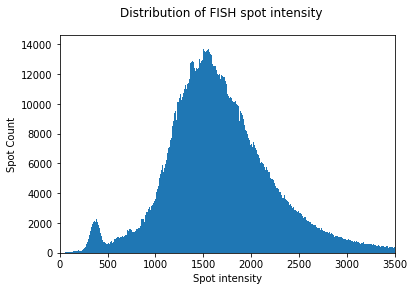

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = DF
plt.hist(temp_df.ave,bins=int(len(temp_df.ave)/1000))
plt.xlim([0,3500])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

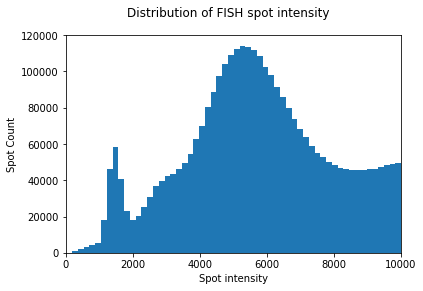

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = DF
plt.hist(temp_df.ssum,bins=int(len(temp_df.ave)/1000))
plt.xlim([0,10000])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

SpearmanrResult(correlation=0.8057191542467661, pvalue=2.7484302776022727e-40)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2


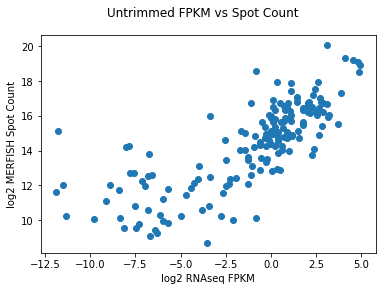

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(DF.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

SpearmanrResult(correlation=0.8429853619084737, pvalue=2.25968246138943e-47)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2


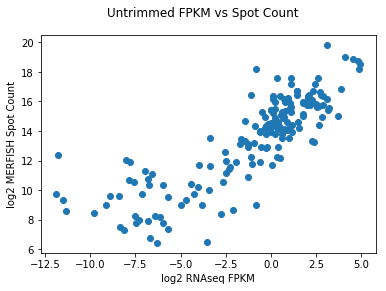

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(DF[(DF.ave>500) & (DF.npixels>1) & (DF.ssum>2000)].gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [1]:
import pickle
spots = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/filteredspots.pkl','rb'))

In [2]:
len(spots)

8393898

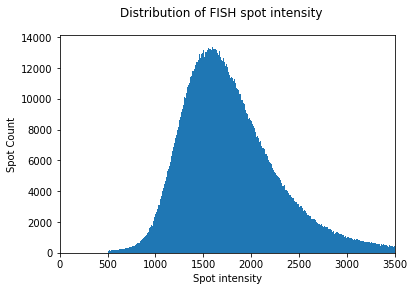

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
temp_df = spots
plt.hist(temp_df.ave,bins=int(len(temp_df.ave)/1000))
plt.xlim([0,3500])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

SpearmanrResult(correlation=0.8429853619084737, pvalue=2.25968246138943e-47)


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2


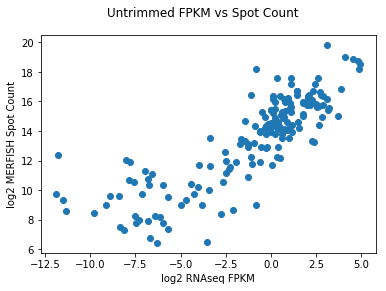

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(spots.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()

In [5]:
import importlib
from collections import defaultdict, Counter
seqfish_config = importlib.import_module('seqfish_config_inflammation')
blank = 0
total = 0
FISH_Spots_Trimmed = Counter(spots.gene)
for gene in FISH_Spots_Trimmed.keys():
    if 'blank' in gene:
        blank = blank + FISH_Spots_Trimmed[gene]
        print(gene,FISH_Spots_Trimmed[gene])
        total = total + FISH_Spots_Trimmed[gene]
    else:
        total = total + FISH_Spots_Trimmed[gene]
print(blank,'false positives')
print(total,'total called')
FPR = (100*blank/total)*(len(seqfish_config.gids)/len(seqfish_config.bids))
print(len(seqfish_config.gids), 'total genes')
print(len(seqfish_config.bids), 'total blanks')
print(FPR,'FPR %')

blank10 289
blank6 360
blank3 232
blank1 77
blank15 84
blank0 83
blank4 324
blank12 112
blank2 54
blank5 66
blank7 94
blank8 30
blank11 34
blank14 59
blank13 107
blank9 23
2028 false positives
8393898 total called
171 total genes
16 total blanks
0.258214360002945 FPR %


# Spatial Transcriptomics


In [2]:
import pickle
spotcalls = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/spotcalls_pos_purged.pkl','rb'))

In [3]:
spotcalls = spots[(spots.ave>500) & (spots.npixels>1) & (spots.ssum>2000)]
pickle.dump(spotcalls,open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/spotcalls_pos_purged_filtered.pkl','wb'))

In [12]:
spotcalls.head(5)

gene      ssum                                  centroid          ave  \
1      Lamb2    9037.0                               (0.5, 89.5)   564.812500   
12       Apc   71190.0   (108.61538461538461, 582.3846153846154)  1369.038462   
15     Fem1a   41728.0  (143.88888888888889, 1448.6666666666667)  1159.111111   
16     P2ry2  105999.0                           (148.5, 1453.5)  1656.234375   
22  Tnfrsf21   71992.0   (211.6153846153846, 1871.3846153846155)  1384.461538   

    npixels  cword_idx  z        posname  
1         4         80  5  3-Pos_002_002  
12       13         10  5  3-Pos_002_002  
15        9         52  5  3-Pos_002_002  
16       16        110  5  3-Pos_002_002  
22       13        166  5  3-Pos_002_002

In [6]:
from metadata import Metadata
md = Metadata('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/')

In [11]:
md.image_table.head(5)

FlatField  df_pos  linescan       Position          group       acq  frame  \
0        NaN       0       NaN  3-Pos_000_002  3-Pos_000_002  hybe8_12      1   
1        NaN       0       NaN  3-Pos_000_002  3-Pos_000_002  hybe8_12      1   
2        NaN       0       NaN  3-Pos_000_002  3-Pos_000_002  hybe8_12      1   
3        NaN       0       NaN  3-Pos_000_002  3-Pos_000_002  hybe8_12      1   
4        NaN       0       NaN  3-Pos_000_002  3-Pos_000_002  hybe8_12      1   

   TimestampImage                XY  PixelSize  \
0   737389.680372  [4612.0, 5056.0]     0.1032   
1   737389.680381  [4612.0, 5056.0]     0.1032   
2   737389.680384  [4612.0, 5056.0]     0.1032   
3   737389.680393  [4612.0, 5056.0]     0.1032   
4   737389.680402  [4612.0, 5056.0]     0.1032   

                         ...                                 Z  Zindex  \
0                        ...                          3068.838       1   
1                        ...                          3068.838       1   
2                        ...                          3068.838       1   
3                        ...                          3069.239       2   
4                        ...                          3069.239       2   

       XYbeforeTransform Exposure   Channel Triggered  Skip  TimestampFrame  \
0  [4612.094, 5055.8035]      475    FarRed     False     1   737389.680379   
1  [4612.094, 5055.8035]      600    Orange     False     1   737389.680379   
2  [4612.094, 5055.8035]       50  DeepBlue     False     1   737389.680379   
3  [4612.094, 5055.8035]      475    FarRed     False     1   737389.680400   
4  [4612.094, 5055.8035]      600    Orange     False     1   737389.680400   

                                            filename  \
0  /hybedata/Images/Zach/FISH_Troubleshooting/Pre...   
1  /hybedata/Images/Zach/FISH_Troubleshooting/Pre...   
2  /hybedata/Images/Zach/FISH_Troubleshooting/Pre...   
3  /hybedata/Images/Zach/FISH_Troubleshooting/Pre...   
4  /hybedata/Images/Zach/FISH_Troubleshooting/Pre...   

                                            root_pth  
0  Pos2/img_3-Pos_000_002_000000001_000000000_Far...  
1  Pos2/img_3-Pos_000_002_000000001_000000000_Ora...  
2  Pos2/img_3-Pos_000_002_000000001_000000000_Dee...  
3  Pos2/img_3-Pos_000_002_000000002_000000000_Far...  
4  Pos2/img_3-Pos_000_002_000000002_000000000_Ora...  

[5 rows x 21 columns]

In [15]:
pos_df = {}
for pos in spotcalls.posname.unique():
    pos_df[pos] = md.image_table[md.image_table.Position==pos].XY.iloc[0]

In [16]:
pos_df

{'3-Pos_002_002': array([4934., 5056.]),
 '5-Pos_004_001': array([6627., 7050.]),
 '3-Pos_001_007': array([4773., 5861.]),
 '4-Pos_001_007': array([4689., 7803.]),
 '4-Pos_003_006': array([5011., 7642.]),
 '3-Pos_004_006': array([5256., 5700.]),
 '3-Pos_005_004': array([5417., 5378.]),
 '3-Pos_007_003': array([5739., 5217.]),
 '4-Pos_006_005': array([5493., 7481.]),
 '3-Pos_005_003': array([5417., 5217.]),
 '3-Pos_007_005': array([5739., 5539.]),
 '3-Pos_000_005': array([4612., 5539.]),
 '6-Pos_004_000': array([6981., 5210.]),
 '5-Pos_005_006': array([6788., 7855.]),
 '3-Pos_008_005': array([5900., 5539.]),
 '6-Pos_006_001': array([7303., 5371.]),
 '6-Pos_004_004': array([6981., 5854.]),
 '6-Pos_004_009': array([6981., 6659.]),
 '6-Pos_004_001': array([6981., 5371.]),
 '3-Pos_008_000': array([5900., 4734.]),
 '4-Pos_006_001': array([5493., 6838.]),
 '6-Pos_001_000': array([6498., 5210.]),
 '3-Pos_006_007': array([5578., 5861.]),
 '3-Pos_001_008': array([4773., 6021.]),
 '6-Pos_006_002'

In [20]:

X = []
Y = []
pixelsize = 0.109
cameradirection = [-1,1]
for i in range(len(spotcalls.centroid)):
    pos = spotcalls.posname.iloc[i]
    rx = spotcalls.centroid.iloc[i][1]-2048
    ry = spotcalls.centroid.iloc[i][0]#-2048
    coordX = pos_df[pos][0]
    coordY = pos_df[pos][1]
    x = rx*pixelsize*cameradirection[0]+coordX
    y = ry*pixelsize*cameradirection[1]+coordY
    X.append(x)
    Y.append(y)


In [ ]:
spotcalls['CoordX'] = X
spotcalls['CoordY'] = Y
